<a href="https://colab.research.google.com/github/anas1IA/Analysis-of-Bank-Debit-Collections/blob/main/first_project_change).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# separate dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



## the transformation of data from a text file to a CSV


In [4]:
data_1year=pd.read_csv('csv_result-1year.csv')
data_2year=pd.read_csv('csv_result-2year .csv')
data_3year=pd.read_csv('csv_result-3year.csv')
data_4year=pd.read_csv('csv_result-4year.csv')
data_5year=pd.read_csv('csv_result-5year.csv')
all_data = pd.concat([data_1year, data_2year, data_3year, data_4year, data_5year], ignore_index=True)
all_data

<ipython-input-4-9e51fdb42de8>:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,22,24,25,26,29,32,33,34,35,36,38,40,46,47,48,50,51,52,57,59,61,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2year=pd.read_csv('csv_result-2year .csv')
<ipython-input-4-9e51fdb42de8>:3: DtypeWarning: Columns (4,5,8,9,12,15,16,17,24,26,32,33,34,40,41,46,47,50,52,61,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data_3year=pd.read_csv('csv_result-3year.csv')
<ipython-input-4-9e51fdb42de8>:4: DtypeWarning: Columns (1,2,3,6,7,8,10,11,13,14,15,16,17,18,19,20,22,23,24,25,26,29,30,31,34,35,36,38,39,42,43,44,48,49,50,51,56,58,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  data_4year=pd.read_csv('csv_result-4year.csv')


id     Attr1    Attr2      Attr3    Attr4    Attr5     Attr6  \
0         1   0.20055  0.37951    0.39641   2.0472   32.351   0.38825   
1         2   0.20912  0.49988    0.47225   1.9447   14.786         0   
2         3   0.24866  0.69592    0.26713   1.5548  -1.1523         0   
3         4  0.081483  0.30734    0.45879   2.4928   51.952   0.14988   
4         5   0.18732  0.61323     0.2296   1.4063  -7.3128   0.18732   
...     ...       ...      ...        ...      ...      ...       ...   
38332  5906  0.012898  0.70621   0.038857   1.1722  -18.907         0   
38333  5907  -0.57805  0.96702   -0.80085  0.16576  -67.365  -0.57805   
38334  5908  -0.17905   1.2553   -0.27599  0.74554  -120.44  -0.17905   
38335  5909  -0.10886  0.74394   0.015449   1.0878  -17.003  -0.10886   
38336  5910  -0.10537  0.53629  -0.045578  0.91478  -56.068  -0.10537   

          Attr7     Attr8    Attr9  ...    Attr56    Attr57   Attr58  \
0       0.24976    1.3305   1.1389  ...   0.12196   0.39718  0.87804   
1       0.25834   0.99601   1.6996  ...    0.1213   0.42002    0.853   
2       0.30906   0.43695    1.309  ...   0.24114   0.81774  0.76599   
3      0.092704    1.8661   1.0571  ...  0.054015   0.14207  0.94598   
4       0.18732    0.6307   1.1559  ...   0.13485   0.48431  0.86515   
...         ...       ...      ...  ...       ...       ...      ...   
38332  0.013981     0.416   1.6768  ...  0.020169  0.043904   1.0122   
38333  -0.57805  -0.40334  0.93979  ... -0.064073     1.482   1.0641   
38334  -0.15493  -0.26018   1.1749  ...   0.14888   0.54824  0.85112   
38335  -0.10918   0.12531  0.84516  ...   -0.1832   -1.1677   1.1832   
38336  -0.10994    0.8646   0.9504  ... -0.052186  -0.22725   1.0522   

          Attr59  Attr60  Attr61  Attr62  Attr63   Attr64 class  
0       0.001924   8.416  5.1372  82.658  4.4158   7.4277   0.0  
1              0  4.1486  3.2732  107.35     3.4   60.987   0.0  
2        0.69484  4.9909   3.951  134.27  2.7185   5.2078   0.0  
3              0  4.5746  3.6147  86.435  4.2228   5.5497   0.0  
4        0.12444  6.3985  4.3158  127.21  2.8692    7.898   0.0  
...          ...     ...     ...     ...     ...      ...   ...  
38332     1.2594  13.472  12.432  49.117  7.4313   2.2799   1.0  
38333  -0.018084  110.72  44.759   81.22   4.494   5.1305   1.0  
38334   -0.52243  9.8526  3.4892  207.87  1.7559   9.9527   1.0  
38335     6.0924  13.886  6.0769  83.122  4.3911  0.95575   1.0  
38336   0.003196  7.7332  4.7174  136.85  2.6672   2.7927   1.0  

[38337 rows x 66 columns]

In [5]:
formulas = ["id",
    "net profit / total assets",
    "total liabilities / total assets",
    "working capital / total assets",
    "current assets / short-term liabilities",
    "(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365",
    "retained earnings / total assets",
    "EBIT / total assets",
    "book value of equity / total liabilities",
    "sales / total assets",
    "equity / total assets",
    "(gross profit + extraordinary items + financial expenses) / total assets",
    "gross profit / short-term liabilities",
    "(gross profit + depreciation) / sales",
    "(gross profit + interest) / total assets",
    "(total liabilities * 365) / (gross profit + depreciation)",
    "(gross profit + depreciation) / total liabilities",
    "total assets / total liabilities",
    "gross profit / total assets",
    "gross profit / sales",
    "(inventory * 365) / sales",
    "sales (n) / sales (n-1)",
    "profit on operating activities / total assets",
    "net profit / sales",
    "gross profit (in 3 years) / total assets",
    "(equity - share capital) / total assets",
    "(net profit + depreciation) / total liabilities",
    "profit on operating activities / financial expenses",
    "working capital / fixed assets",
    "logarithm of total assets",
    "(total liabilities - cash) / sales",
    "(gross profit + interest) / sales",
    "(current liabilities * 365) / cost of products sold",
    "operating expenses / short-term liabilities",
    "operating expenses / total liabilities",
    "profit on sales / total assets",
    "total sales / total assets",
    "(current assets - inventories) / long-term liabilities",
    "constant capital / total assets",
    "profit on sales / sales",
    "(current assets - inventory - receivables) / short-term liabilities",
    "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "profit on operating activities / sales",
    "rotation receivables + inventory turnover in days",
    "(receivables * 365) / sales",
    "net profit / inventory",
    "(current assets - inventory) / short-term liabilities",
    "(inventory * 365) / cost of products sold",
    "EBITDA (profit on operating activities - depreciation) / total assets",
    "EBITDA (profit on operating activities - depreciation) / sales",
    "current assets / total liabilities",
    "short-term liabilities / total assets",
    "(short-term liabilities * 365) / cost of products sold",
    "equity / fixed assets",
    "constant capital / fixed assets",
    "working capital",
    "(sales - cost of products sold) / sales",
    "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "total costs / total sales",
    "long-term liabilities / equity",
    "sales / inventory",
    "sales / receivables",
    "(short-term liabilities * 365) / sales",
    "sales / short-term liabilities",
    "sales / fixed assets",
    "bankruptcy status",
]


In [6]:
all_data.columns=formulas
all_data

id net profit / total assets total liabilities / total assets  \
0         1                   0.20055                          0.37951   
1         2                   0.20912                          0.49988   
2         3                   0.24866                          0.69592   
3         4                  0.081483                          0.30734   
4         5                   0.18732                          0.61323   
...     ...                       ...                              ...   
38332  5906                  0.012898                          0.70621   
38333  5907                  -0.57805                          0.96702   
38334  5908                  -0.17905                           1.2553   
38335  5909                  -0.10886                          0.74394   
38336  5910                  -0.10537                          0.53629   

      working capital / total assets current assets / short-term liabilities  \
0                            0.39641                                  2.0472   
1                            0.47225                                  1.9447   
2                            0.26713                                  1.5548   
3                            0.45879                                  2.4928   
4                             0.2296                                  1.4063   
...                              ...                                     ...   
38332                       0.038857                                  1.1722   
38333                       -0.80085                                 0.16576   
38334                       -0.27599                                 0.74554   
38335                       0.015449                                  1.0878   
38336                      -0.045578                                 0.91478   

      (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                                 32.351                                                                  
1                                                 14.786                                                                  
2                                                -1.1523                                                                  
3                                                 51.952                                                                  
4                                                -7.3128                                                                  
...                                                  ...                                                                  
38332                                            -18.907                                                                  
38333                                            -67.365                                                                  
38334                                            -120.44                                                                  
38335                                            -17.003                                                                  
38336                                            -56.068                                                                  

      retained earnings / total assets EBIT / total assets  \
0                              0.38825             0.24976   
1                                    0             0.25834   
2                                    0             0.30906   
3                              0.14988            0.092704   
4                              0.18732             0.18732   
...                                ...                 ...   
38332                                0            0.013981   
38333                         -0.57805            -0.57805   
38334                         -0.17905            -0.15493   
38335                         -0.10886            -0.10918   


## Data Cleaning


###Handling Missing Values


In [7]:
all_data_rest = all_data.astype(str)
all_data.replace("?", float('nan'), inplace=True)


In [8]:
all_data_rest

id net profit / total assets total liabilities / total assets  \
0         1                   0.20055                          0.37951   
1         2                   0.20912                          0.49988   
2         3                   0.24866                          0.69592   
3         4                  0.081483                          0.30734   
4         5                   0.18732                          0.61323   
...     ...                       ...                              ...   
38332  5906                  0.012898                          0.70621   
38333  5907                  -0.57805                          0.96702   
38334  5908                  -0.17905                           1.2553   
38335  5909                  -0.10886                          0.74394   
38336  5910                  -0.10537                          0.53629   

      working capital / total assets current assets / short-term liabilities  \
0                            0.39641                                  2.0472   
1                            0.47225                                  1.9447   
2                            0.26713                                  1.5548   
3                            0.45879                                  2.4928   
4                             0.2296                                  1.4063   
...                              ...                                     ...   
38332                       0.038857                                  1.1722   
38333                       -0.80085                                 0.16576   
38334                       -0.27599                                 0.74554   
38335                       0.015449                                  1.0878   
38336                      -0.045578                                 0.91478   

      (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                                 32.351                                                                  
1                                                 14.786                                                                  
2                                                -1.1523                                                                  
3                                                 51.952                                                                  
4                                                -7.3128                                                                  
...                                                  ...                                                                  
38332                                            -18.907                                                                  
38333                                            -67.365                                                                  
38334                                            -120.44                                                                  
38335                                            -17.003                                                                  
38336                                            -56.068                                                                  

      retained earnings / total assets EBIT / total assets  \
0                              0.38825             0.24976   
1                                    0             0.25834   
2                                    0             0.30906   
3                              0.14988            0.092704   
4                              0.18732             0.18732   
...                                ...                 ...   
38332                                0            0.013981   
38333                         -0.57805            -0.57805   
38334                         -0.17905            -0.15493   
38335                         -0.10886            -0.10918   


In [9]:
all_data_reset = all_data.drop("id", axis=1)
all_data_reset

net profit / total assets total liabilities / total assets  \
0                       0.20055                          0.37951   
1                       0.20912                          0.49988   
2                       0.24866                          0.69592   
3                      0.081483                          0.30734   
4                       0.18732                          0.61323   
...                         ...                              ...   
38332                  0.012898                          0.70621   
38333                  -0.57805                          0.96702   
38334                  -0.17905                           1.2553   
38335                  -0.10886                          0.74394   
38336                  -0.10537                          0.53629   

      working capital / total assets current assets / short-term liabilities  \
0                            0.39641                                  2.0472   
1                            0.47225                                  1.9447   
2                            0.26713                                  1.5548   
3                            0.45879                                  2.4928   
4                             0.2296                                  1.4063   
...                              ...                                     ...   
38332                       0.038857                                  1.1722   
38333                       -0.80085                                 0.16576   
38334                       -0.27599                                 0.74554   
38335                       0.015449                                  1.0878   
38336                      -0.045578                                 0.91478   

      (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                                 32.351                                                                  
1                                                 14.786                                                                  
2                                                -1.1523                                                                  
3                                                 51.952                                                                  
4                                                -7.3128                                                                  
...                                                  ...                                                                  
38332                                            -18.907                                                                  
38333                                            -67.365                                                                  
38334                                            -120.44                                                                  
38335                                            -17.003                                                                  
38336                                            -56.068                                                                  

      retained earnings / total assets EBIT / total assets  \
0                              0.38825             0.24976   
1                                    0             0.25834   
2                                    0             0.30906   
3                              0.14988            0.092704   
4                              0.18732             0.18732   
...                                ...                 ...   
38332                                0            0.013981   
38333                         -0.57805            -0.57805   
38334                         -0.17905            -0.15493   
38335                         -0.10886            -0.10918   
38336                         -0.10537            -0.10994   

      

In [10]:
missing_values_count=all_data_reset.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:]

net profit / total assets                                                                                              8
total liabilities / total assets                                                                                       8
working capital / total assets                                                                                         8
current assets / short-term liabilities                                                                              125
(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365     79
                                                                                                                    ... 
sales / receivables                                                                                                   95
(short-term liabilities * 365) / sales                                                                               101
sales / short-term liabilities  

In [11]:
total_cells = np.product(all_data_reset.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

1.4317560260122275


<Axes: >

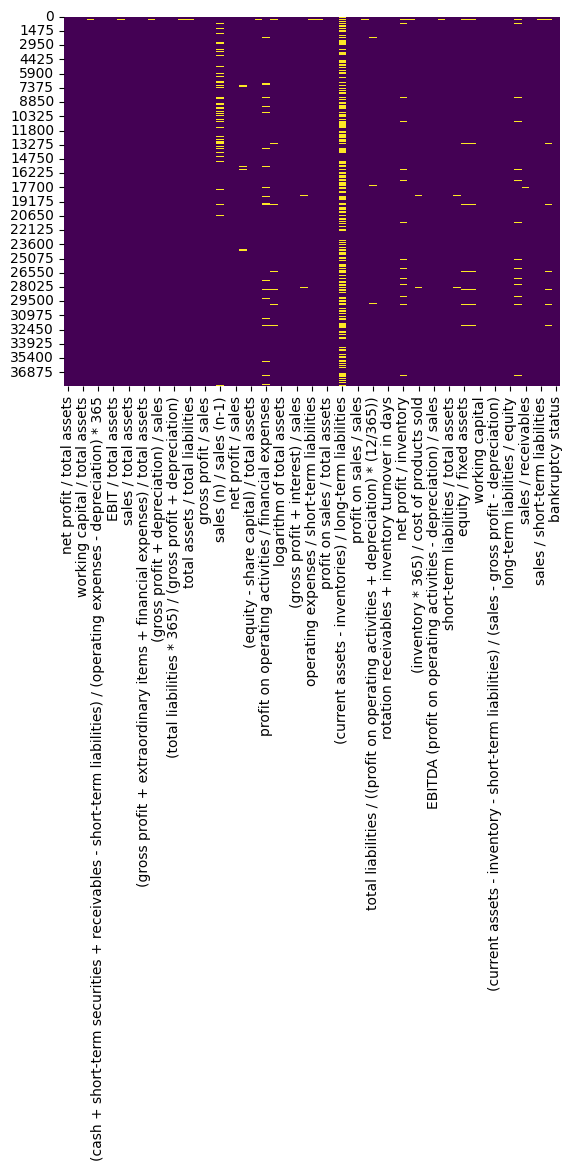

In [12]:
sns.heatmap(all_data_reset.isnull(),cbar=False,cmap='viridis')

In [13]:
all_data_reset

net profit / total assets total liabilities / total assets  \
0                       0.20055                          0.37951   
1                       0.20912                          0.49988   
2                       0.24866                          0.69592   
3                      0.081483                          0.30734   
4                       0.18732                          0.61323   
...                         ...                              ...   
38332                  0.012898                          0.70621   
38333                  -0.57805                          0.96702   
38334                  -0.17905                           1.2553   
38335                  -0.10886                          0.74394   
38336                  -0.10537                          0.53629   

      working capital / total assets current assets / short-term liabilities  \
0                            0.39641                                  2.0472   
1                            0.47225                                  1.9447   
2                            0.26713                                  1.5548   
3                            0.45879                                  2.4928   
4                             0.2296                                  1.4063   
...                              ...                                     ...   
38332                       0.038857                                  1.1722   
38333                       -0.80085                                 0.16576   
38334                       -0.27599                                 0.74554   
38335                       0.015449                                  1.0878   
38336                      -0.045578                                 0.91478   

      (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                                 32.351                                                                  
1                                                 14.786                                                                  
2                                                -1.1523                                                                  
3                                                 51.952                                                                  
4                                                -7.3128                                                                  
...                                                  ...                                                                  
38332                                            -18.907                                                                  
38333                                            -67.365                                                                  
38334                                            -120.44                                                                  
38335                                            -17.003                                                                  
38336                                            -56.068                                                                  

      retained earnings / total assets EBIT / total assets  \
0                              0.38825             0.24976   
1                                    0             0.25834   
2                                    0             0.30906   
3                              0.14988            0.092704   
4                              0.18732             0.18732   
...                                ...                 ...   
38332                                0            0.013981   
38333                         -0.57805            -0.57805   
38334                         -0.17905            -0.15493   
38335                         -0.10886            -0.10918   
38336                         -0.10537            -0.10994   

      

##Handling duplicate data


In [14]:
#check if data has duplicates values
duplicates = all_data_reset.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
38332    False
38333    False
38334    False
38335    False
38336    False
Length: 38337, dtype: bool


#####We note that duplicates do not exist


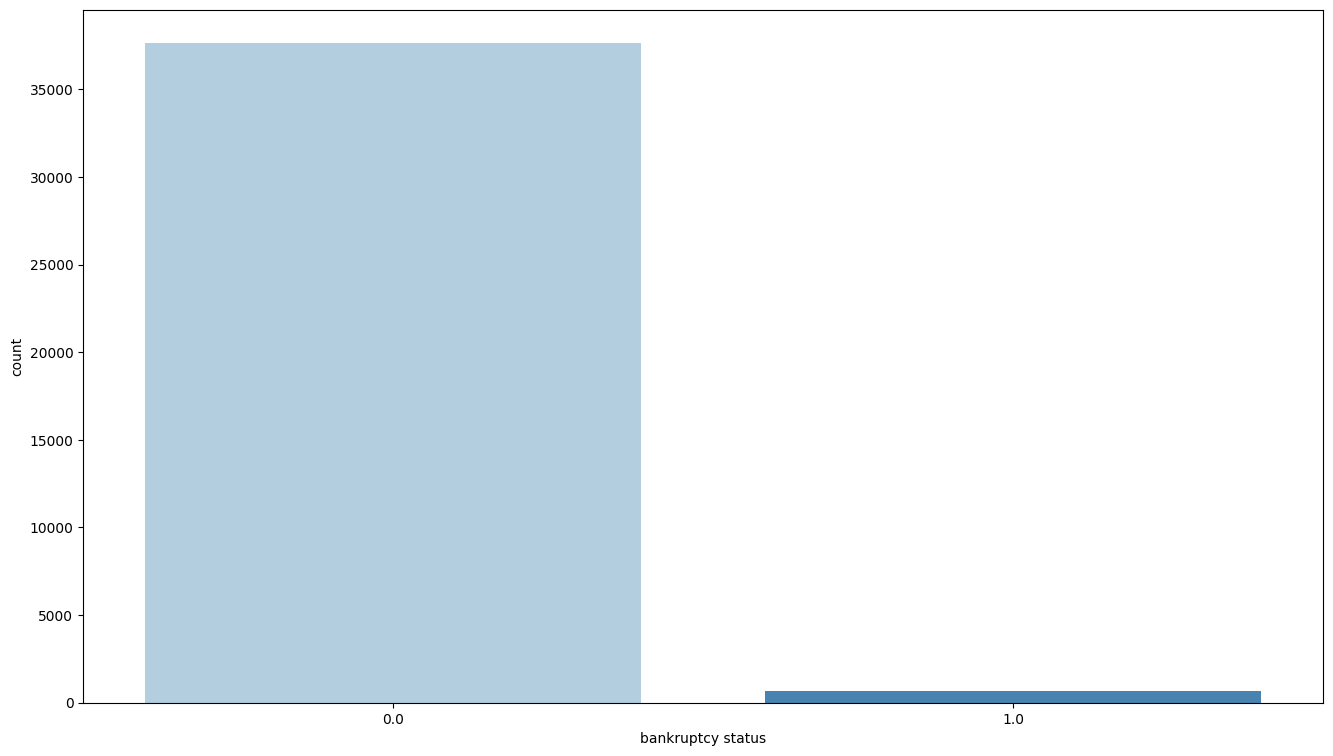

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,9))
sns.countplot(x ='bankruptcy status',data = all_data_reset,palette ='Blues' )
plt.show()

In [16]:
all_data_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38337 entries, 0 to 38336
Data columns (total 65 columns):
 #   Column                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                             --------------  -----  
 0   net profit / total assets                                                                                          38329 non-null  object 
 1   total liabilities / total assets                                                                                   38329 non-null  object 
 2   working capital / total assets                                                                                     38329 non-null  object 
 3   current assets / short-term liabilities                                                                            38212 non-null  object 
 4   (cash + short-term sec

In [17]:
all_data_reset.shape

(38337, 65)

#Scaling and  Normalization


In [18]:
scaler = MinMaxScaler()

# Fit and transform the entire DataFrame
data_scaled = scaler.fit_transform(all_data_reset)
# data_scaled is now a numpy array with scaled values

# Convert the numpy array back to a DataFrame with the original columns
data_scaled = pd.DataFrame(data_scaled, columns=all_data_reset.columns)
data_scaled.head()

net profit / total assets  total liabilities / total assets  \
0                   0.831450                          0.473069   
1                   0.831466                          0.473201   
2                   0.831536                          0.473416   
3                   0.831237                          0.472990   
4                   0.831426                          0.473325   

   working capital / total assets  current assets / short-term liabilities  \
0                        0.945008                                 0.000046   
1                        0.945157                                 0.000044   
2                        0.944753                                 0.000037   
3                        0.945131                                 0.000054   
4                        0.944680                                 0.000034   

   (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                           0.904960                                                                   
1                                           0.904959                                                                   
2                                           0.904958                                                                   
3                                           0.904962                                                                   
4                                           0.904957                                                                   

   retained earnings / total assets  EBIT / total assets  \
0                          0.483663             0.443752   
1                          0.483293             0.443759   
2                          0.483293             0.443803   
3                          0.483436             0.443617   
4                          0.483471             0.443698   

   book value of equity / total liabilities  sales / total assets  \
0                                  0.002664              0.000476   
1                                  0.002658              0.000533   
2                                  0.002648              0.000493   
3                                  0.002674              0.000467   
4                                  0.002651              0.000477   

   equity / total assets  ...  (sales - cost of products sold) / sales  \
0               0.304094  ...                                 0.999736   
1               0.304090  ...                                 0.999736   
2               0.303967  ...                                 0.999736   
3               0.304138  ...                                 0.999736   
4               0.304020  ...                                 0.999736   

   (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)  \
0                                           0.751235                                               
1                                           0.751246                                               
2                                           0.751425                                               
3                                           0.751120                                               
4                                           0.751274                                               

   total costs / total sales  long-term liabilities / equity  \
0                    0.00018                        0.013563   
1                    0.00018                        0.013563   
2                    0.00018                        0.013592   
3                    0.00018                        0.013563   
4                    0.00018                        0.013568   

   sales / inventory  sales / receivables  \
0           0.000004             0.000165   
1           0.000003             0.000147   
2           0.000004             0.000154   
3           0.000004         

In [19]:
formula= [
    "net profit / total assets",
    "total liabilities / total assets",
    "working capital / total assets",
    "current assets / short-term liabilities",
    "(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365",
    "retained earnings / total assets",
    "EBIT / total assets",
    "book value of equity / total liabilities",
    "sales / total assets",
    "equity / total assets",
    "(gross profit + extraordinary items + financial expenses) / total assets",
    "gross profit / short-term liabilities",
    "(gross profit + depreciation) / sales",
    "(gross profit + interest) / total assets",
    "(total liabilities * 365) / (gross profit + depreciation)",
    "(gross profit + depreciation) / total liabilities",
    "total assets / total liabilities",
    "gross profit / total assets",
    "gross profit / sales",
    "(inventory * 365) / sales",
    "sales (n) / sales (n-1)",
    "profit on operating activities / total assets",
    "net profit / sales",
    "gross profit (in 3 years) / total assets",
    "(equity - share capital) / total assets",
    "(net profit + depreciation) / total liabilities",
    "profit on operating activities / financial expenses",
    "working capital / fixed assets",
    "logarithm of total assets",
    "(total liabilities - cash) / sales",
    "(gross profit + interest) / sales",
    "(current liabilities * 365) / cost of products sold",
    "operating expenses / short-term liabilities",
    "operating expenses / total liabilities",
    "profit on sales / total assets",
    "total sales / total assets",
    "(current assets - inventories) / long-term liabilities",
    "constant capital / total assets",
    "profit on sales / sales",
    "(current assets - inventory - receivables) / short-term liabilities",
    "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "profit on operating activities / sales",
    "rotation receivables + inventory turnover in days",
    "(receivables * 365) / sales",
    "net profit / inventory",
    "(current assets - inventory) / short-term liabilities",
    "(inventory * 365) / cost of products sold",
    "EBITDA (profit on operating activities - depreciation) / total assets",
    "EBITDA (profit on operating activities - depreciation) / sales",
    "current assets / total liabilities",
    "short-term liabilities / total assets",
    "(short-term liabilities * 365) / cost of products sold",
    "equity / fixed assets",
    "constant capital / fixed assets",
    "working capital",
    "(sales - cost of products sold) / sales",
    "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "total costs / total sales",
    "long-term liabilities / equity",
    "sales / inventory",
    "sales / receivables",
    "(short-term liabilities * 365) / sales",
    "sales / short-term liabilities",
    "sales / fixed assets",
    "bankruptcy status",
]

In [20]:
for col in formula:
    all_data_reset[col]=pd.to_numeric(all_data_reset[col])
    all_data_reset[col].fillna(all_data_reset[col].mean(), inplace=True)
all_data_reset.head()

net profit / total assets  total liabilities / total assets  \
0                   0.200550                           0.37951   
1                   0.209120                           0.49988   
2                   0.248660                           0.69592   
3                   0.081483                           0.30734   
4                   0.187320                           0.61323   

   working capital / total assets  current assets / short-term liabilities  \
0                         0.39641                                   2.0472   
1                         0.47225                                   1.9447   
2                         0.26713                                   1.5548   
3                         0.45879                                   2.4928   
4                         0.22960                                   1.4063   

   (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                            32.3510                                                                   
1                                            14.7860                                                                   
2                                            -1.1523                                                                   
3                                            51.9520                                                                   
4                                            -7.3128                                                                   

   retained earnings / total assets  EBIT / total assets  \
0                           0.38825             0.249760   
1                           0.00000             0.258340   
2                           0.00000             0.309060   
3                           0.14988             0.092704   
4                           0.18732             0.187320   

   book value of equity / total liabilities  sales / total assets  \
0                                   1.33050                1.1389   
1                                   0.99601                1.6996   
2                                   0.43695                1.3090   
3                                   1.86610                1.0571   
4                                   0.63070                1.1559   

   equity / total assets  ...  (sales - cost of products sold) / sales  \
0                0.50494  ...                                 0.121960   
1                0.49788  ...                                 0.121300   
2                0.30408  ...                                 0.241140   
3                0.57353  ...                                 0.054015   
4                0.38677  ...                                 0.134850   

   (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)  \
0                                            0.39718                                               
1                                            0.42002                                               
2                                            0.81774                                               
3                                            0.14207                                               
4                                            0.48431                                               

   total costs / total sales  long-term liabilities / equity  \
0                    0.87804                        0.001924   
1                    0.85300                        0.000000   
2                    0.76599                        0.694840   
3                    0.94598                        0.000000   
4                    0.86515                        0.124440   

   sales / inventory  sales / receivables  \
0             8.4160               5.1372   
1             4.1486               3.2732   
2             4.9909               3.9510   
3             4.5746         

#Exploratory Data Analysis


##Univariate analysis

In [21]:
display(all_data_reset.describe().round(2))

net profit / total assets  total liabilities / total assets  \
count                   38337.00                          38337.00   
mean                        0.04                              0.57   
std                         3.18                              5.23   
min                      -463.89                           -430.87   
25%                         0.00                              0.27   
50%                         0.05                              0.47   
75%                         0.13                              0.68   
max                        94.28                            480.73   

       working capital / total assets  \
count                        38337.00   
mean                             0.14   
std                              4.72   
min                           -479.73   
25%                              0.03   
50%                              0.20   
75%                              0.41   
max                             28.34   

       current assets / short-term liabilities  \
count                                 38337.00   
mean                                      6.62   
std                                     313.76   
min                                      -0.40   
25%                                       1.06   
50%                                       1.59   
75%                                       2.83   
max                                   53433.00   

       (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
count                                           38337.00                                                                   
mean                                             -426.71                                                                   
std                                             65091.59                                                                   
min                                         -11903000.00                                                                   
25%                                               -47.31                                                                   
50%                                                 0.00                                                                   
75%                                                52.40                                                                   
max                                           1250100.00                                                                   

       retained earnings / total assets  EBIT / total assets  \
count                          38337.00             38337.00   
mean                              -0.03                 0.10   
std                                6.72                 6.08   
min                             -508.12              -517.48   
25%                                0.00                 0.01   
50%                                0.00                 0.06   
75%                                0.10                 0.15   
max                              543.25               649.23   

       book value of equity / total liabilities  sales / total assets  \
count                                  38337.00              38337.00   
mean                                      13.43                  2.77   
std                                      536.01                 66.95   
min                                     -141.41                 -3.50   
25%                                        0.45                  1.02   
50%                                        1.10                  1.19   
75%                                        2.68                  2.05   
max                                    53432.00               9742.30   

       equity / total assets  ...  (sales - cost of products sold) / sales  \
count               38337.00  ...                                 38337.00   
mean                    0.68  ...              

In [22]:
def univariate_analysis(data_set,feature_column):
  feature_data=data_set[feature_column]
  plt.hist(feature_data, bins=20, edgecolor='black')
  plt.title(f'Histogram of {feature_column}')
  plt.xlabel(feature_column)
  plt.ylabel('Frequency')
  plt.show()
  print("\n")
  sns.boxplot(x=feature_data)
  plt.title(f'Box Plot of {feature_column}')
  plt.xlabel(feature_column)
  plt.show()
  print("\n")
  skewness = feature_data.skew()
  kurtosis = feature_data.kurtosis()
  summary_stats = feature_data.describe()
  print(summary_stats)





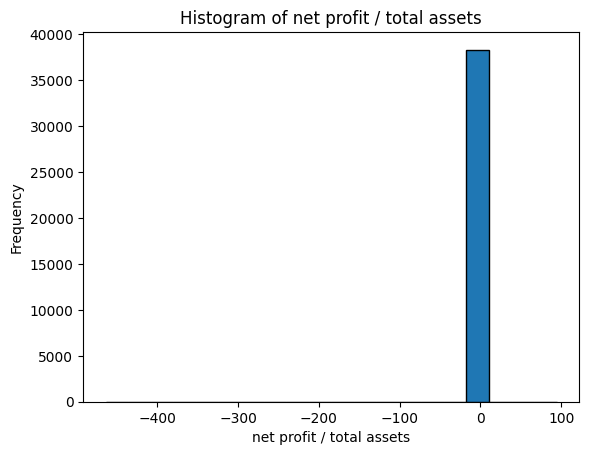

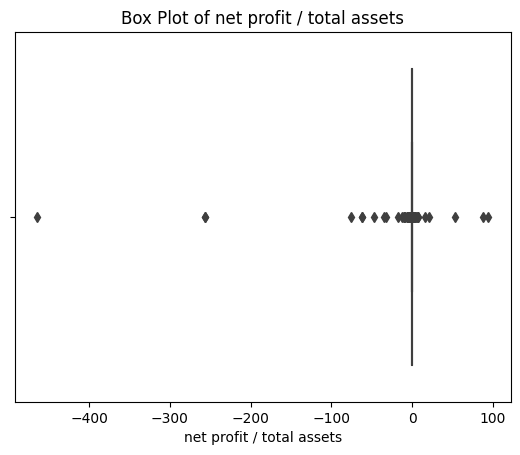



count    38337.000000
mean         0.035916
std          3.180815
min       -463.890000
25%          0.004771
50%          0.051958
75%          0.131170
max         94.280000
Name: net profit / total assets, dtype: float64


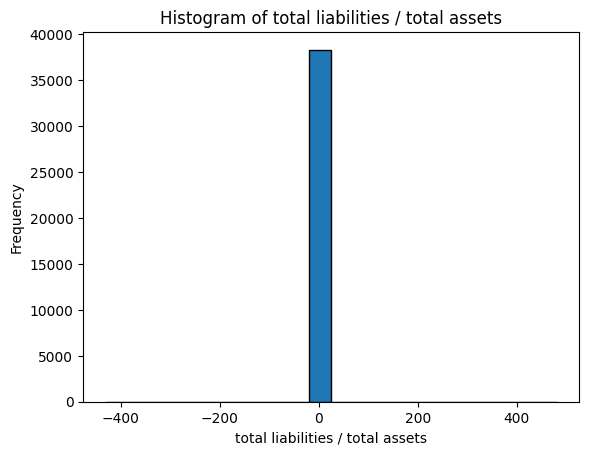

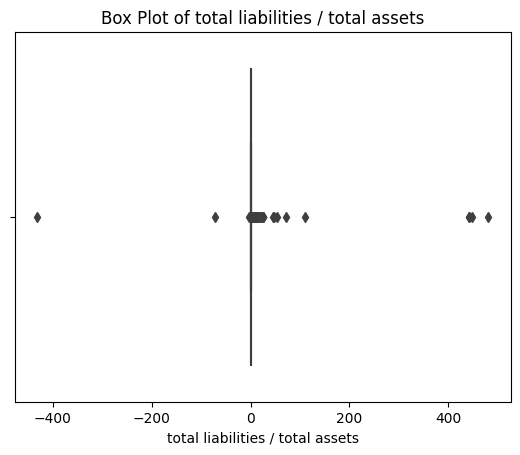



count    38337.00000
mean         0.56558
std          5.22919
min       -430.87000
25%          0.26586
50%          0.46593
75%          0.68099
max        480.73000
Name: total liabilities / total assets, dtype: float64


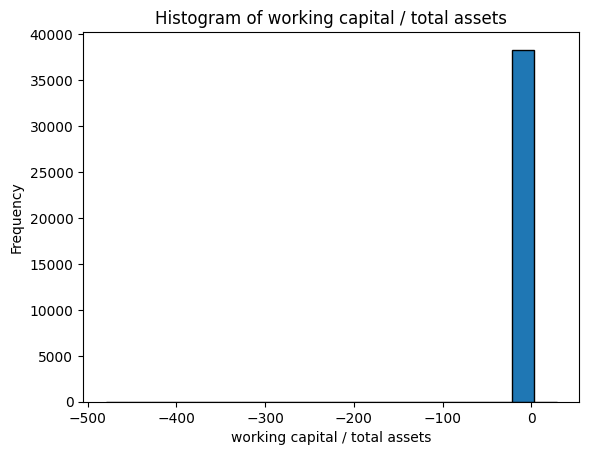

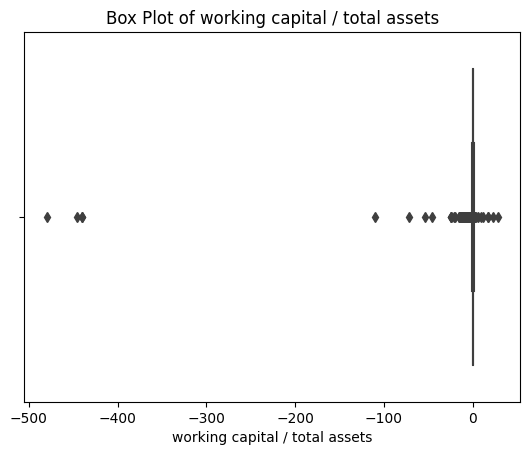



count    38337.000000
mean         0.136413
std          4.717107
min       -479.730000
25%          0.026395
50%          0.200250
75%          0.405330
max         28.336000
Name: working capital / total assets, dtype: float64


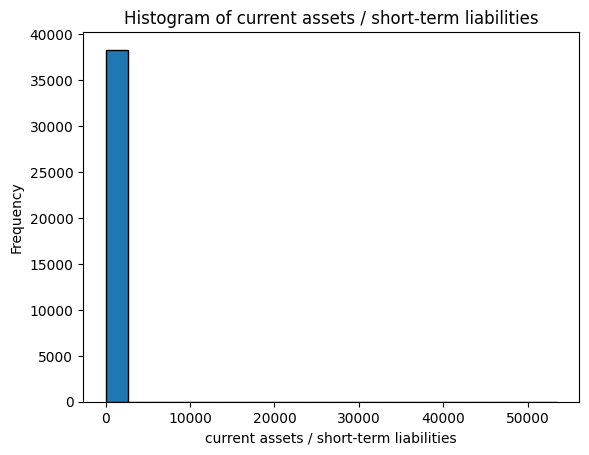

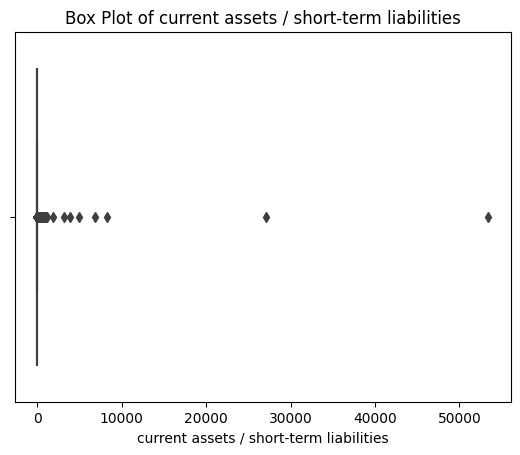



count    38337.000000
mean         6.616697
std        313.755641
min         -0.403110
25%          1.062000
50%          1.589700
75%          2.832900
max      53433.000000
Name: current assets / short-term liabilities, dtype: float64


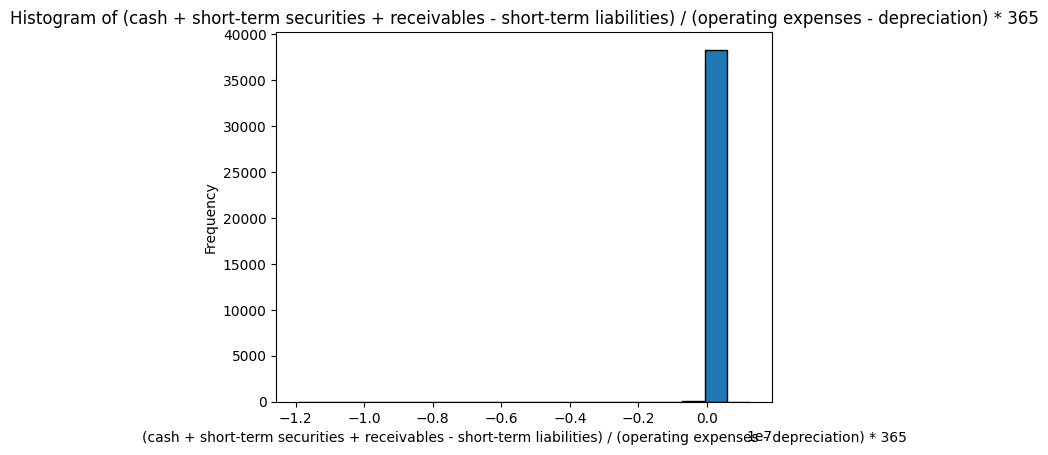

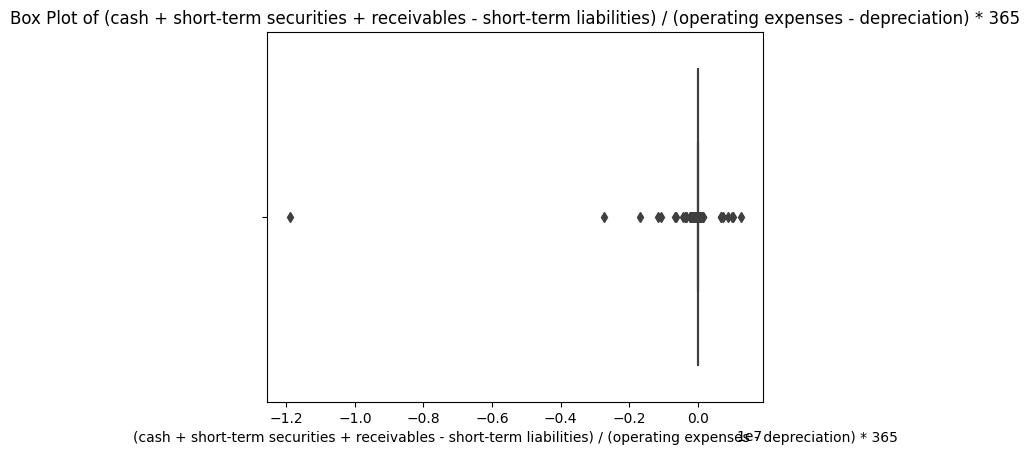



count    3.833700e+04
mean    -4.267099e+02
std      6.509159e+04
min     -1.190300e+07
25%     -4.731400e+01
50%      0.000000e+00
75%      5.239600e+01
max      1.250100e+06
Name: (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365, dtype: float64


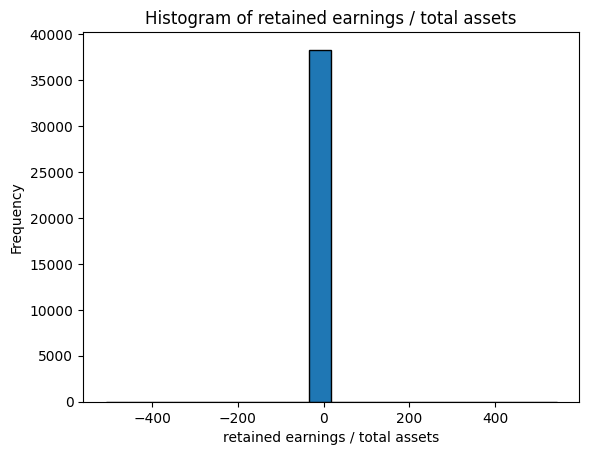

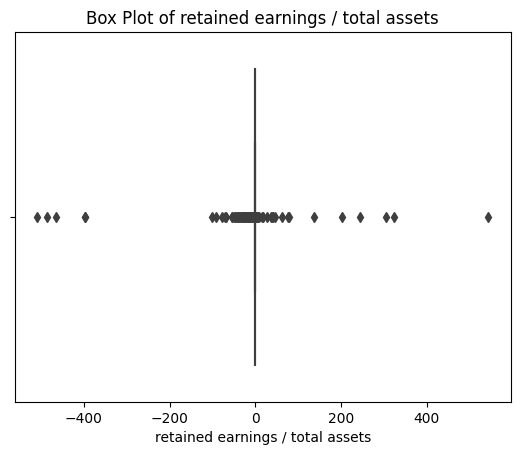



count    38337.000000
mean        -0.025202
std          6.723937
min       -508.120000
25%          0.000000
50%          0.000000
75%          0.100830
max        543.250000
Name: retained earnings / total assets, dtype: float64


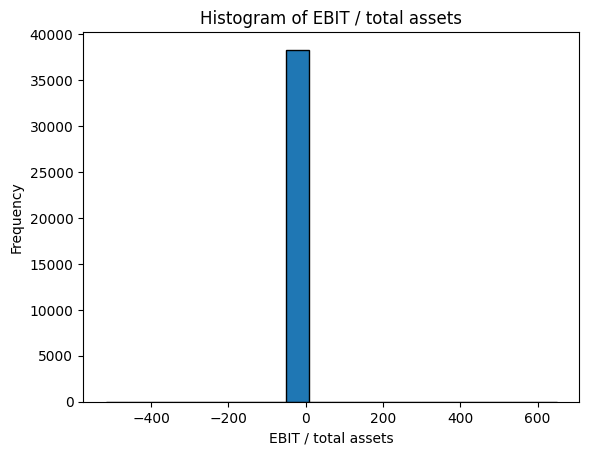

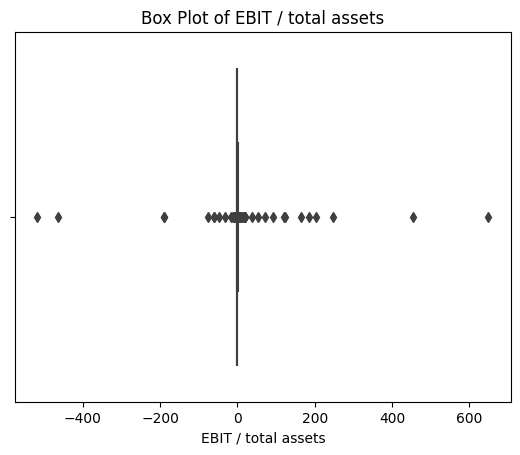



count    38337.000000
mean         0.100342
std          6.075851
min       -517.480000
25%          0.007452
50%          0.062284
75%          0.153040
max        649.230000
Name: EBIT / total assets, dtype: float64


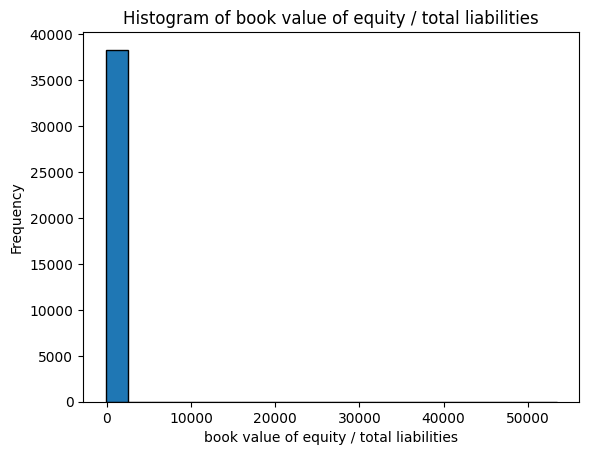

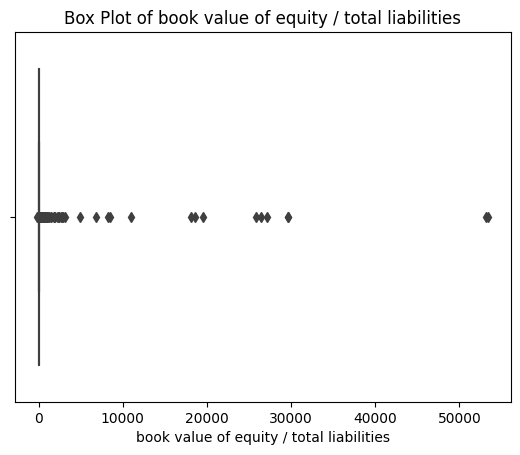



count    38337.000000
mean        13.429719
std        536.005786
min       -141.410000
25%          0.446550
50%          1.097000
75%          2.682900
max      53432.000000
Name: book value of equity / total liabilities, dtype: float64


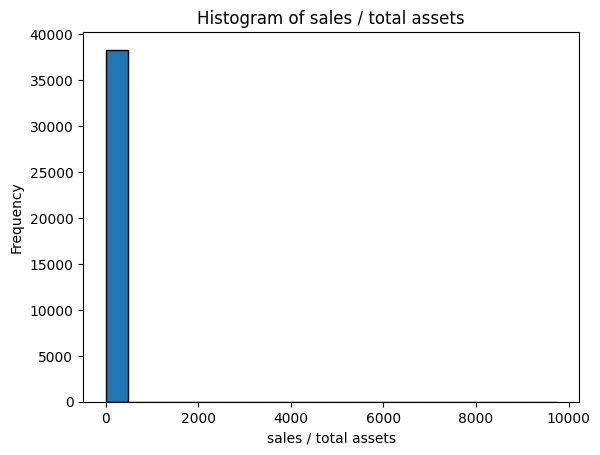

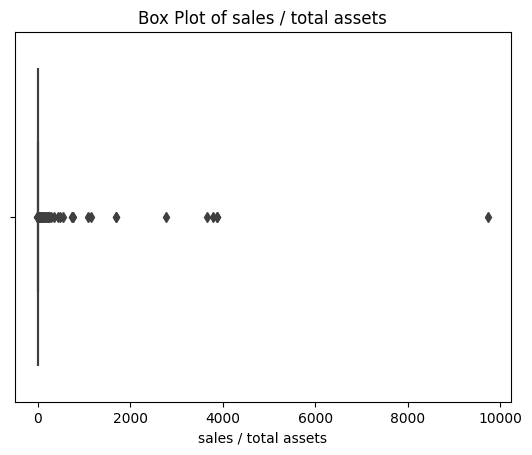



count    38337.000000
mean         2.767406
std         66.949485
min         -3.496000
25%          1.019900
50%          1.188900
75%          2.048700
max       9742.300000
Name: sales / total assets, dtype: float64


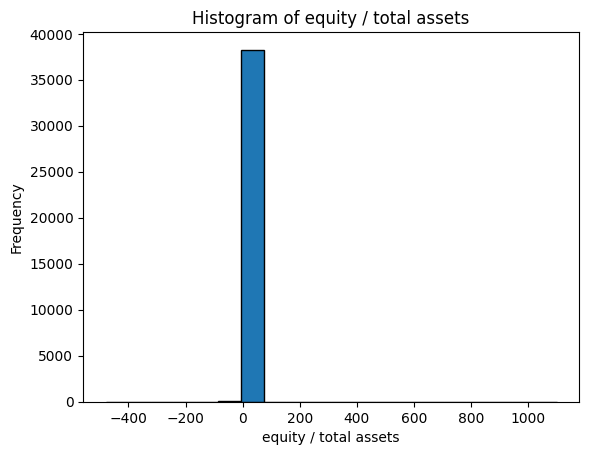

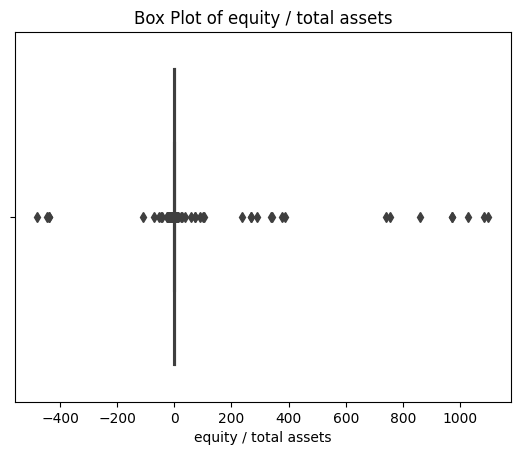



count    38337.000000
mean         0.680339
std         15.237258
min       -479.730000
25%          0.301750
50%          0.510700
75%          0.712480
max       1099.500000
Name: equity / total assets, dtype: float64


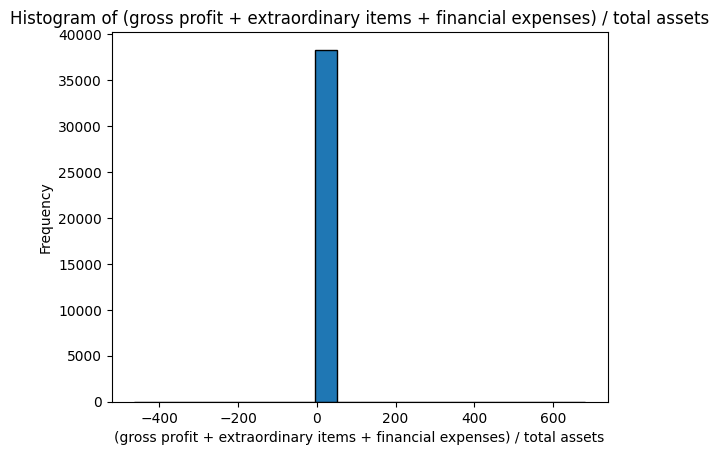

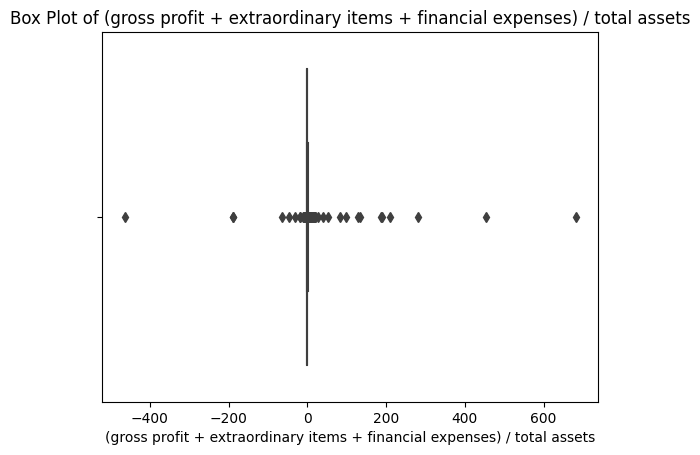



count    38337.000000
mean         0.139615
std          5.641185
min       -463.890000
25%          0.017829
50%          0.077482
75%          0.168140
max        681.540000
Name: (gross profit + extraordinary items + financial expenses) / total assets, dtype: float64


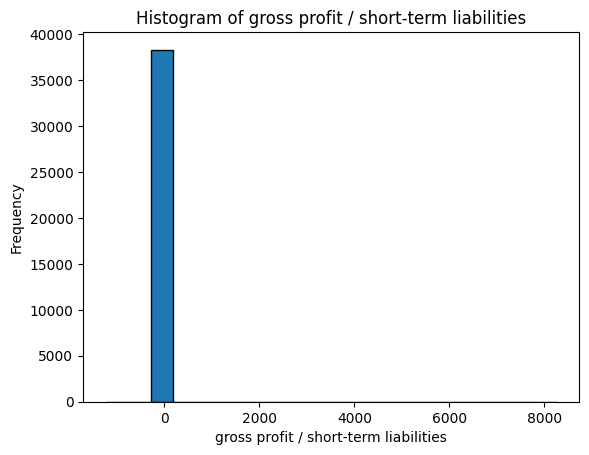

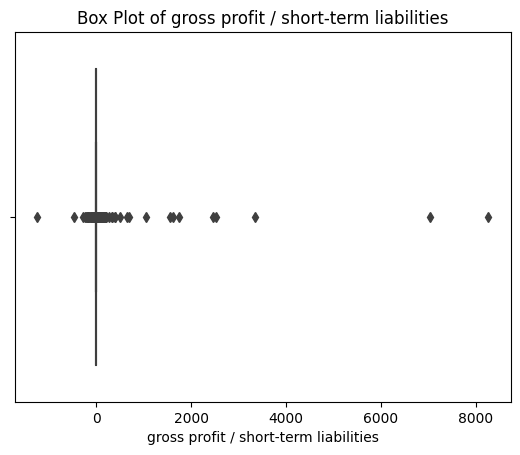



count    38337.000000
mean         1.418358
std         63.568256
min      -1236.400000
25%          0.019919
50%          0.183000
75%          0.609470
max       8259.400000
Name: gross profit / short-term liabilities, dtype: float64


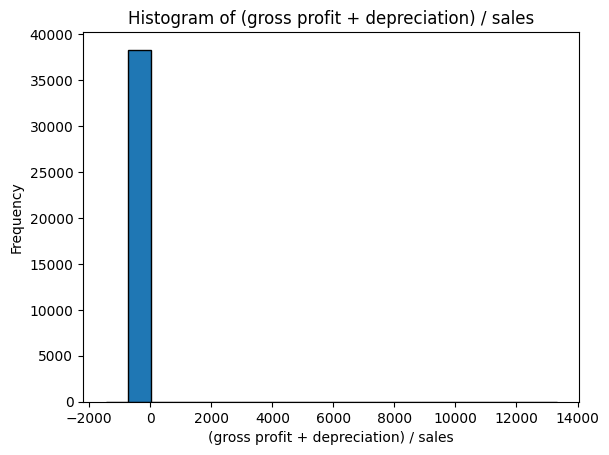

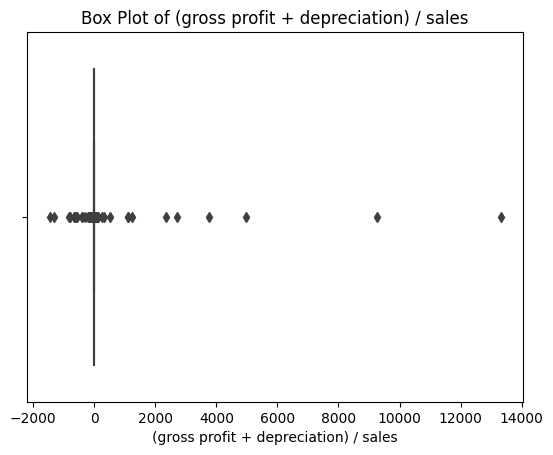



count    38337.000000
mean         0.904179
std         92.241241
min      -1460.600000
25%          0.025871
50%          0.070463
75%          0.137380
max      13315.000000
Name: (gross profit + depreciation) / sales, dtype: float64


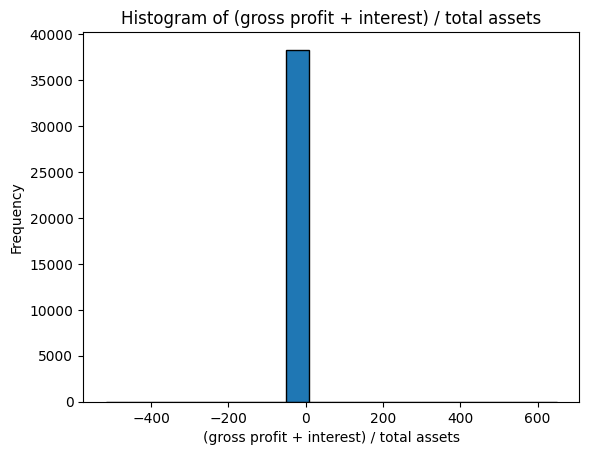

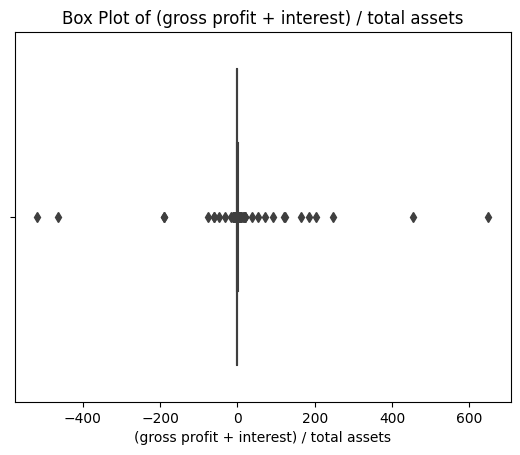



count    38337.000000
mean         0.100354
std          6.075851
min       -517.480000
25%          0.007473
50%          0.062300
75%          0.153050
max        649.230000
Name: (gross profit + interest) / total assets, dtype: float64


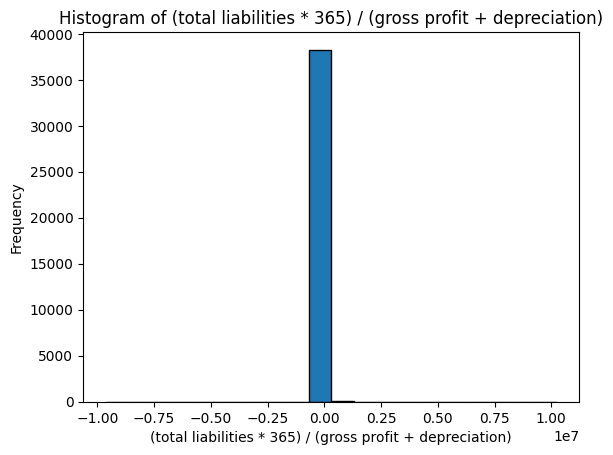

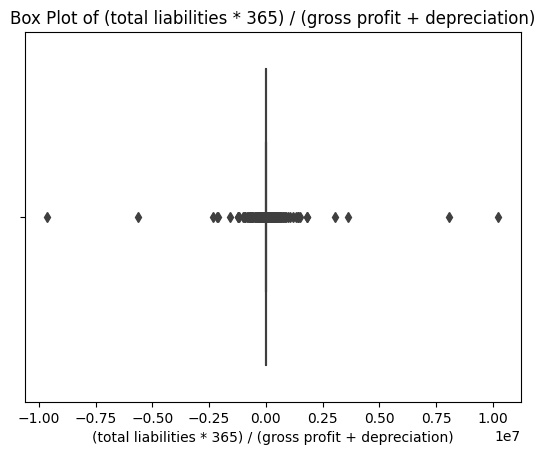



count    3.833700e+04
mean     1.842709e+03
std      1.002925e+05
min     -9.632400e+06
25%      2.385200e+02
50%      8.571000e+02
75%      2.203000e+03
max      1.023600e+07
Name: (total liabilities * 365) / (gross profit + depreciation), dtype: float64


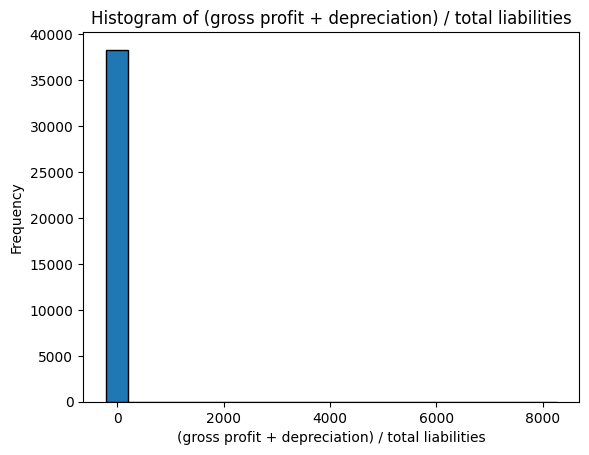

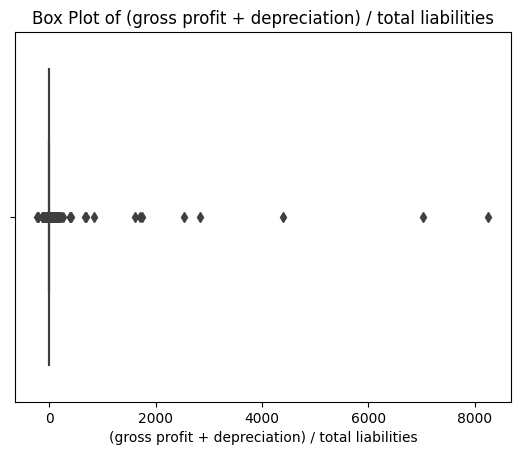



count    38337.000000
mean         1.660508
std         65.180322
min       -221.330000
25%          0.081459
50%          0.256830
75%          0.687450
max       8259.400000
Name: (gross profit + depreciation) / total liabilities, dtype: float64


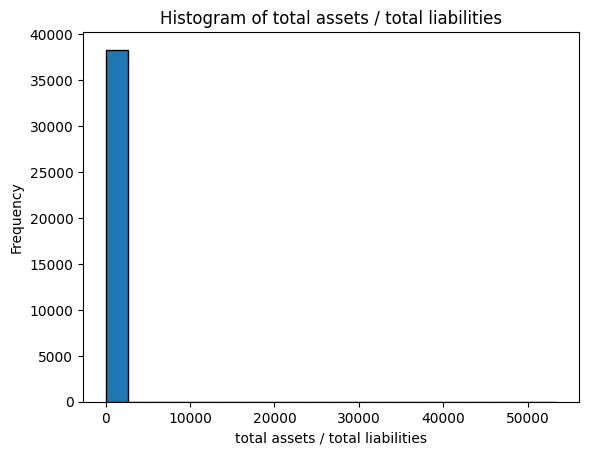

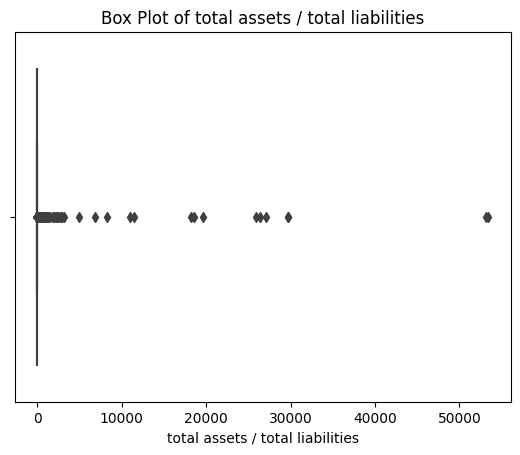



count    38337.000000
mean        14.603586
std        537.515467
min         -0.412920
25%          1.468100
50%          2.146500
75%          3.762300
max      53433.000000
Name: total assets / total liabilities, dtype: float64


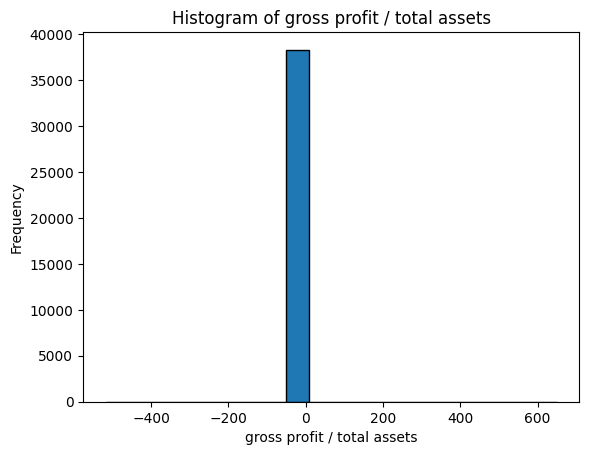

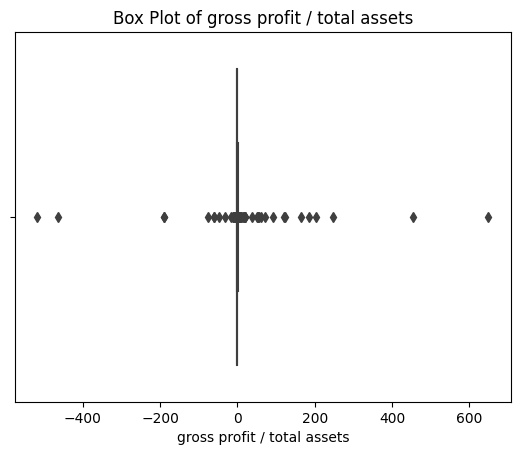



count    38337.000000
mean         0.106104
std          6.101997
min       -517.480000
25%          0.007475
50%          0.062300
75%          0.153070
max        649.230000
Name: gross profit / total assets, dtype: float64


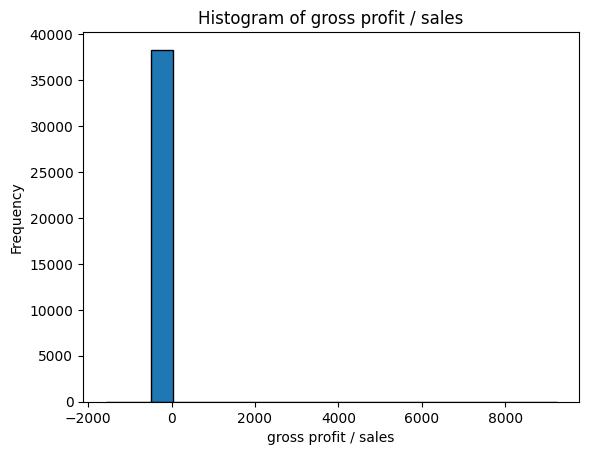

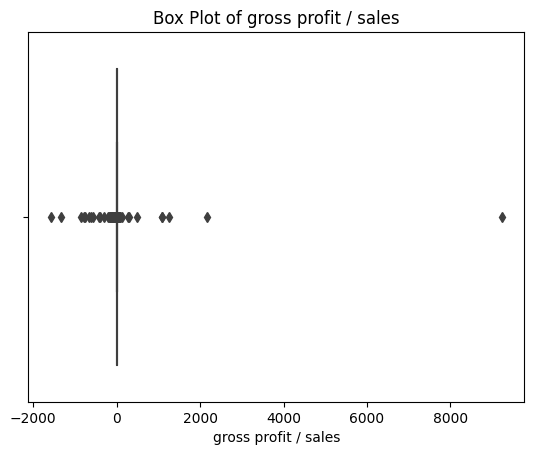



count    38337.000000
mean         0.190848
std         51.649005
min      -1578.700000
25%          0.004942
50%          0.037588
75%          0.093039
max       9230.500000
Name: gross profit / sales, dtype: float64


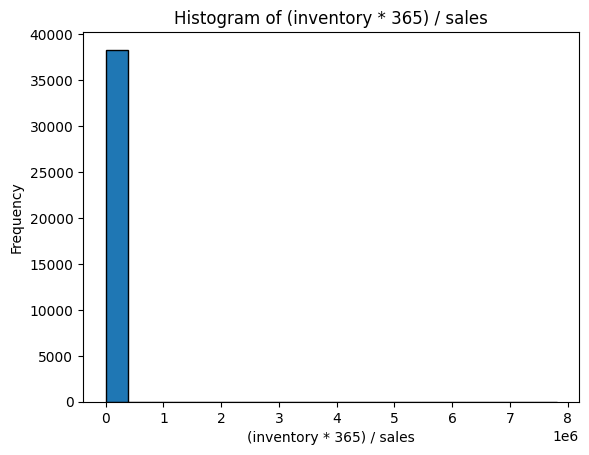

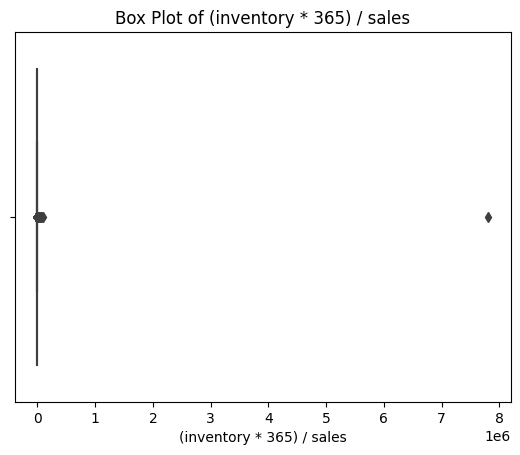



count    3.833700e+04
mean     2.675583e+02
std      3.989129e+04
min     -2.934000e+01
25%      1.531700e+01
50%      3.489200e+01
75%      6.329800e+01
max      7.809200e+06
Name: (inventory * 365) / sales, dtype: float64


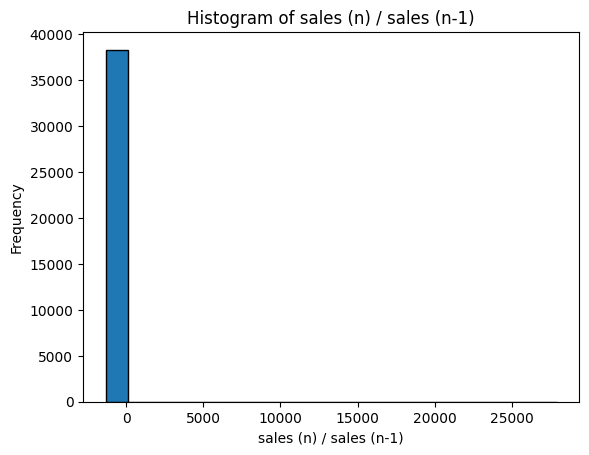

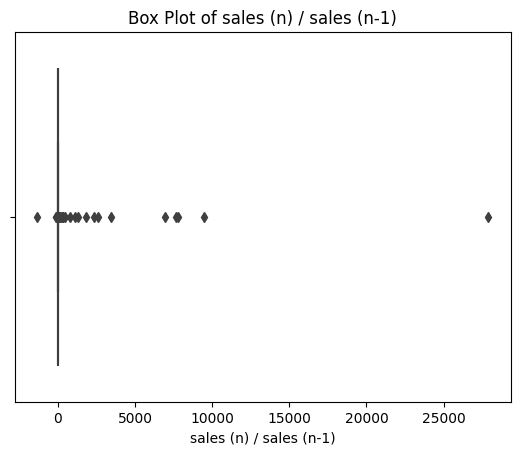



count    38337.000000
mean         3.320948
std        166.993014
min      -1325.000000
25%          0.942260
50%          1.090200
75%          1.334900
max      27900.000000
Name: sales (n) / sales (n-1), dtype: float64


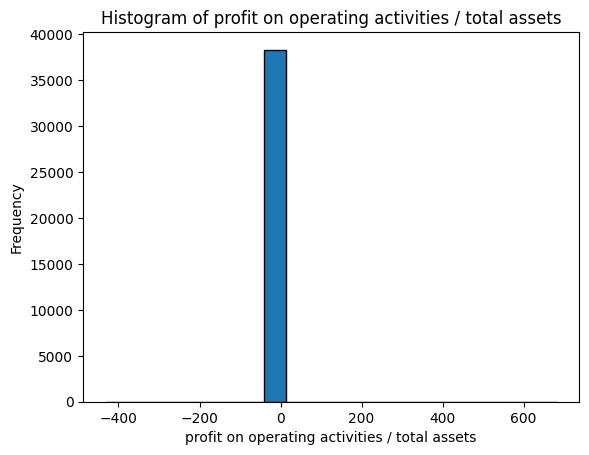

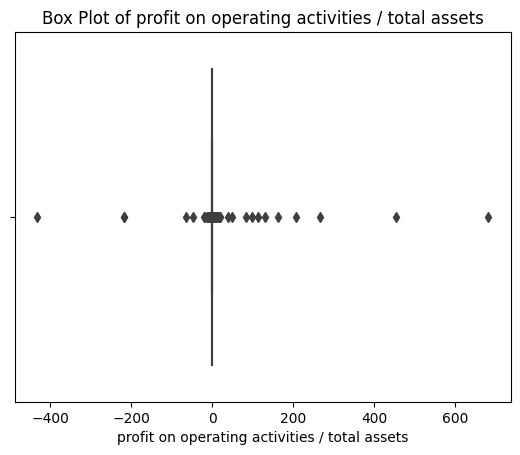



count    38337.000000
mean         0.121775
std          5.483802
min       -431.590000
25%          0.000000
50%          0.064241
75%          0.151270
max        681.540000
Name: profit on operating activities / total assets, dtype: float64


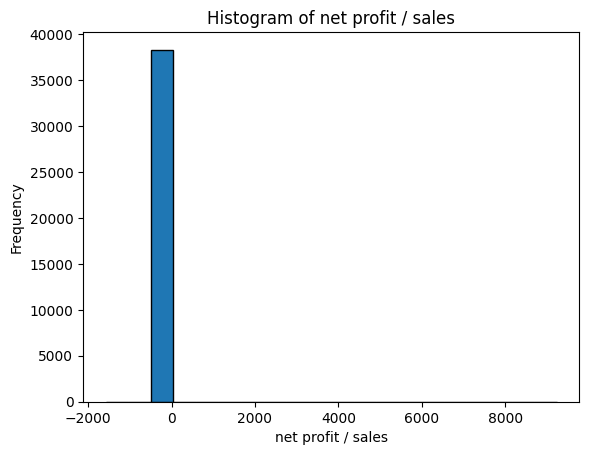

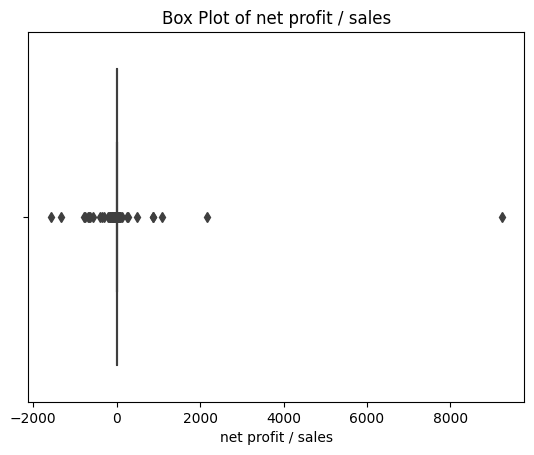



count    38337.000000
mean         0.171676
std         51.269475
min      -1578.700000
25%          0.003195
50%          0.031465
75%          0.079943
max       9230.500000
Name: net profit / sales, dtype: float64


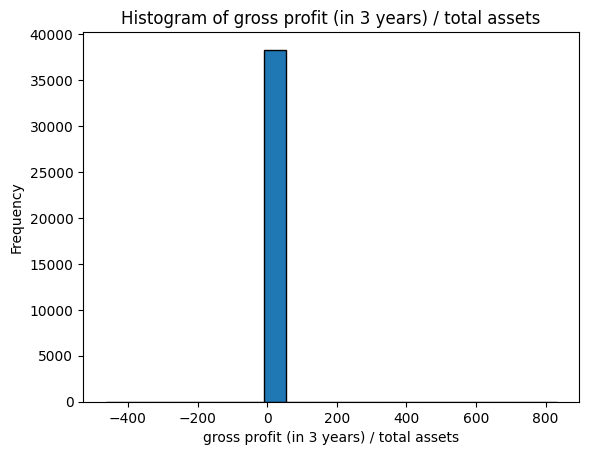

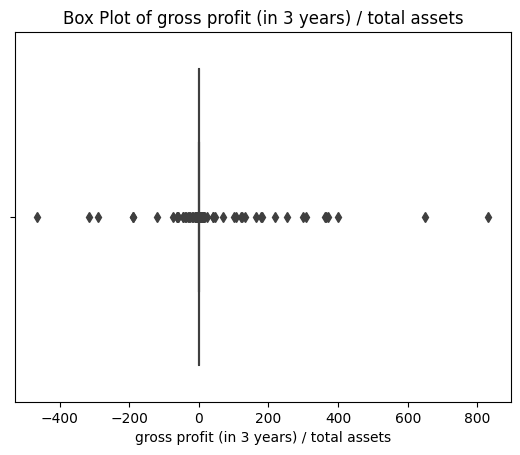



count    38337.000000
mean         0.289369
std          8.339352
min       -463.890000
25%          0.030410
50%          0.167760
75%          0.352280
max        831.660000
Name: gross profit (in 3 years) / total assets, dtype: float64


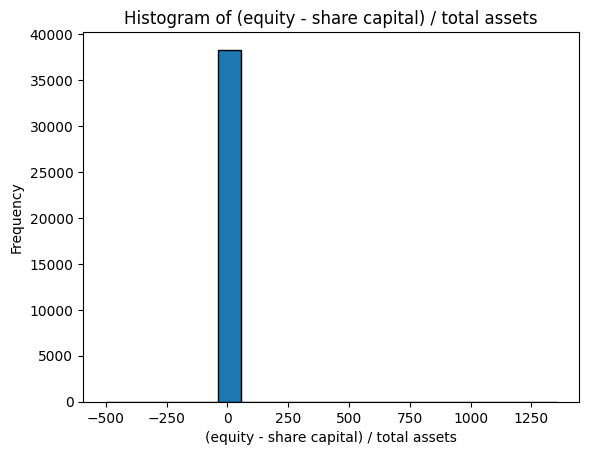

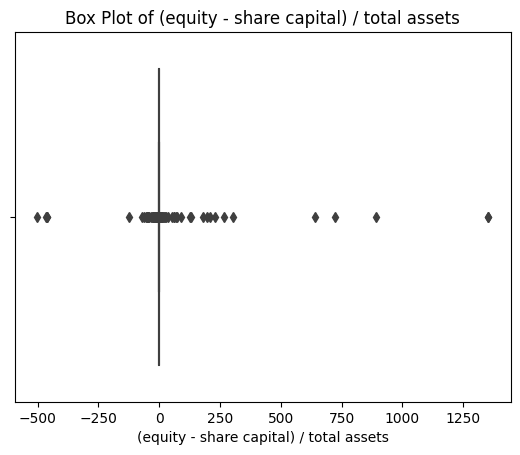



count    38337.000000
mean         0.442676
std         13.251764
min       -500.750000
25%          0.158420
50%          0.393110
75%          0.616100
max       1353.300000
Name: (equity - share capital) / total assets, dtype: float64


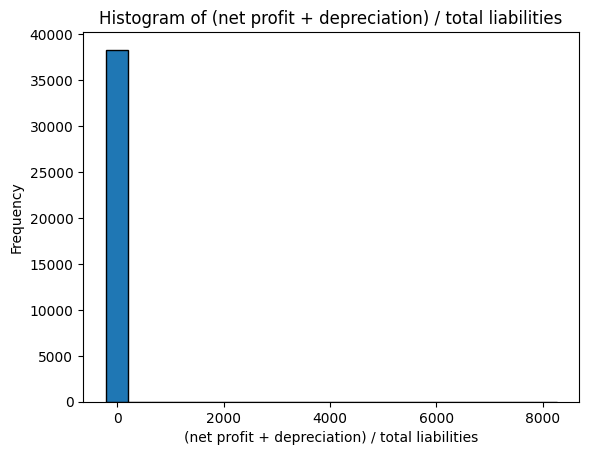

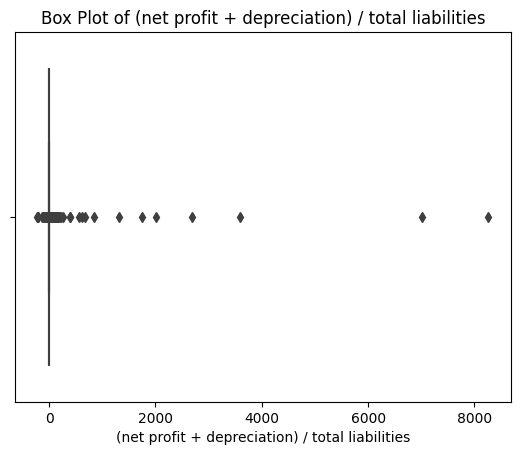



count    38337.000000
mean         1.497875
std         62.436414
min       -221.330000
25%          0.074191
50%          0.232190
75%          0.619400
max       8262.300000
Name: (net profit + depreciation) / total liabilities, dtype: float64


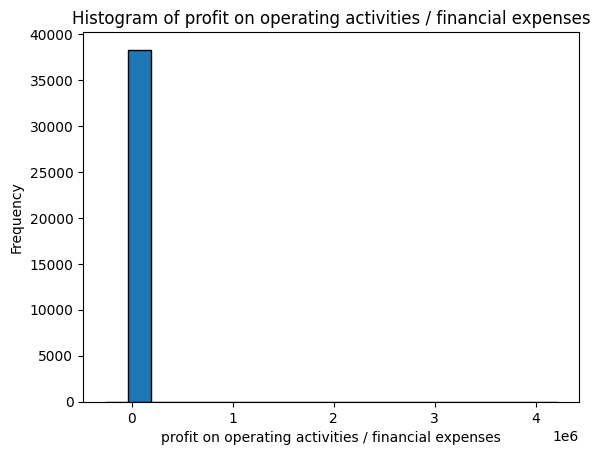

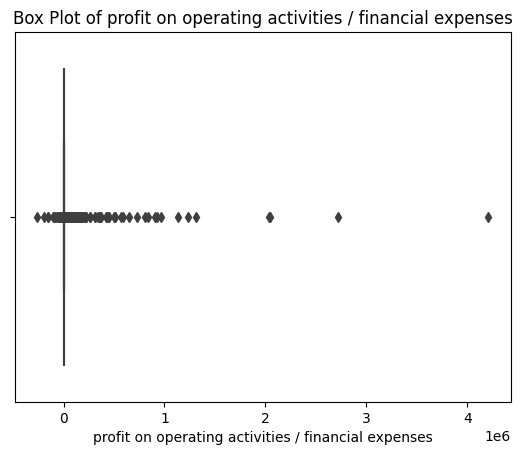



count    3.833700e+04
mean     1.169864e+03
std      3.531889e+04
min     -2.590100e+05
25%      1.135500e-01
50%      1.240600e+00
75%      7.604800e+00
max      4.208800e+06
Name: profit on operating activities / financial expenses, dtype: float64


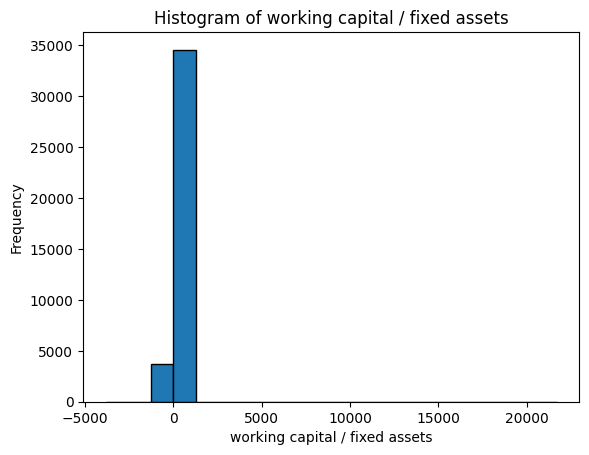

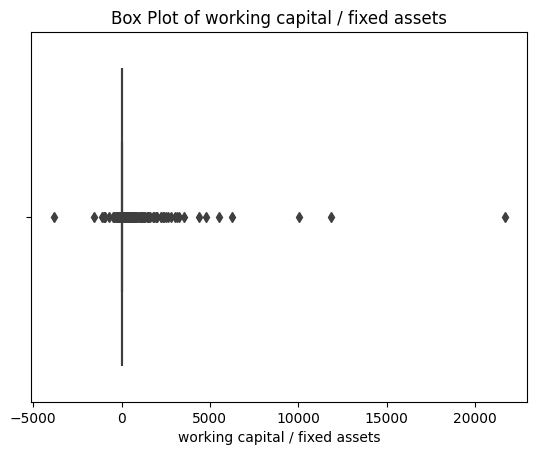



count    38337.000000
mean         6.393383
std        161.442815
min      -3829.900000
25%          0.053168
50%          0.496260
75%          1.630800
max      21701.000000
Name: working capital / fixed assets, dtype: float64


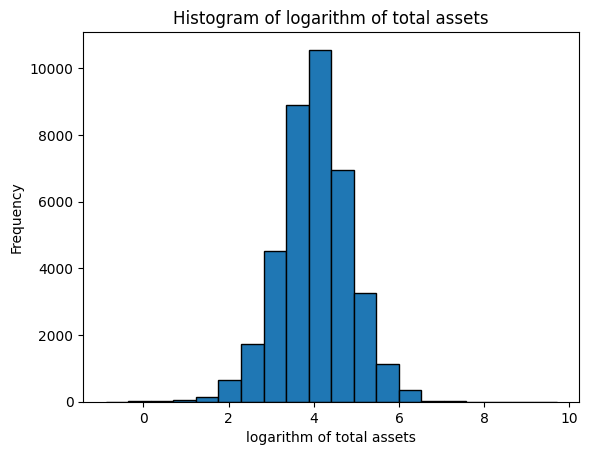

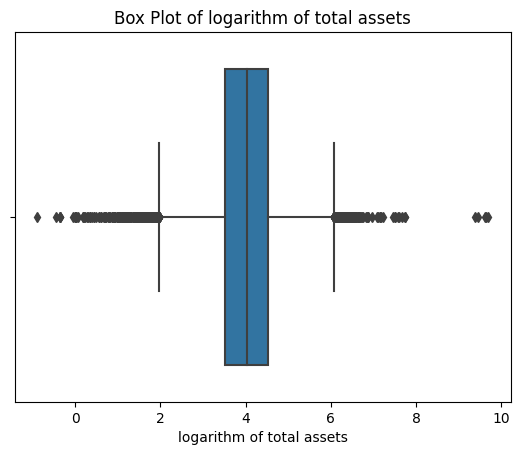



count    38337.000000
mean         4.023145
std          0.824667
min         -0.886060
25%          3.512600
50%          4.031500
75%          4.536100
max          9.698300
Name: logarithm of total assets, dtype: float64


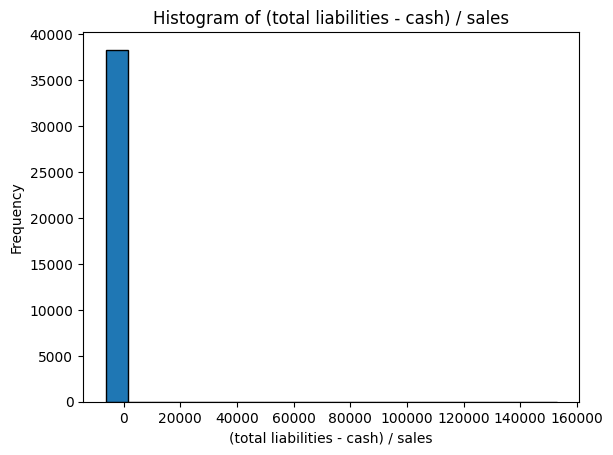

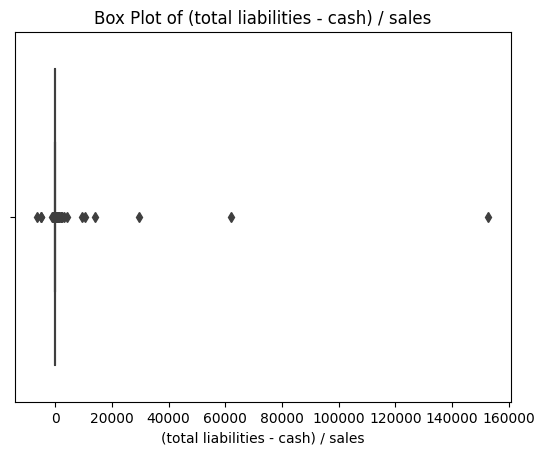



count     38337.000000
mean          7.905162
std         864.131554
min       -6351.700000
25%           0.080860
50%           0.214110
75%           0.402930
max      152860.000000
Name: (total liabilities - cash) / sales, dtype: float64


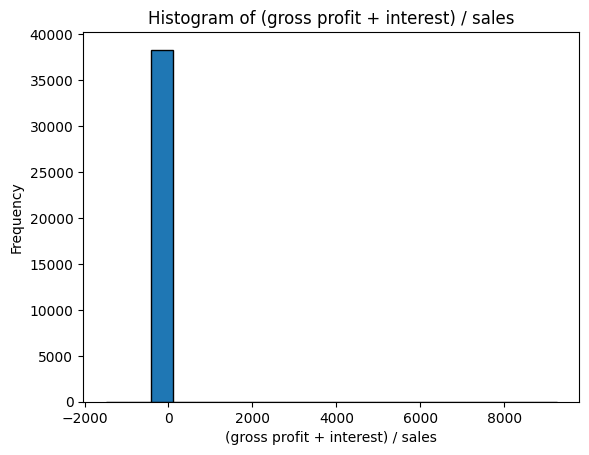

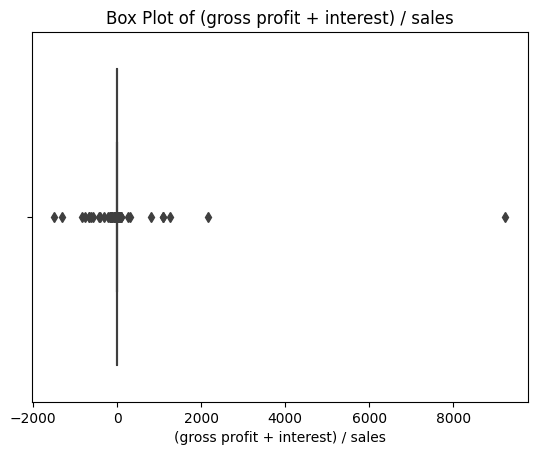



count    38337.000000
mean         0.211308
std         51.706911
min      -1495.600000
25%          0.008412
50%          0.044870
75%          0.103870
max       9244.300000
Name: (gross profit + interest) / sales, dtype: float64


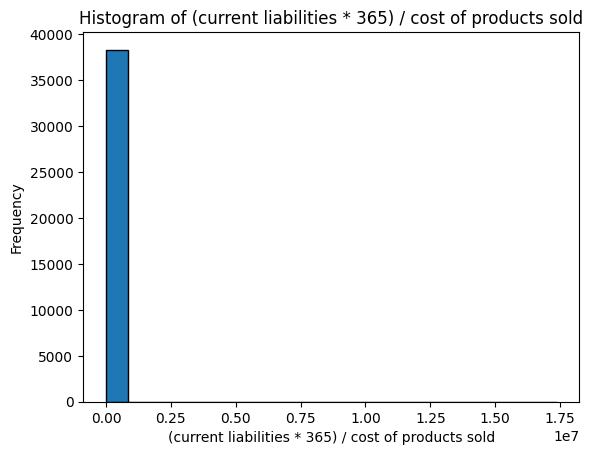

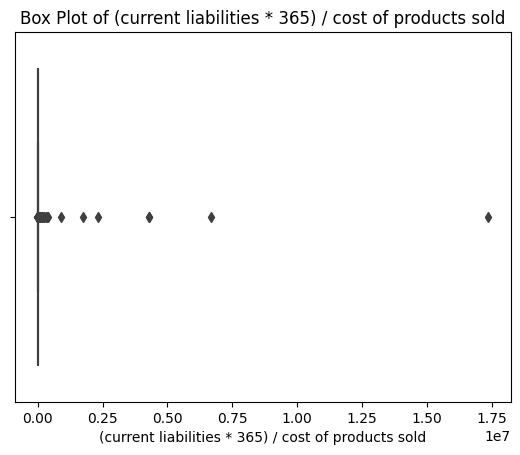



count    3.833700e+04
mean     1.252378e+03
std      1.012364e+05
min     -9.295600e+03
25%      4.635300e+01
50%      7.807100e+01
75%      1.279100e+02
max      1.736400e+07
Name: (current liabilities * 365) / cost of products sold, dtype: float64


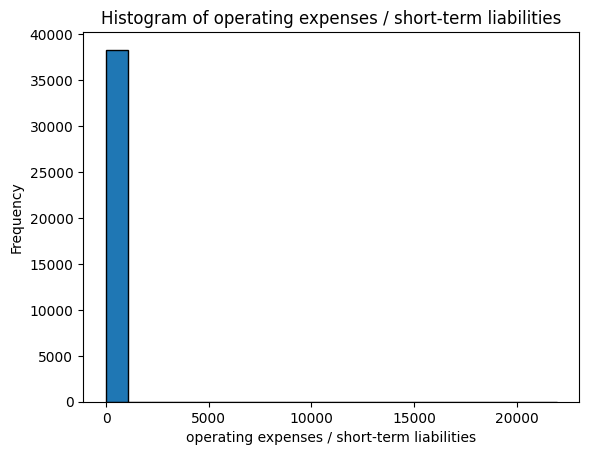

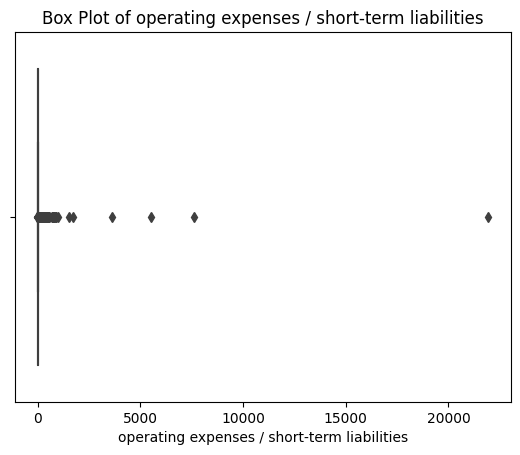



count    38337.000000
mean         8.690817
std        125.343310
min        -19.197000
25%          2.861000
50%          4.684200
75%          7.886400
max      21944.000000
Name: operating expenses / short-term liabilities, dtype: float64


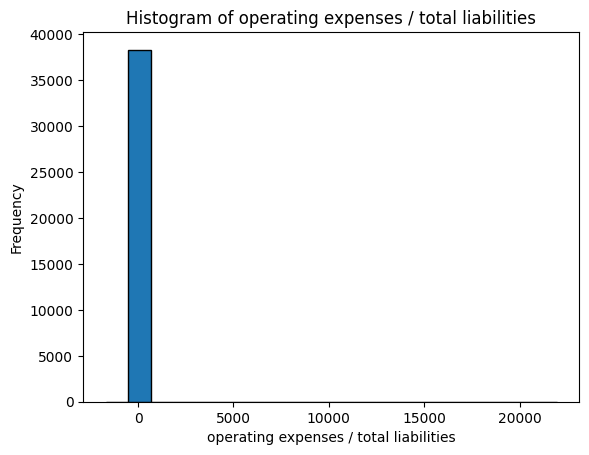

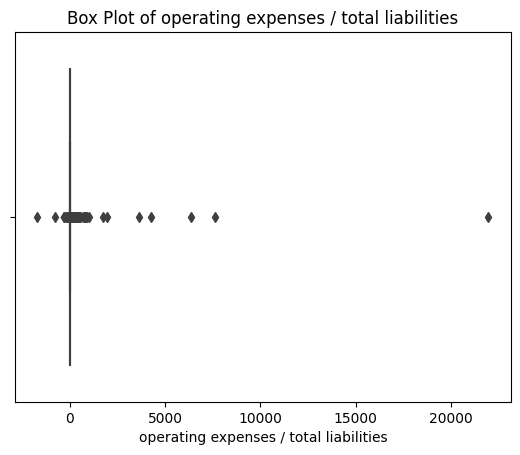



count    38337.000000
mean         5.496284
std        128.404002
min      -1696.000000
25%          0.299010
50%          1.940100
75%          4.562200
max      21944.000000
Name: operating expenses / total liabilities, dtype: float64


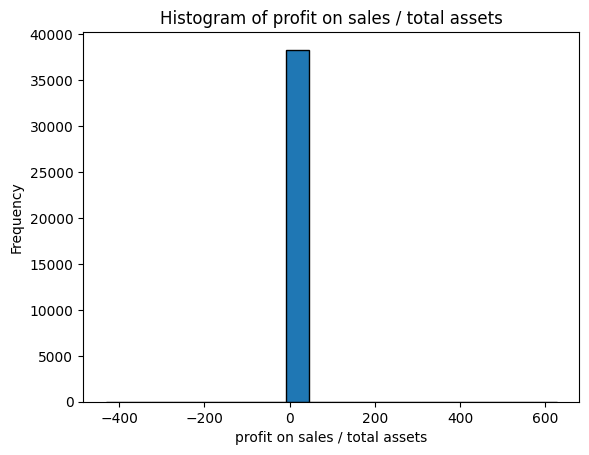

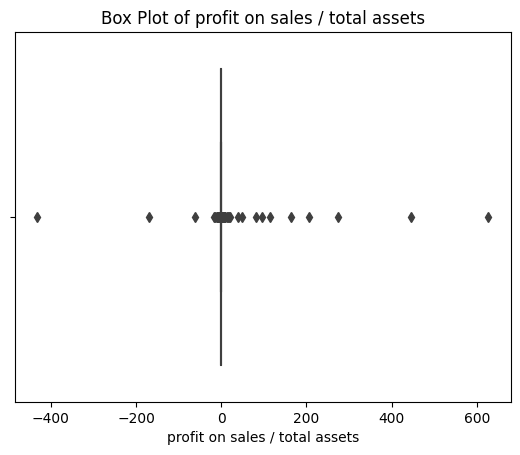



count    38337.000000
mean         0.121083
std          5.087594
min       -431.590000
25%          0.007576
50%          0.062841
75%          0.151710
max        626.920000
Name: profit on sales / total assets, dtype: float64


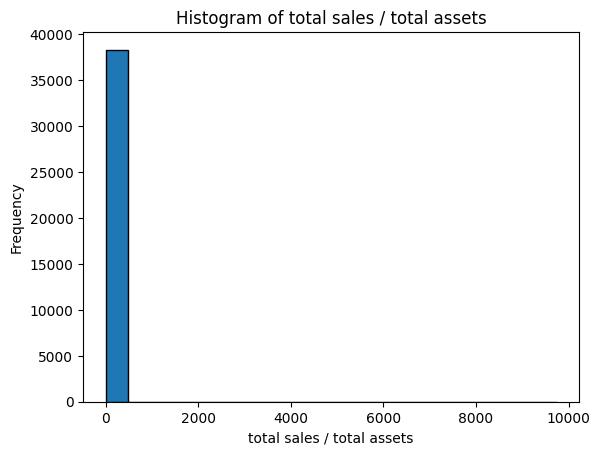

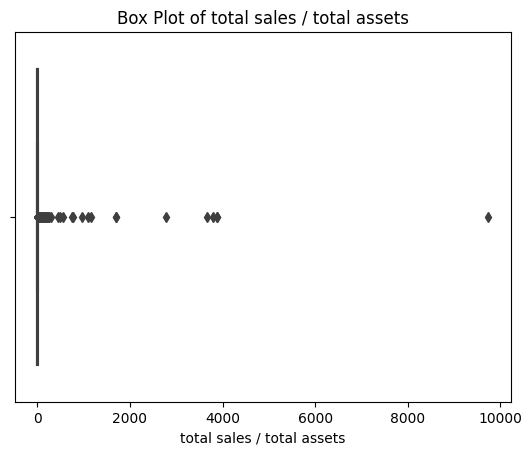



count    38337.000000
mean         3.031329
std         67.003659
min         -0.000857
25%          1.104000
50%          1.645700
75%          2.419900
max       9742.300000
Name: total sales / total assets, dtype: float64


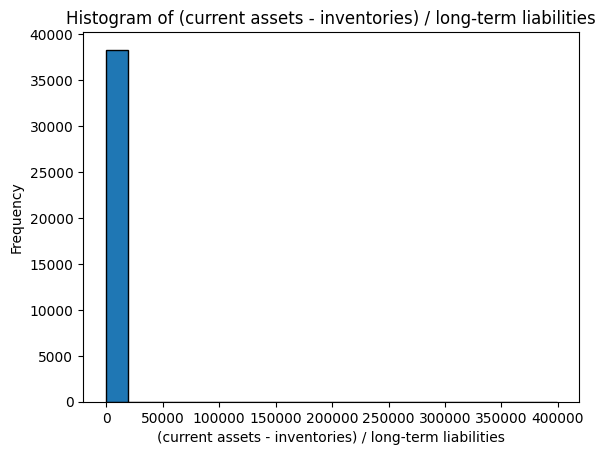

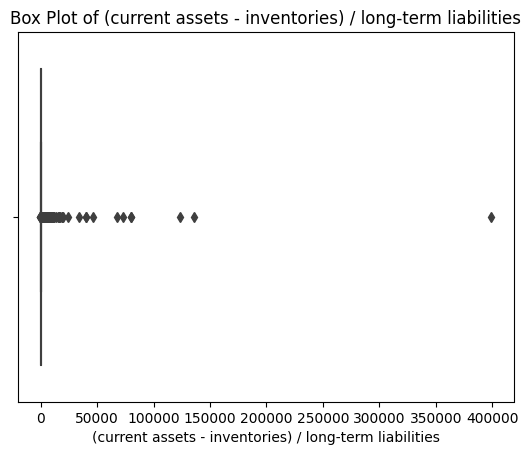



count     38337.000000
mean        112.709329
std        2438.113942
min        -525.520000
25%           2.516600
50%          47.625000
75%         112.709329
max      398920.000000
Name: (current assets - inventories) / long-term liabilities, dtype: float64


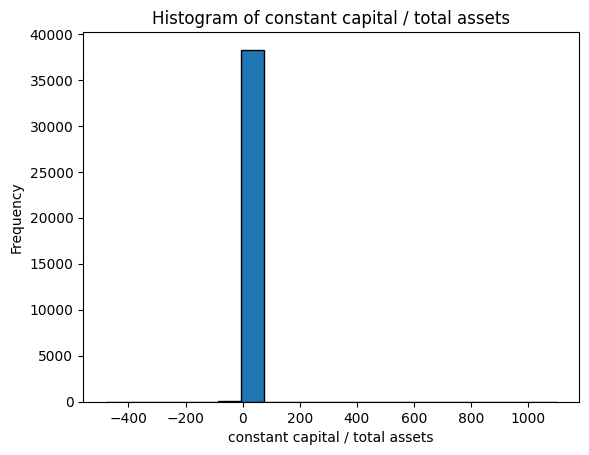

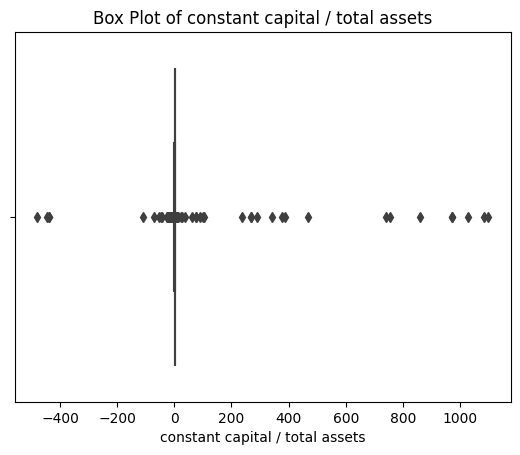



count    38337.000000
mean         0.777914
std         15.322923
min       -479.730000
25%          0.426650
50%          0.616150
75%          0.773070
max       1099.500000
Name: constant capital / total assets, dtype: float64


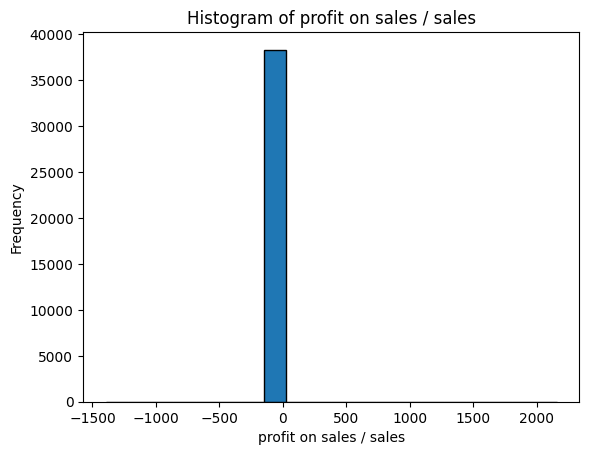

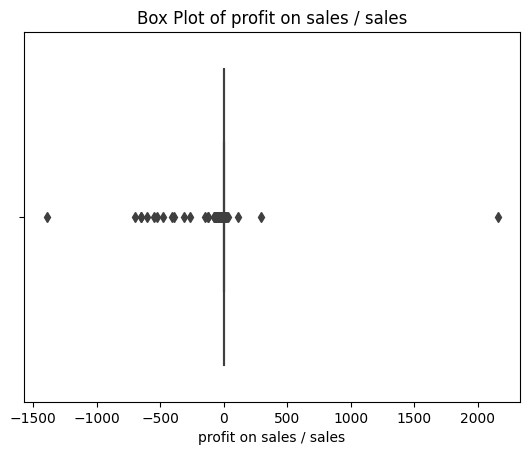



count    38337.000000
mean        -0.110989
std         15.992452
min      -1395.800000
25%          0.004914
50%          0.037829
75%          0.092714
max       2156.500000
Name: profit on sales / sales, dtype: float64


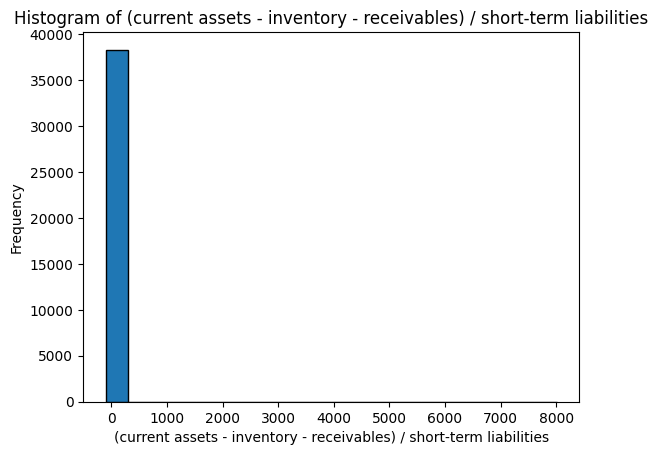

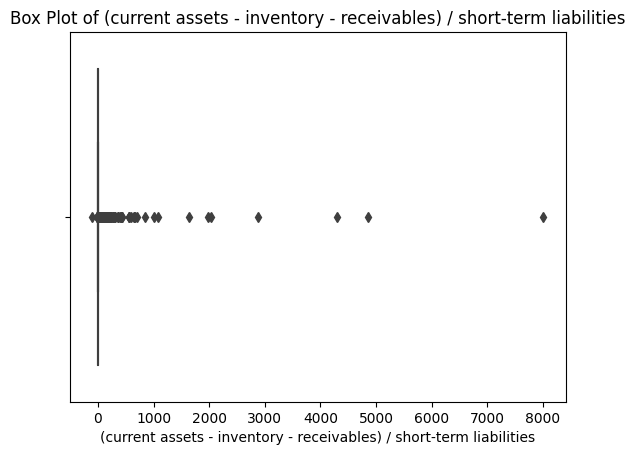



count    38337.000000
mean         2.205544
std         59.239782
min       -101.270000
25%          0.054748
50%          0.183570
75%          0.674100
max       8007.100000
Name: (current assets - inventory - receivables) / short-term liabilities, dtype: float64


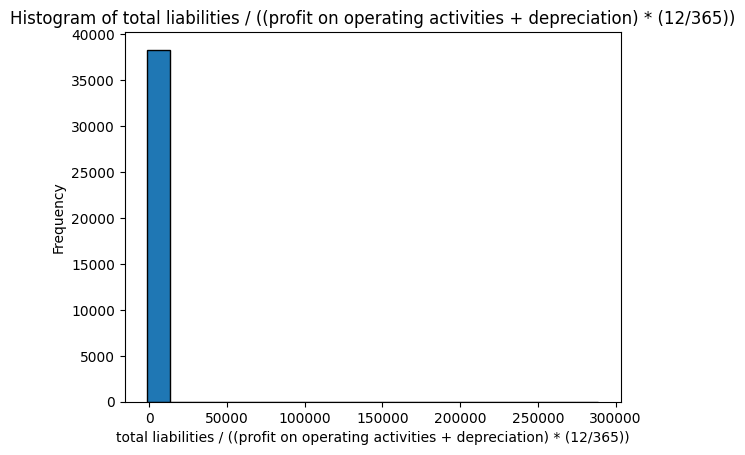

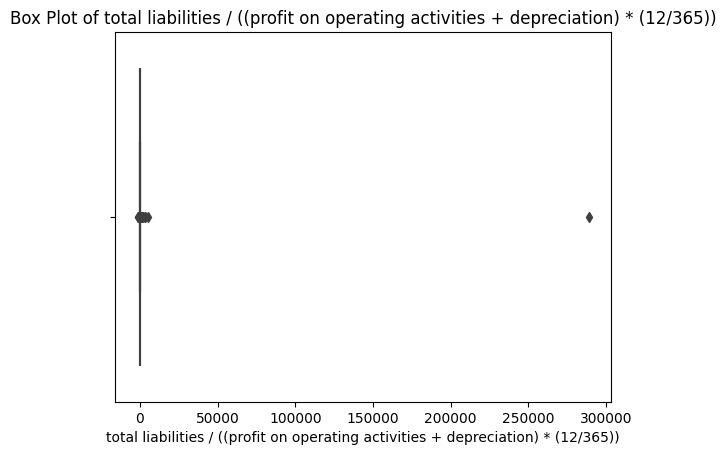



count     38337.000000
mean          8.724499
std        1475.442051
min       -1234.400000
25%           0.028875
50%           0.088737
75%           0.216300
max      288770.000000
Name: total liabilities / ((profit on operating activities + depreciation) * (12/365)), dtype: float64


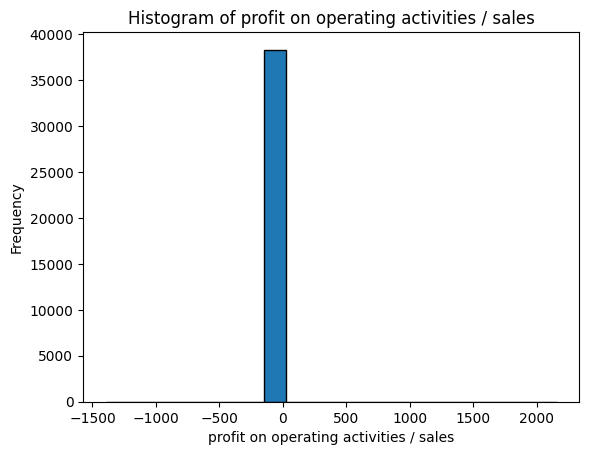

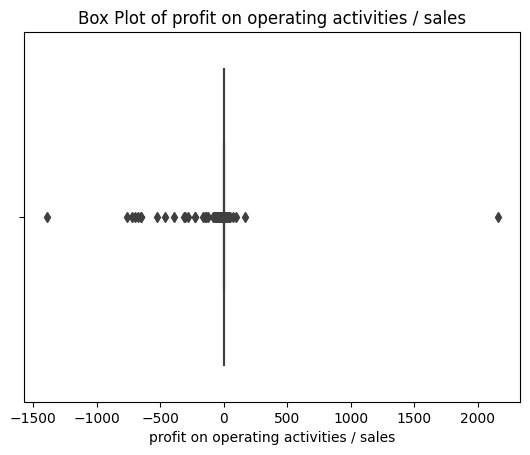



count    38337.000000
mean        -0.147761
std         16.728278
min      -1395.800000
25%          0.000000
50%          0.038836
75%          0.092805
max       2156.800000
Name: profit on operating activities / sales, dtype: float64


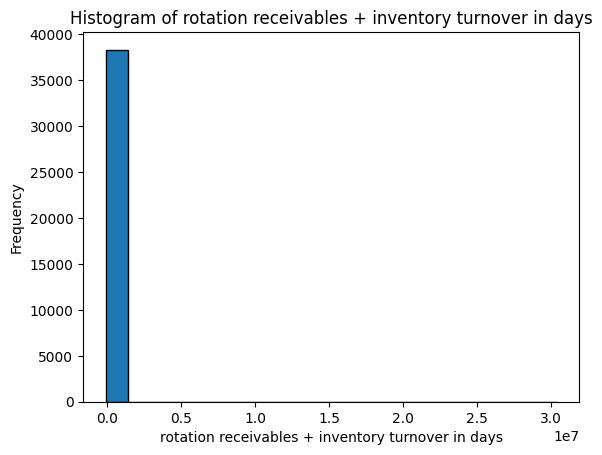

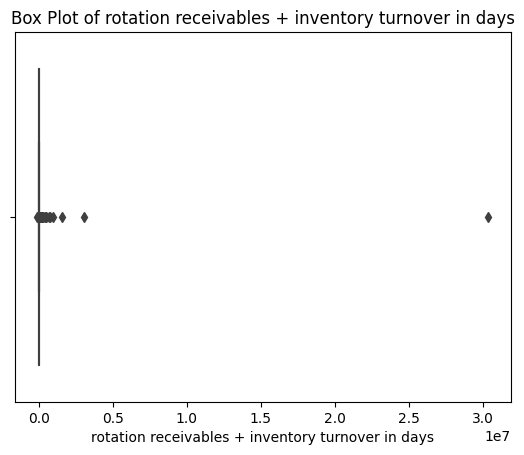



count    3.833700e+04
mean     1.196127e+03
std      1.564178e+05
min     -1.158700e+05
25%      6.639100e+01
50%      9.931700e+01
75%      1.407000e+02
max      3.039300e+07
Name: rotation receivables + inventory turnover in days, dtype: float64


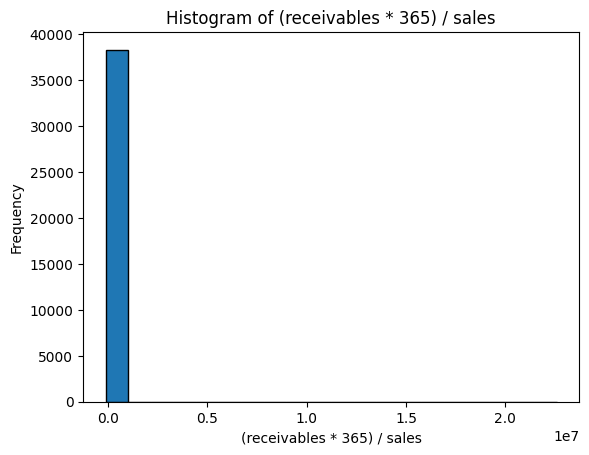

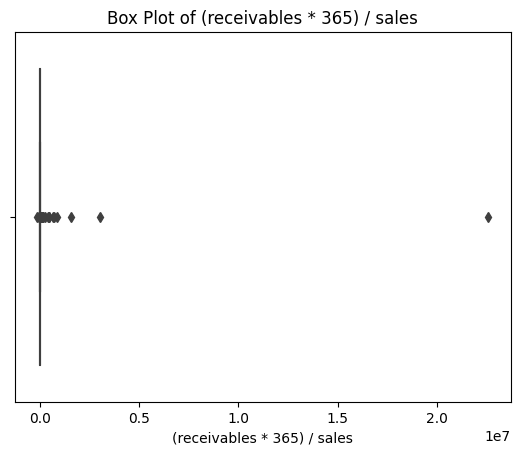



count    3.833700e+04
mean     9.285683e+02
std      1.169274e+05
min     -1.158700e+05
25%      3.502700e+01
50%      5.502600e+01
75%      8.097300e+01
max      2.258400e+07
Name: (receivables * 365) / sales, dtype: float64


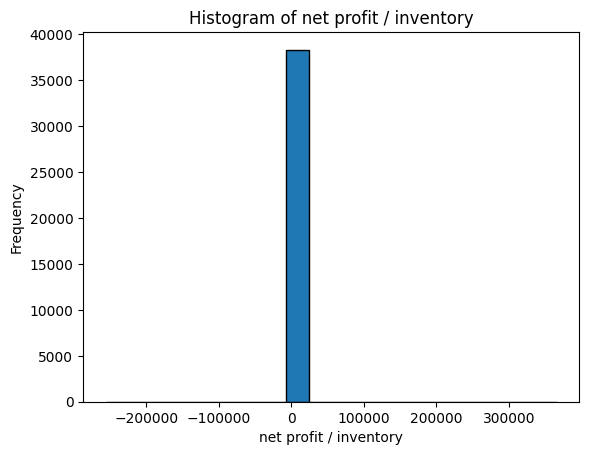

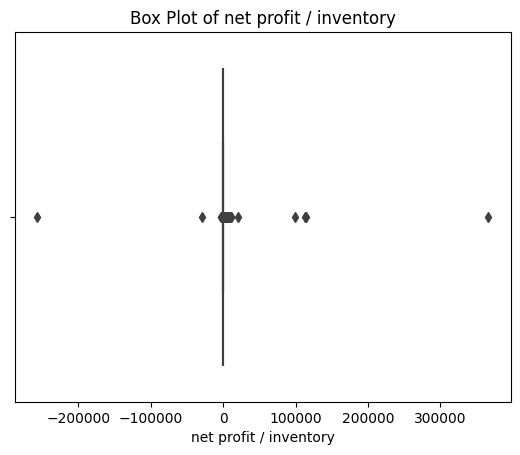



count     38337.000000
mean         17.961700
std        2488.650997
min     -256230.000000
25%           0.035277
50%           0.338580
75%           1.217100
max      366030.000000
Name: net profit / inventory, dtype: float64


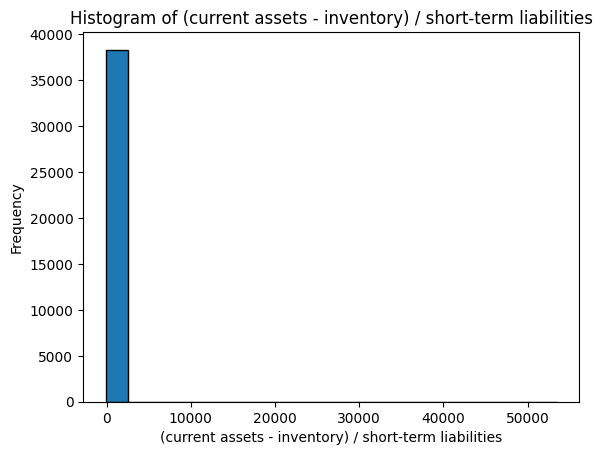

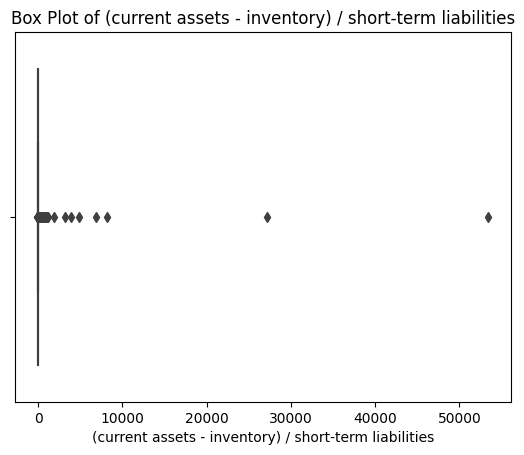



count    38337.000000
mean         5.763826
std        313.715115
min       -101.260000
25%          0.626560
50%          1.044900
75%          1.948000
max      53433.000000
Name: (current assets - inventory) / short-term liabilities, dtype: float64


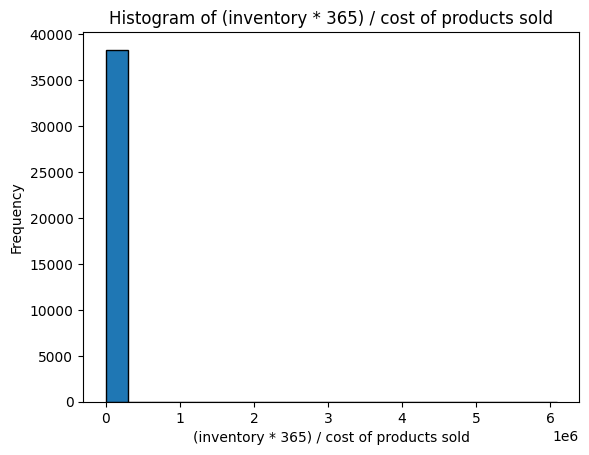

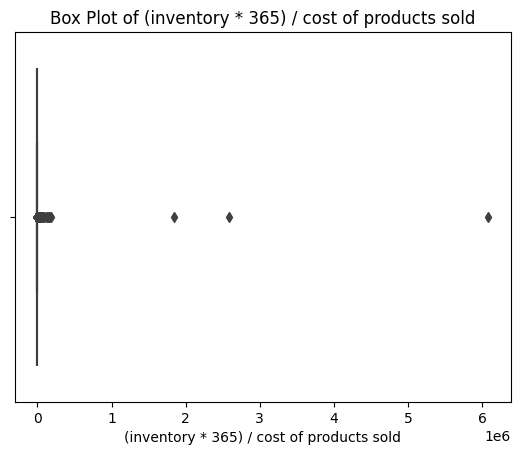



count    3.833700e+04
mean     3.863786e+02
std      3.513632e+04
min     -9.611000e+01
25%      1.628600e+01
50%      3.813700e+01
75%      7.101200e+01
max      6.084200e+06
Name: (inventory * 365) / cost of products sold, dtype: float64


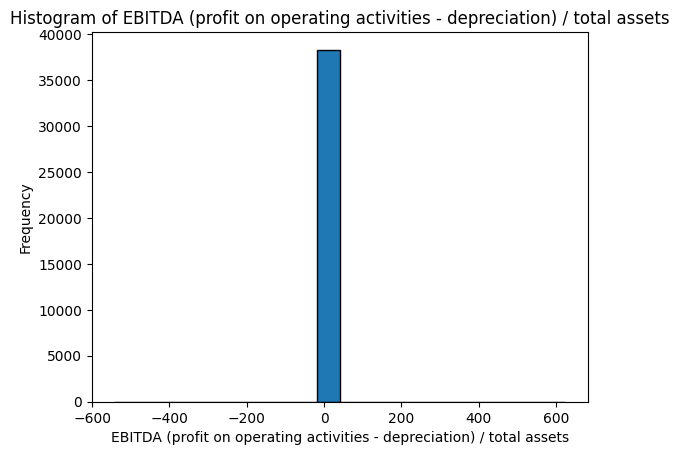

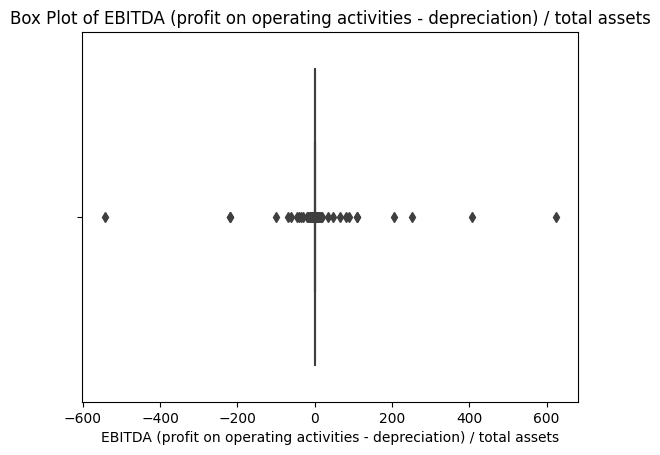



count    38337.000000
mean         0.034105
std          5.420518
min       -542.560000
25%         -0.035528
50%          0.020343
75%          0.108760
max        623.850000
Name: EBITDA (profit on operating activities - depreciation) / total assets, dtype: float64


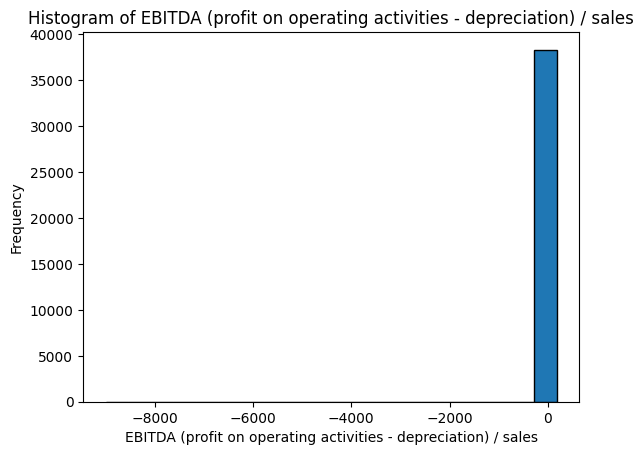

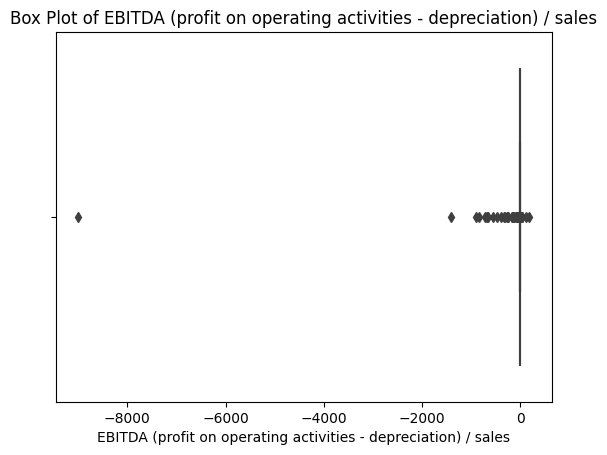



count    38337.000000
mean        -0.506533
std         47.813313
min      -9001.000000
25%         -0.025059
50%          0.011820
75%          0.063361
max        178.890000
Name: EBITDA (profit on operating activities - depreciation) / sales, dtype: float64


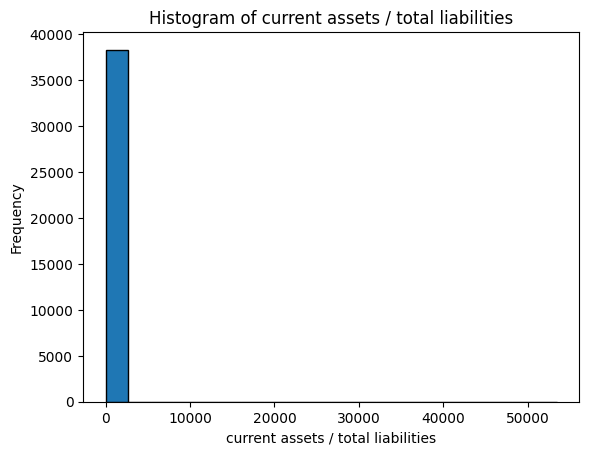

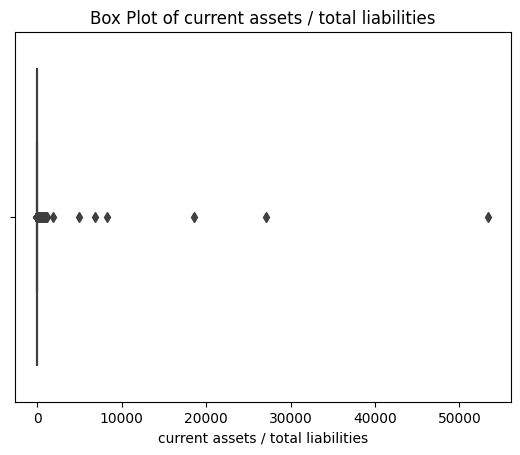



count    38337.000000
mean         6.197390
std        326.639818
min         -0.045239
25%          0.785660
50%          1.237100
75%          2.245800
max      53433.000000
Name: current assets / total liabilities, dtype: float64


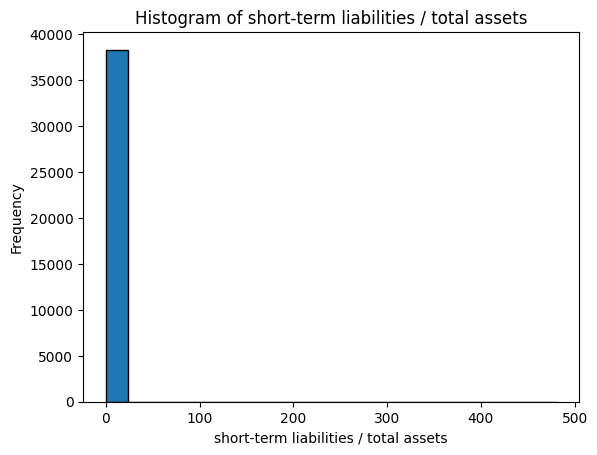

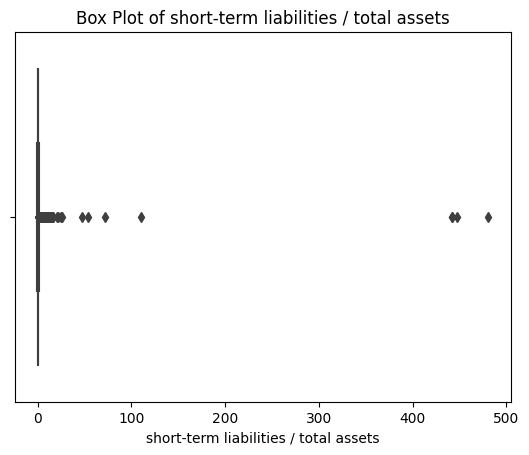



count    38337.00000
mean         0.46215
std          4.71408
min         -0.18661
25%          0.18860
50%          0.33724
75%          0.52697
max        480.73000
Name: short-term liabilities / total assets, dtype: float64


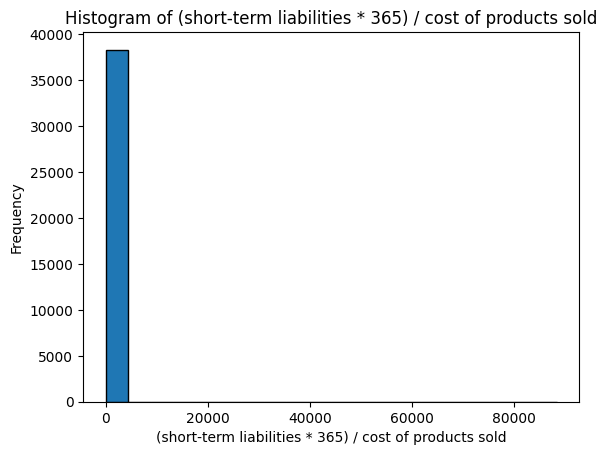

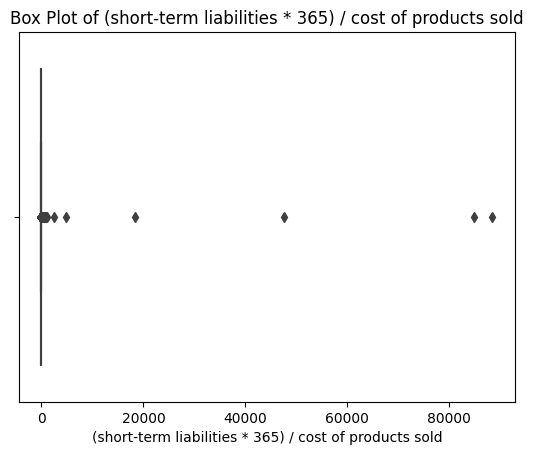



count    38337.000000
mean         7.197114
std        678.473783
min        -25.467000
25%          0.126770
50%          0.213530
75%          0.349590
max      88433.000000
Name: (short-term liabilities * 365) / cost of products sold, dtype: float64


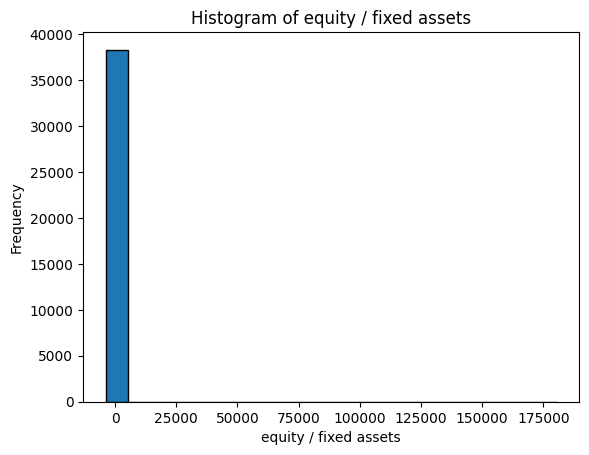

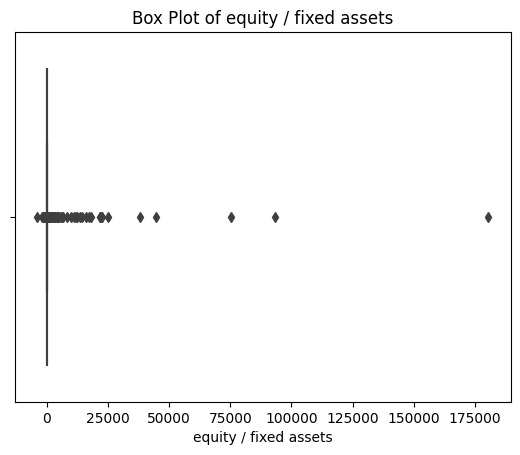



count     38337.000000
mean         24.186303
std        1200.132767
min       -3828.900000
25%           0.709780
50%           1.239600
75%           2.343800
max      180440.000000
Name: equity / fixed assets, dtype: float64


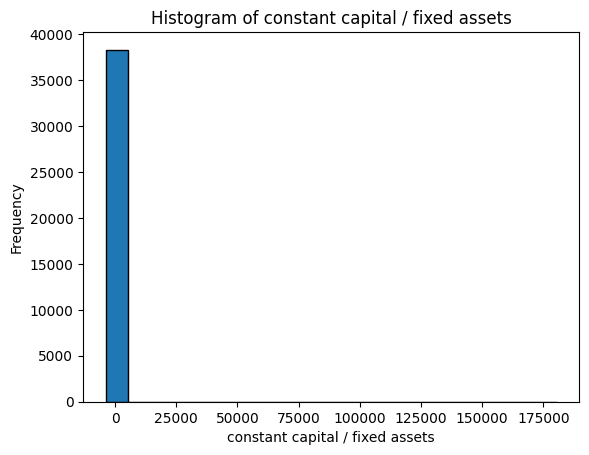

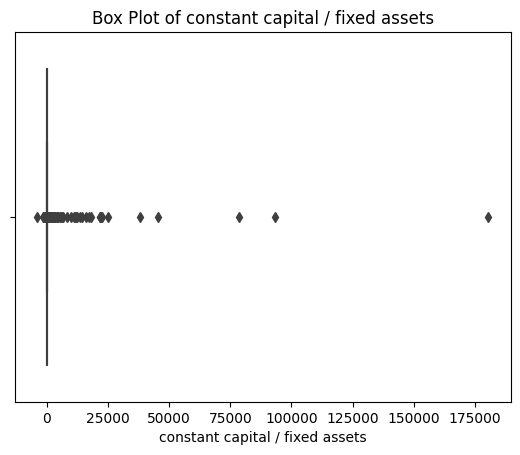



count     38337.000000
mean         25.089927
std        1207.538617
min       -3828.900000
25%           0.972660
50%           1.408700
75%           2.489600
max      180440.000000
Name: constant capital / fixed assets, dtype: float64


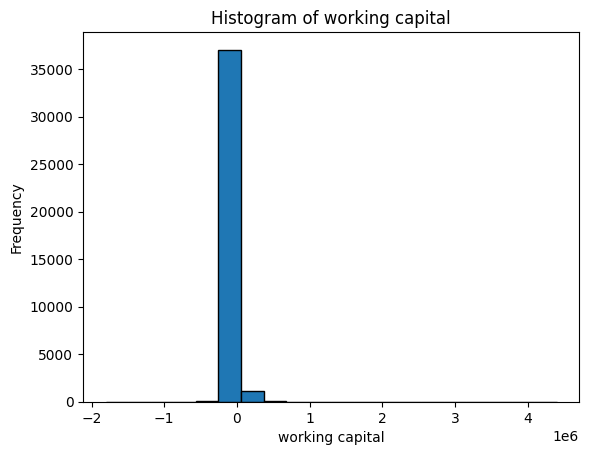

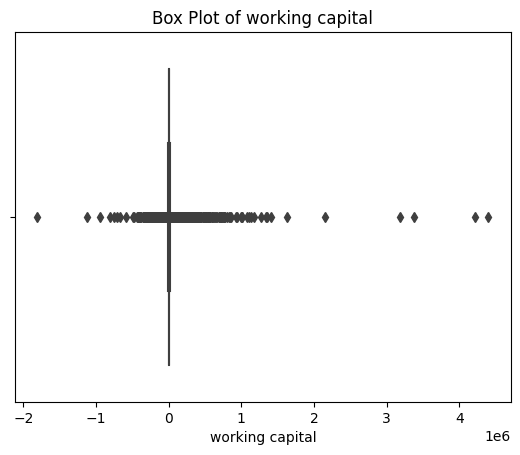



count    3.833700e+04
mean     7.910166e+03
std      6.258919e+04
min     -1.805200e+06
25%      4.256800e+01
50%      1.165200e+03
75%      5.242800e+03
max      4.398400e+06
Name: working capital, dtype: float64


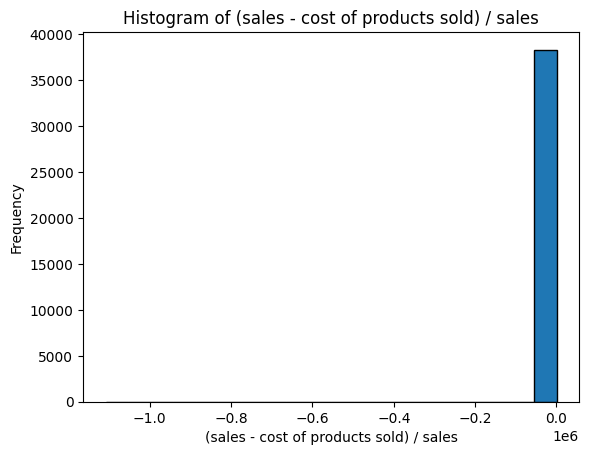

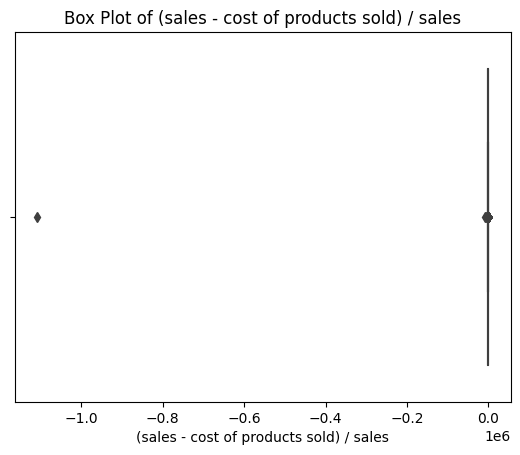



count    3.833700e+04
mean    -2.947876e+01
std      5.660666e+03
min     -1.108300e+06
25%      1.024300e-02
50%      5.365500e-02
75%      1.293800e-01
max      2.931500e+02
Name: (sales - cost of products sold) / sales, dtype: float64


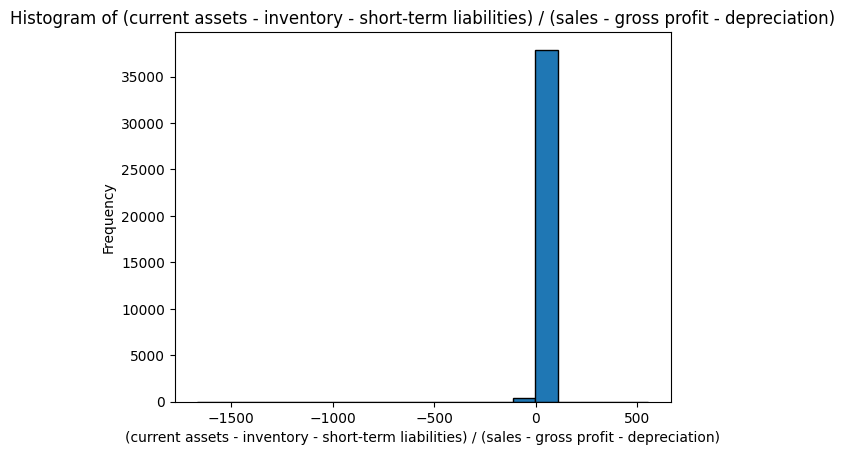

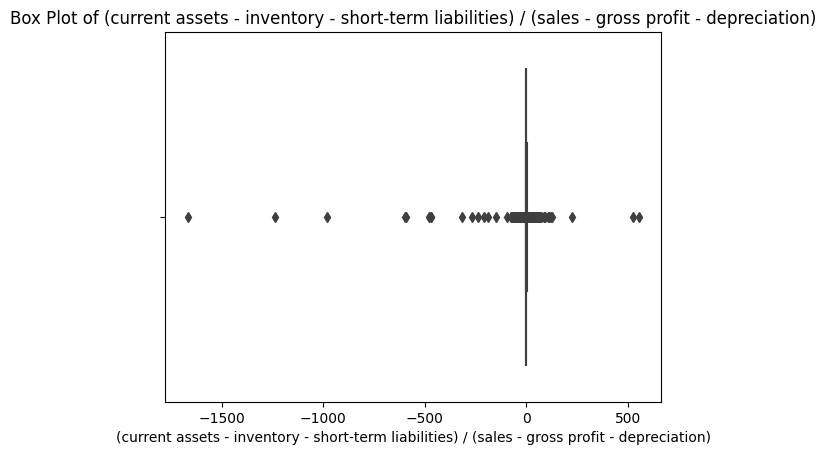



count    38337.000000
mean        -0.012730
std         14.366359
min      -1667.300000
25%          0.017680
50%          0.122660
75%          0.286150
max        552.640000
Name: (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation), dtype: float64


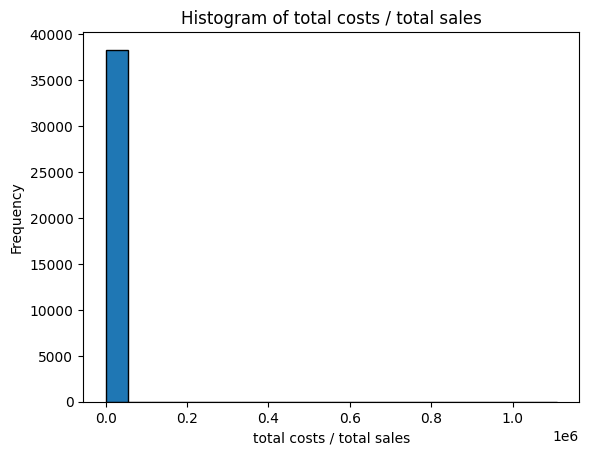

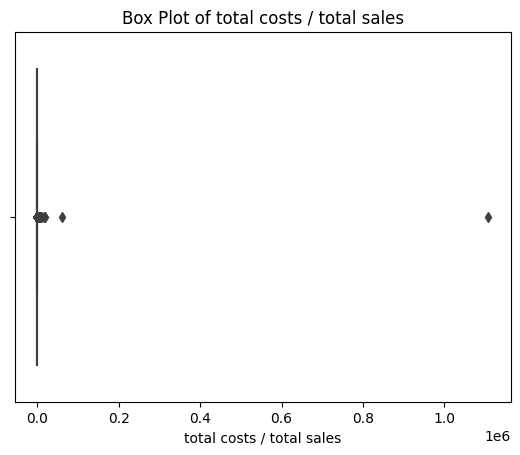



count    3.833700e+04
mean     3.379745e+01
std      5.670602e+03
min     -1.986900e+02
25%      8.749700e-01
50%      9.501900e-01
75%      9.919900e-01
max      1.108300e+06
Name: total costs / total sales, dtype: float64


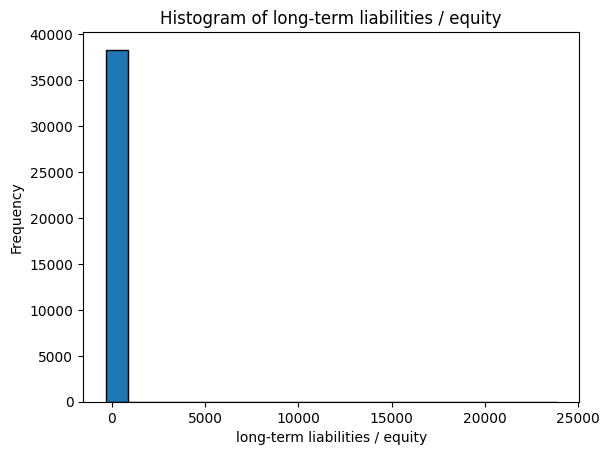

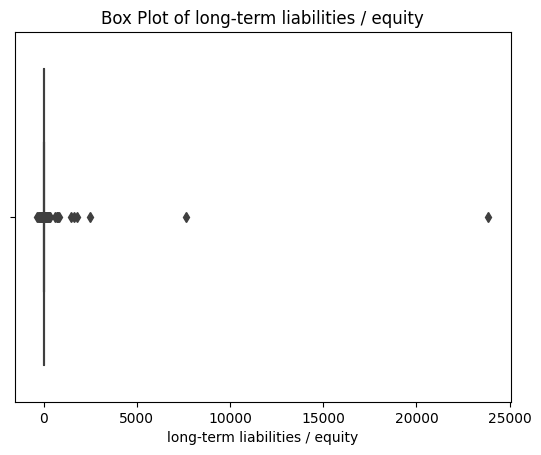



count    38337.000000
mean         1.419676
std        129.805993
min       -327.970000
25%          0.000000
50%          0.006760
75%          0.234690
max      23853.000000
Name: long-term liabilities / equity, dtype: float64


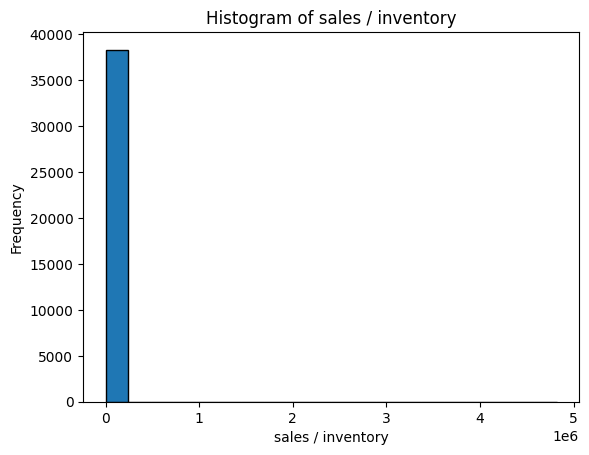

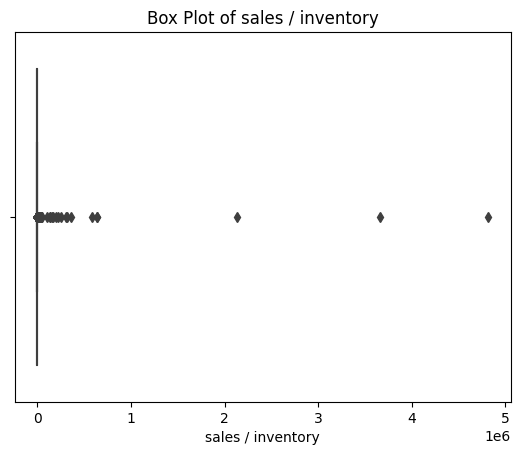



count    3.833700e+04
mean     4.764487e+02
std      3.345964e+04
min     -1.244000e+01
25%      5.793300e+00
50%      1.052700e+01
75%      2.407300e+01
max      4.818700e+06
Name: sales / inventory, dtype: float64


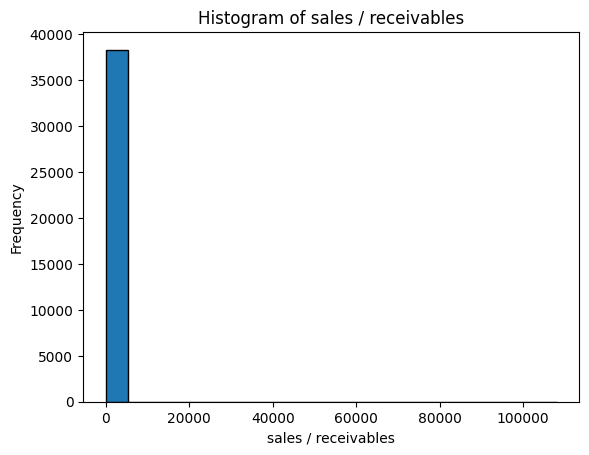

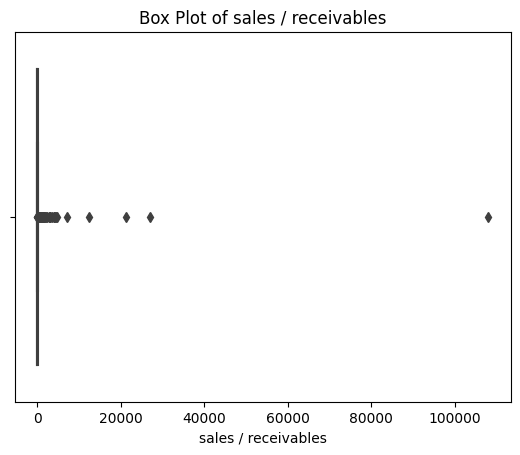



count     38337.000000
mean         17.728635
std         587.574428
min         -12.656000
25%           4.506900
50%           6.632800
75%          10.415000
max      108000.000000
Name: sales / receivables, dtype: float64


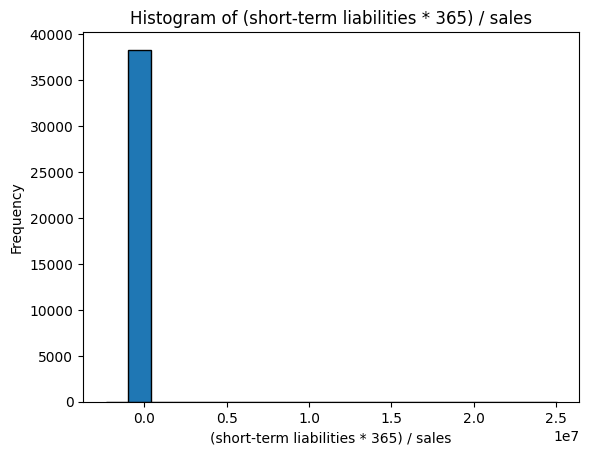

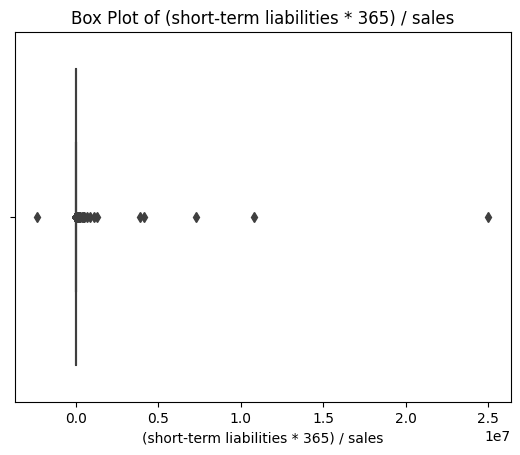



count    3.833700e+04
mean     1.624794e+03
std      1.478467e+05
min     -2.336500e+06
25%      4.186400e+01
50%      7.060700e+01
75%      1.155600e+02
max      2.501600e+07
Name: (short-term liabilities * 365) / sales, dtype: float64


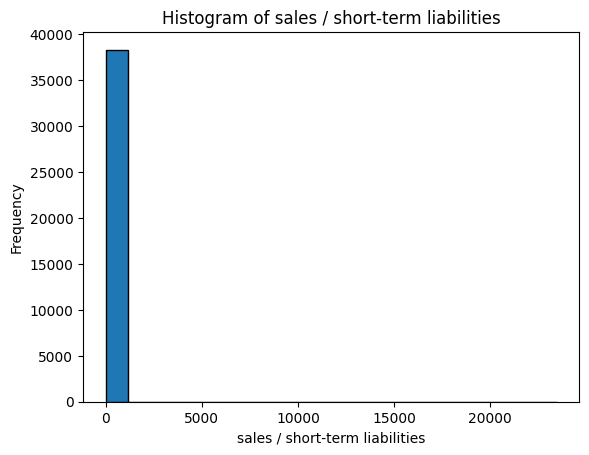

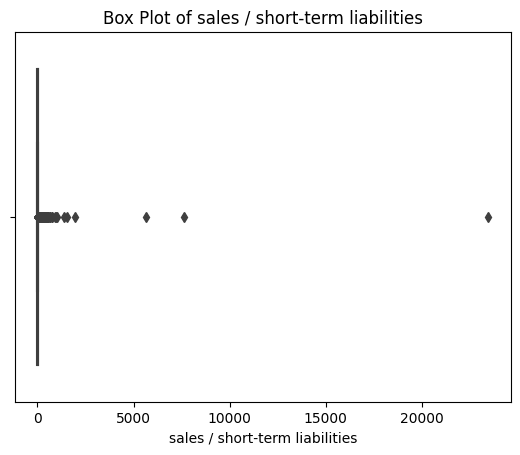



count    38337.000000
mean         9.464972
std        131.475774
min         -1.543200
25%          3.158800
50%          5.170200
75%          8.720700
max      23454.000000
Name: sales / short-term liabilities, dtype: float64


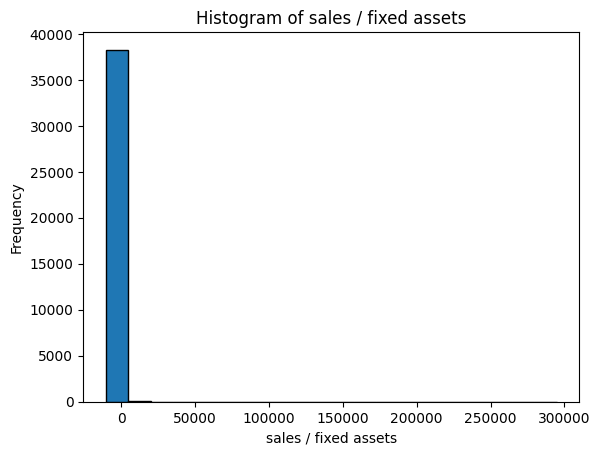

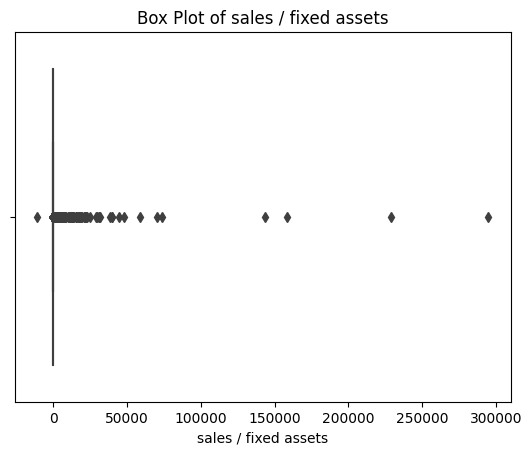



count     38337.000000
mean         75.482082
std        2409.303227
min      -10677.000000
25%           2.219900
50%           4.389600
75%          10.463000
max      294770.000000
Name: sales / fixed assets, dtype: float64


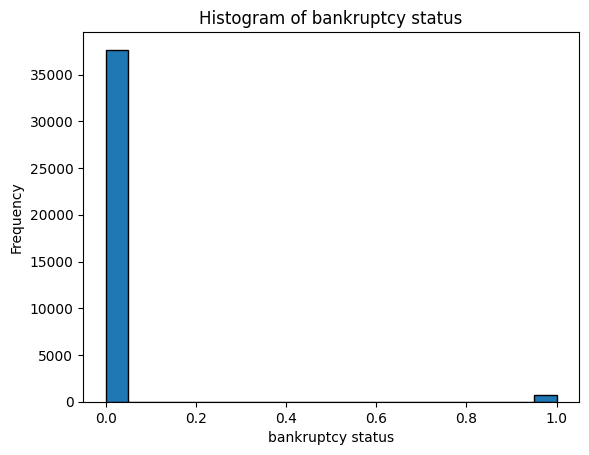

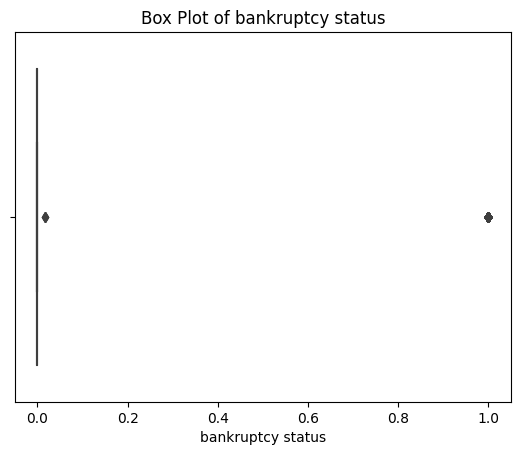



count    38337.000000
mean         0.017765
std          0.132092
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: bankruptcy status, dtype: float64


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [23]:
list(map(lambda col: univariate_analysis(all_data_reset, col), formula))

## Bivariante analysis


In [29]:
def scatterplo(data,feature):
    plt.scatter(data[feature], data['bankruptcy status'])  # Replace 'target_variable' with your actual target column
    plt.xlabel(feature)
    plt.ylabel('Target Variable')
    plt.title(f'Scatter Plot: {feature} vs. Target Variable')
    plt.show()

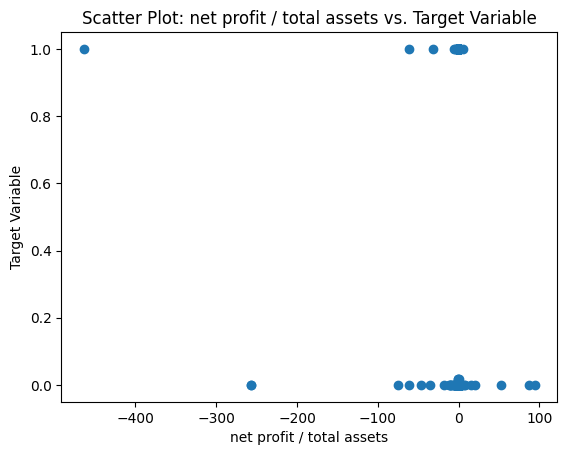

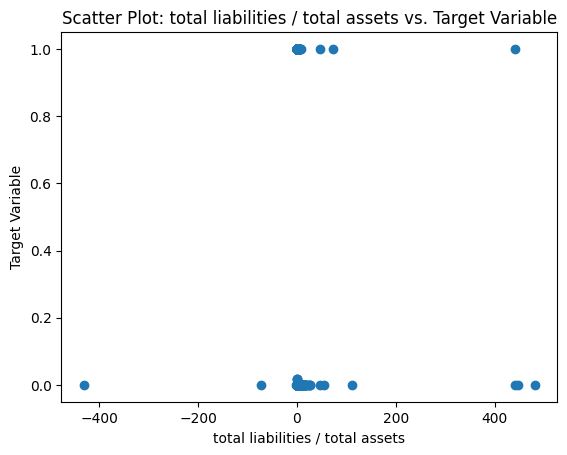

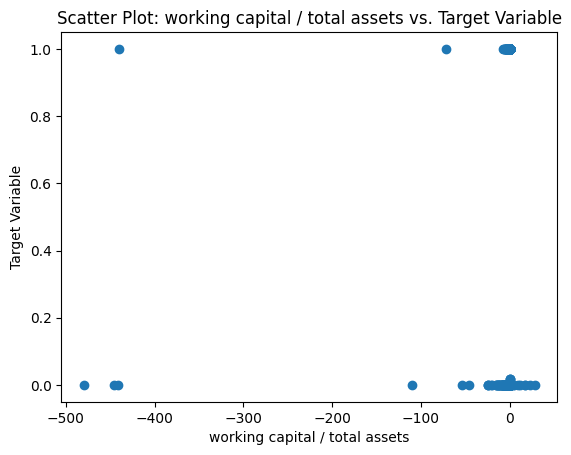

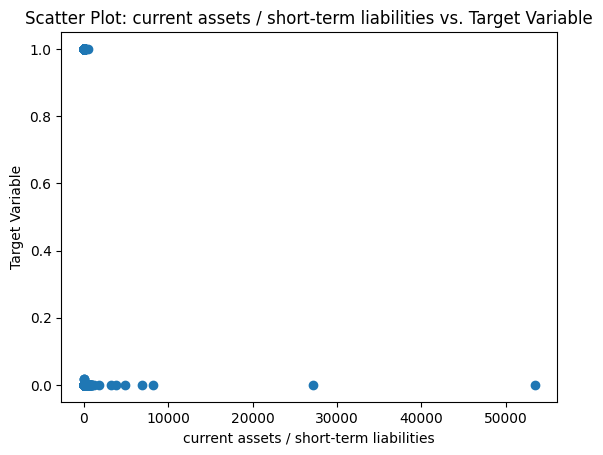

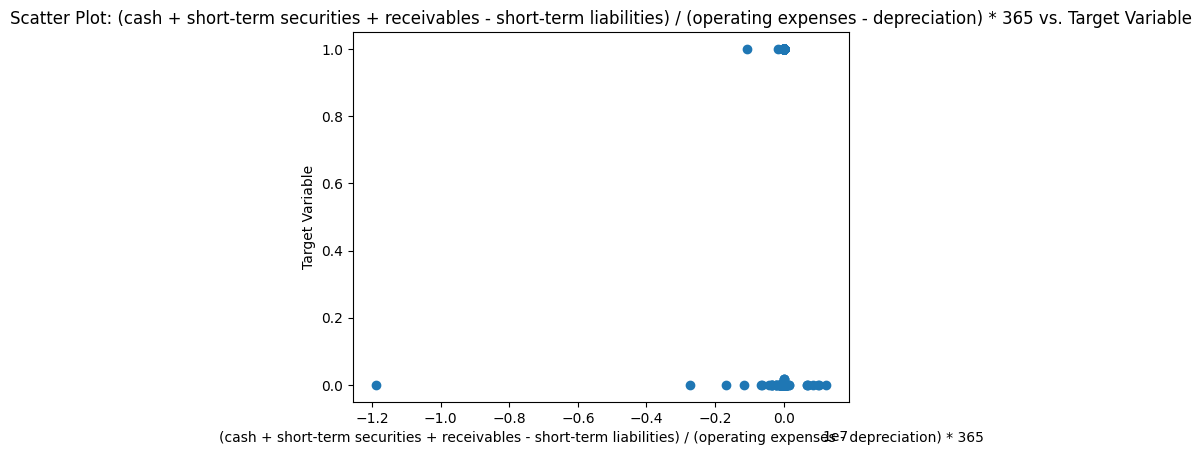

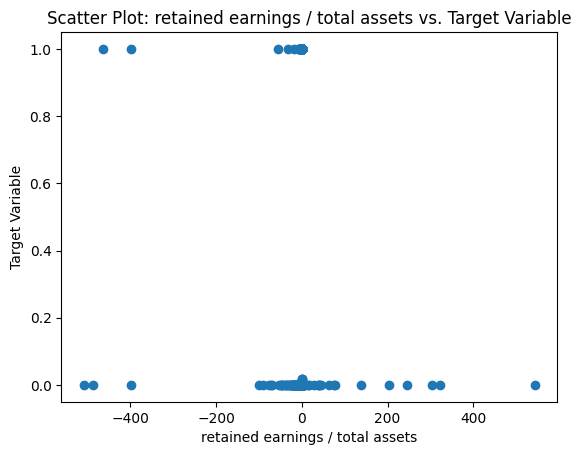

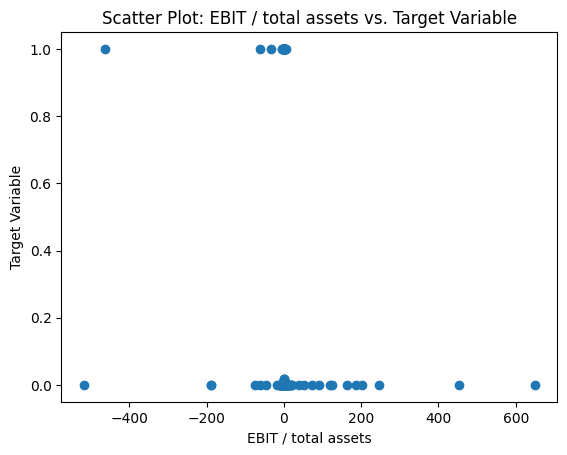

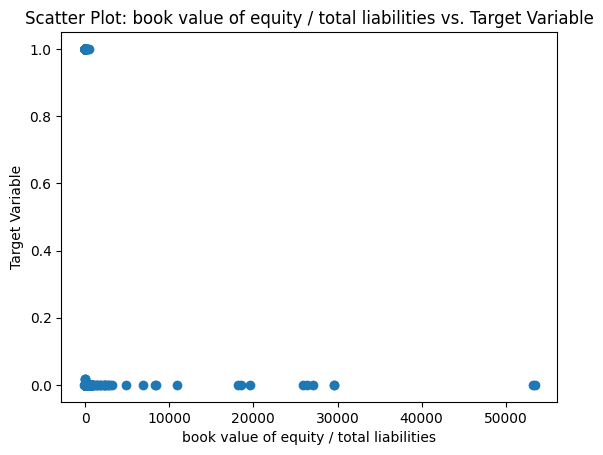

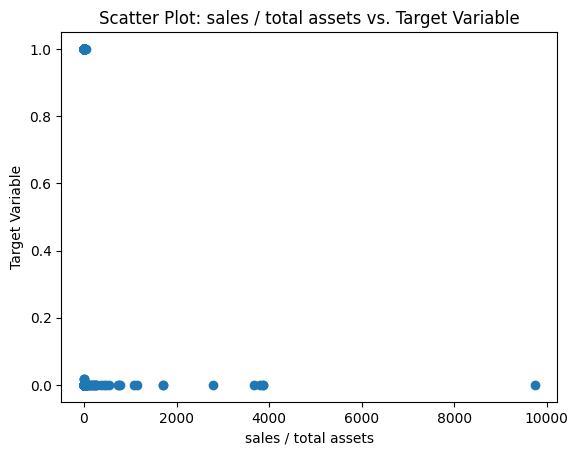

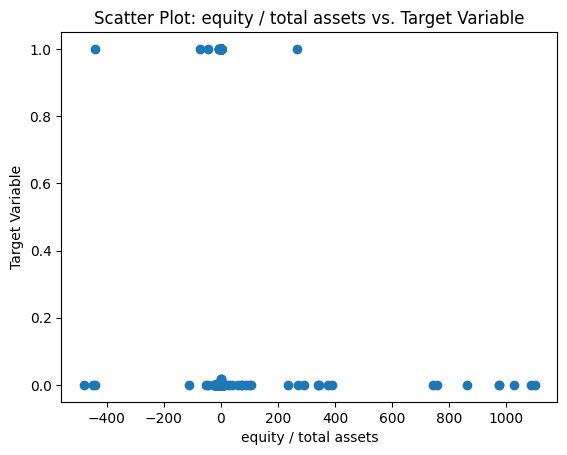

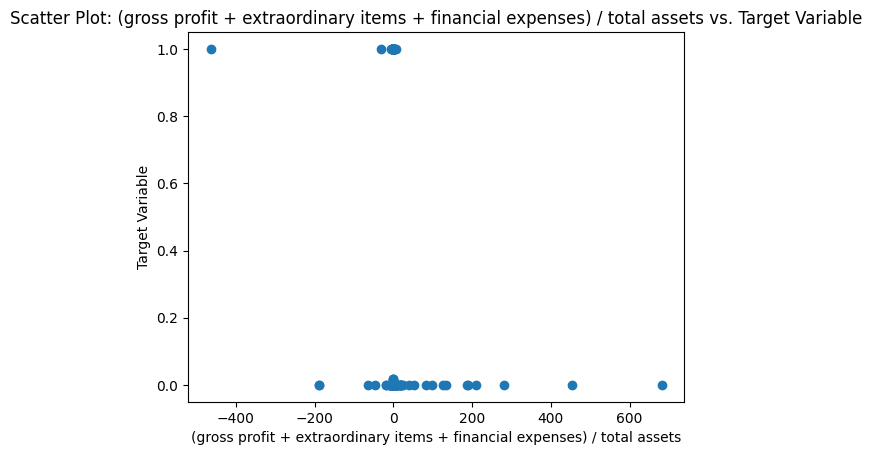

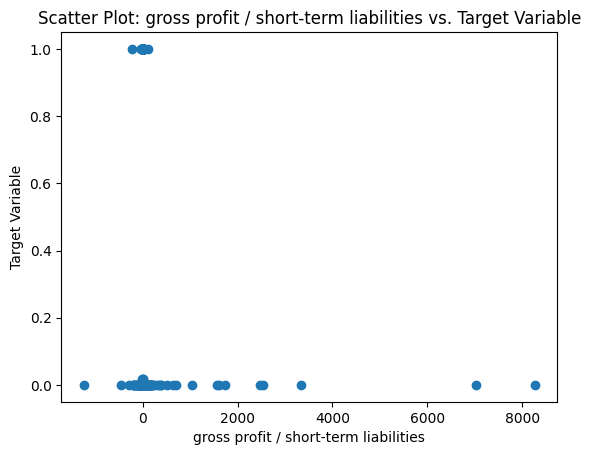

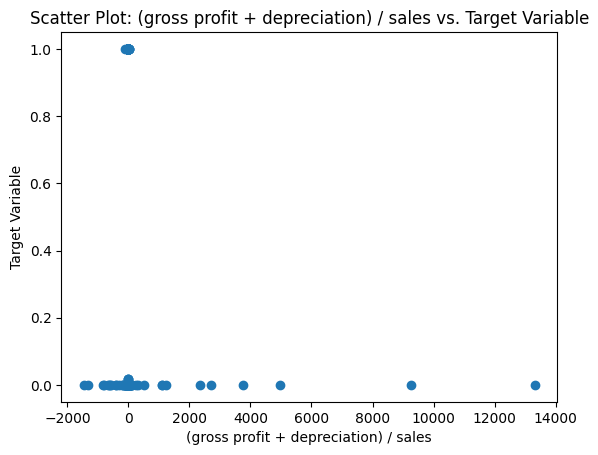

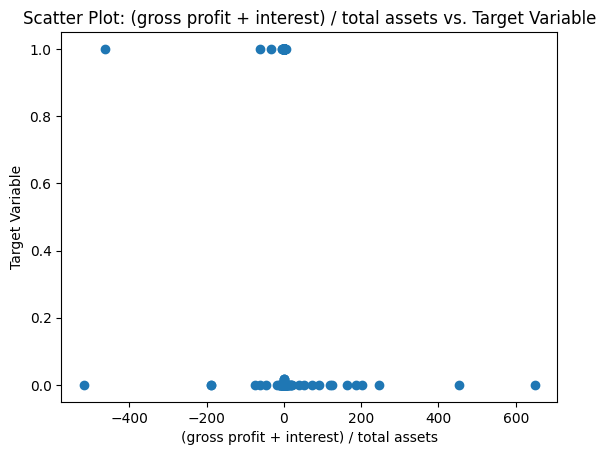

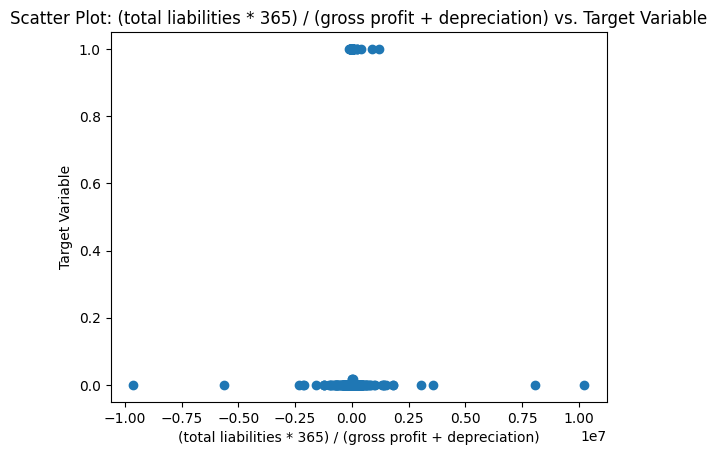

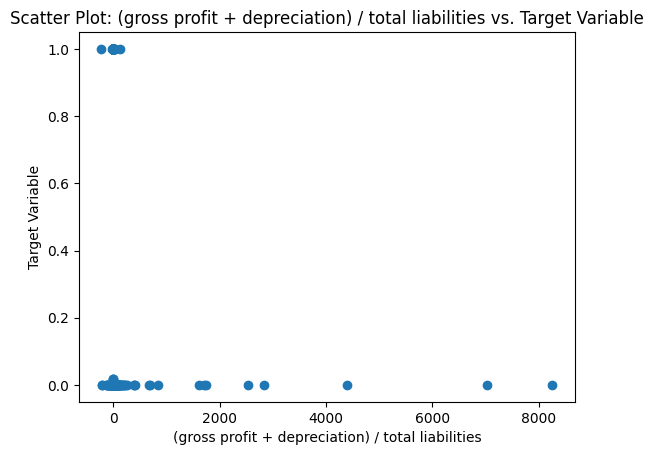

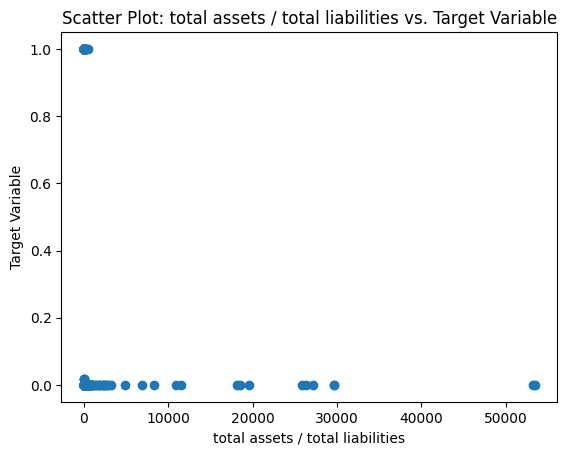

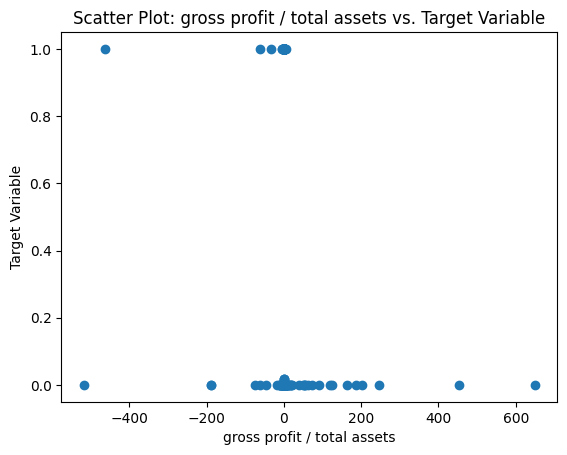

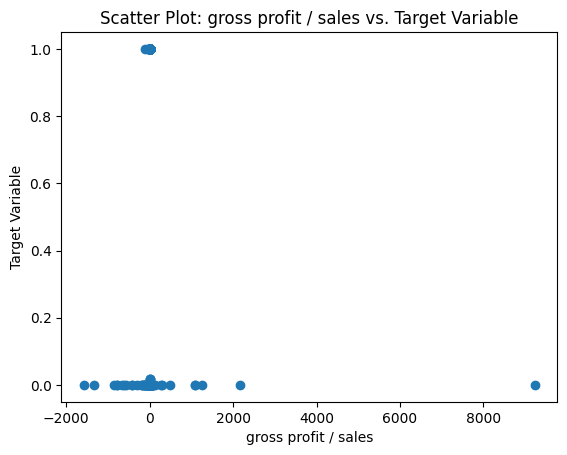

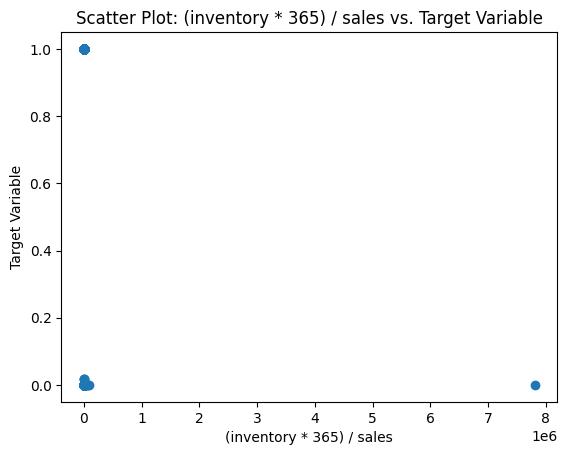

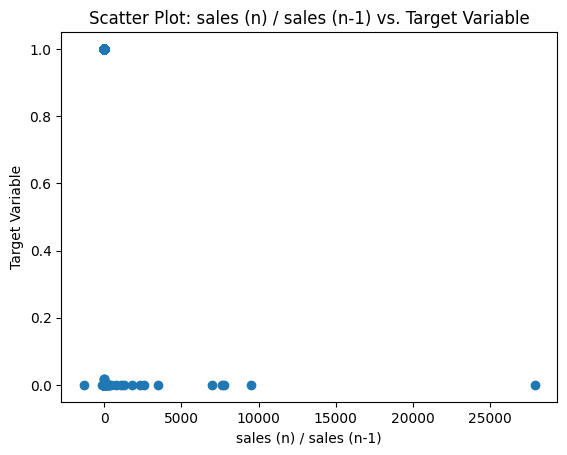

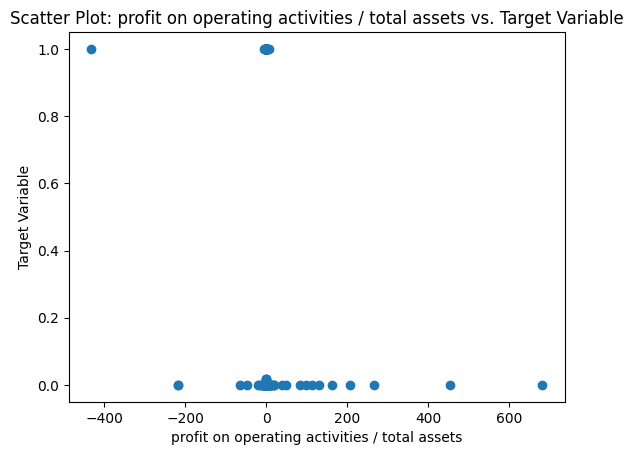

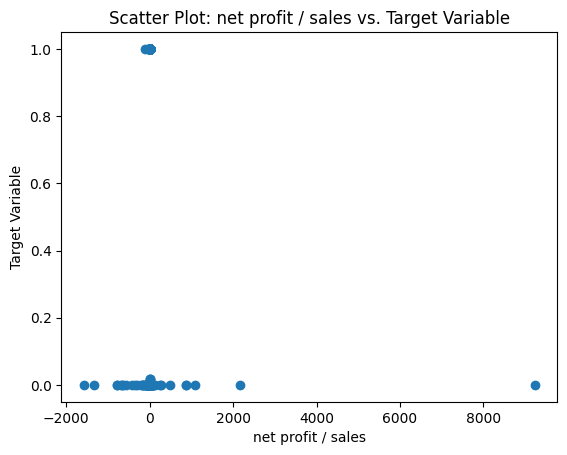

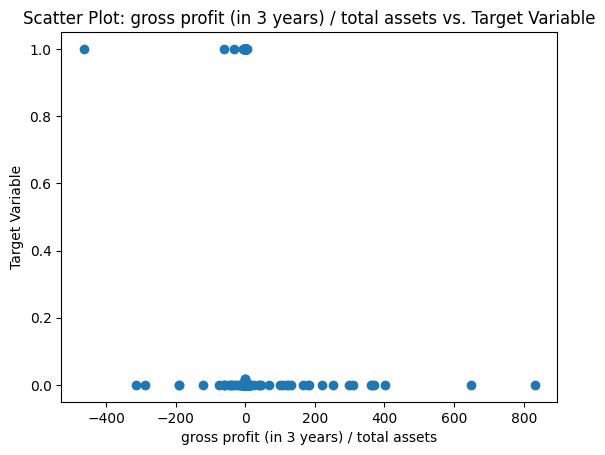

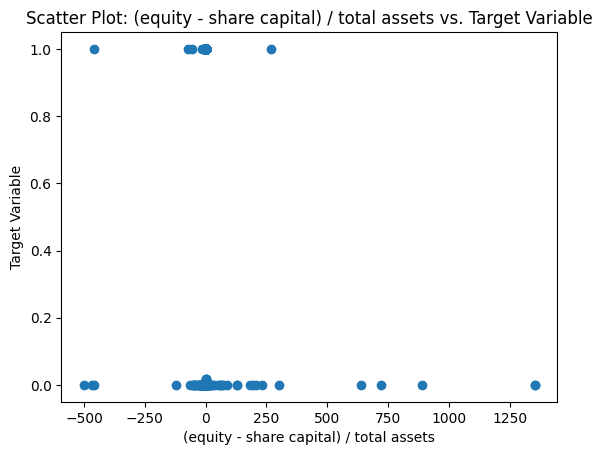

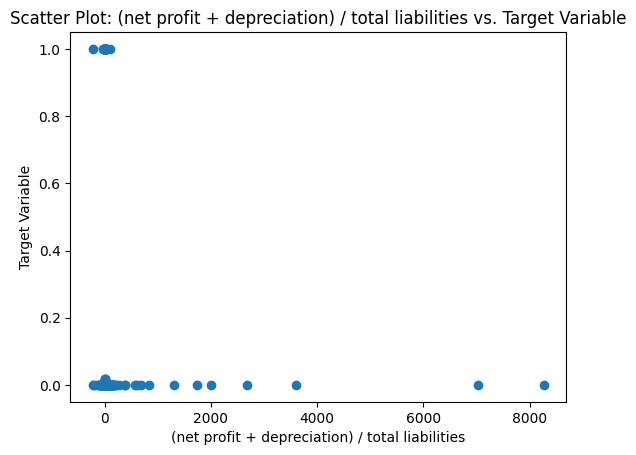

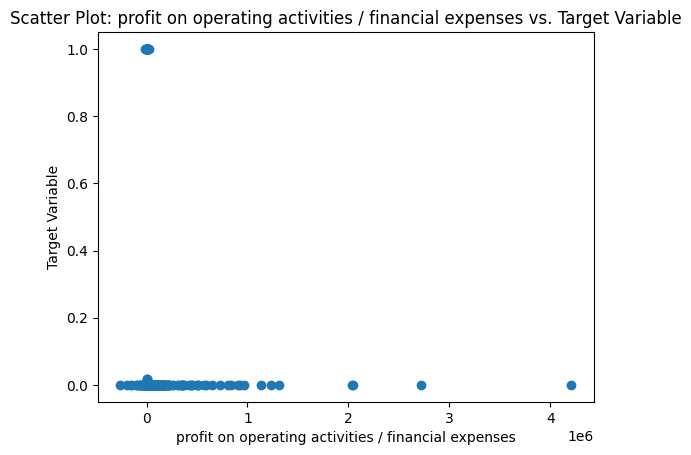

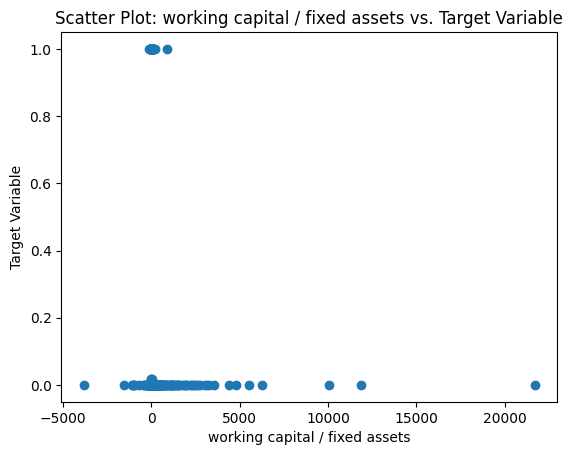

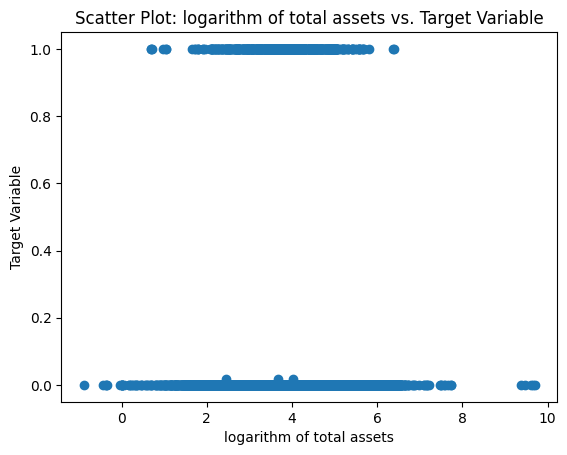

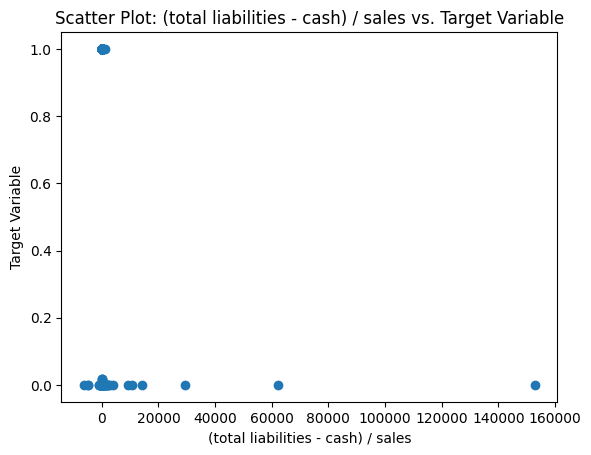

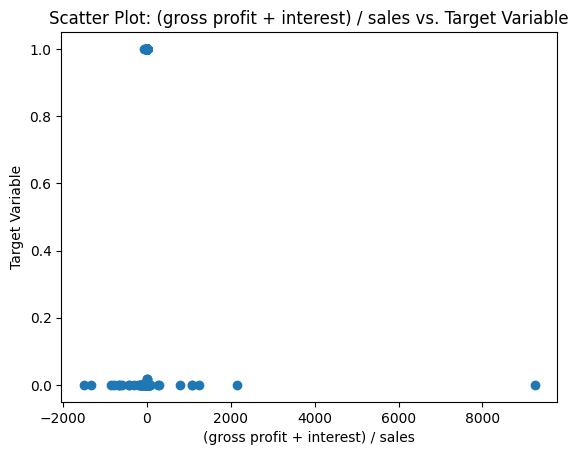

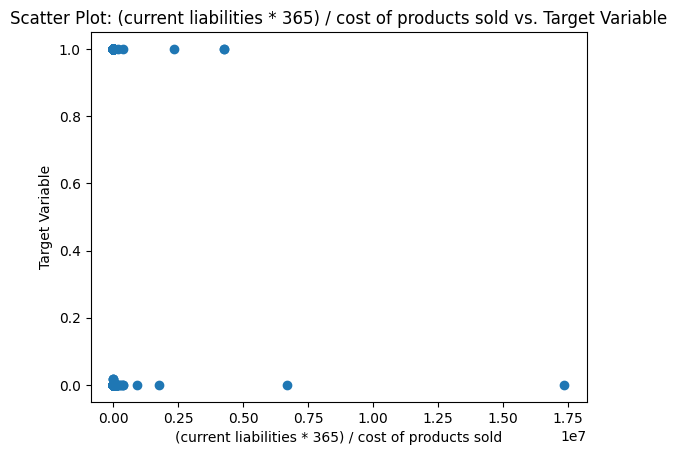

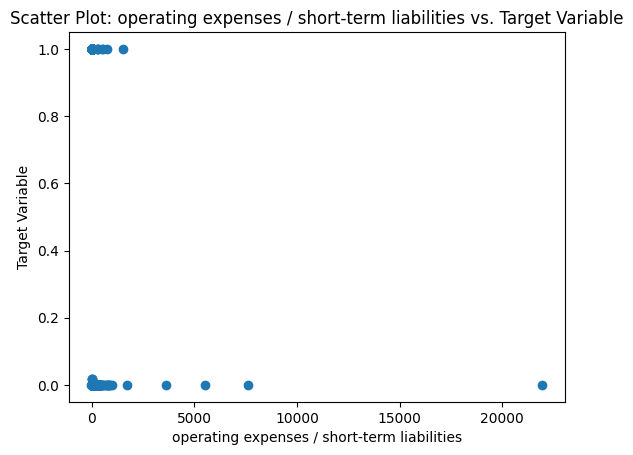

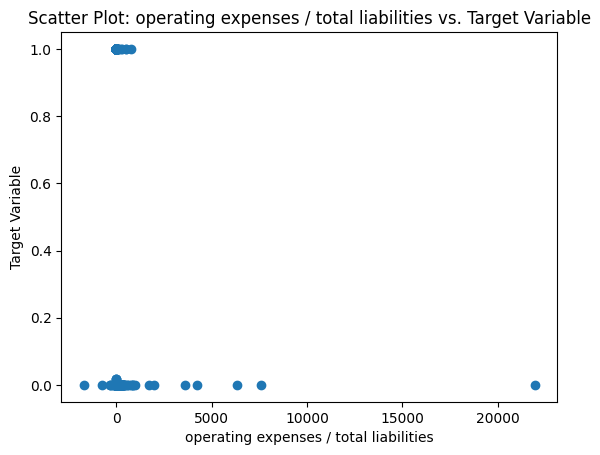

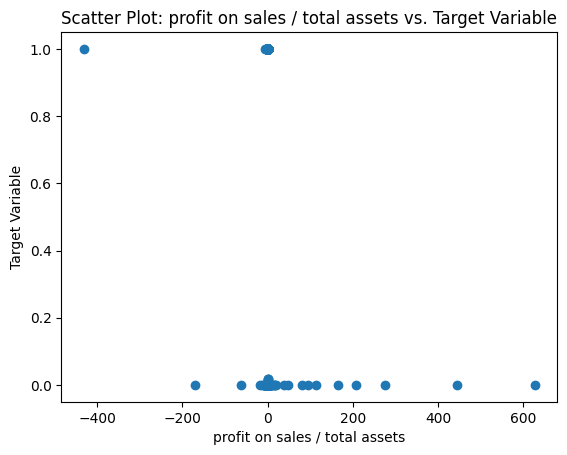

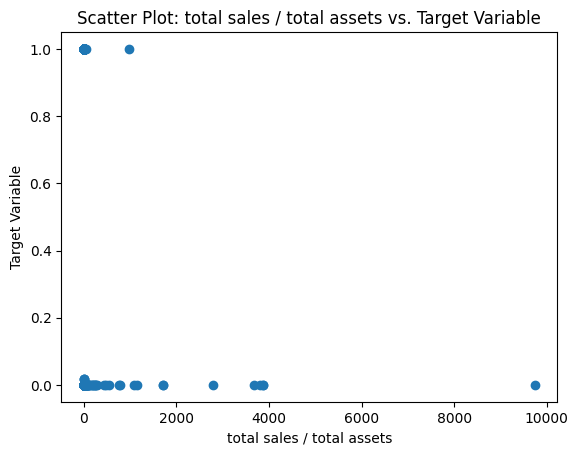

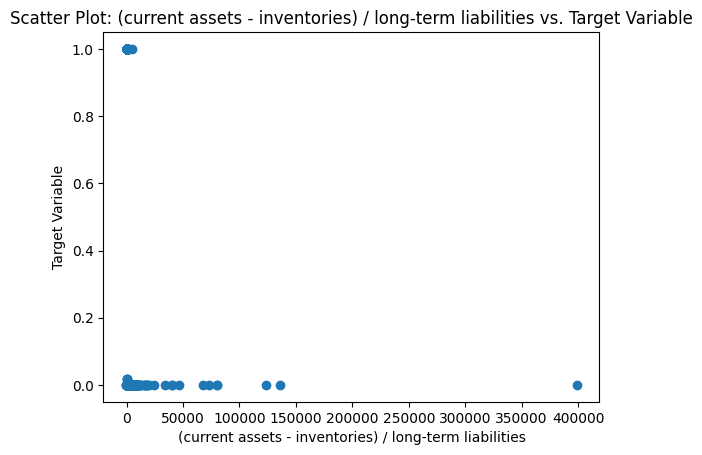

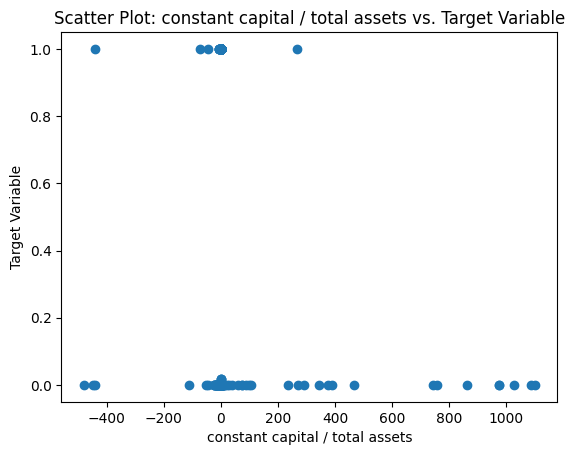

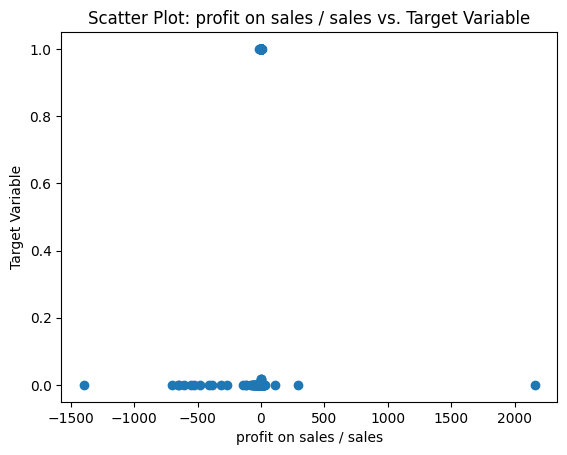

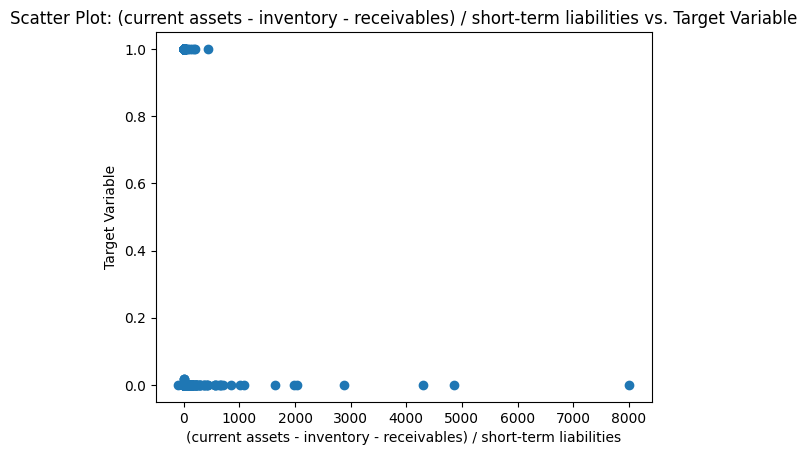

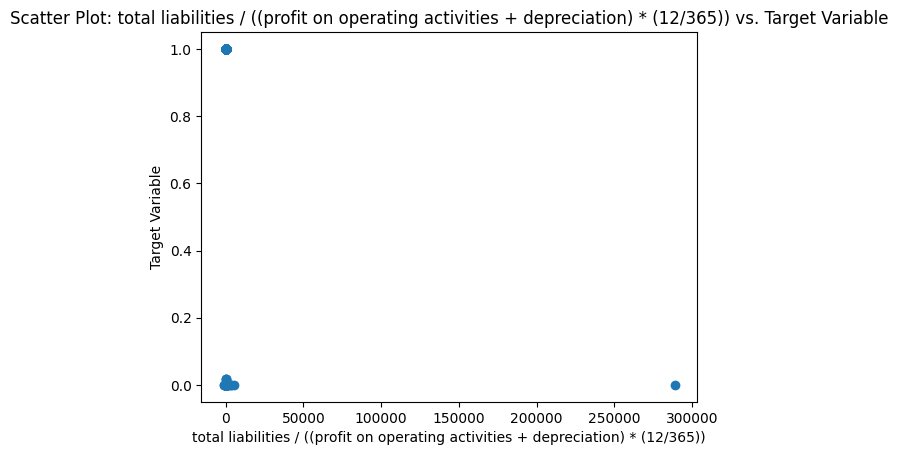

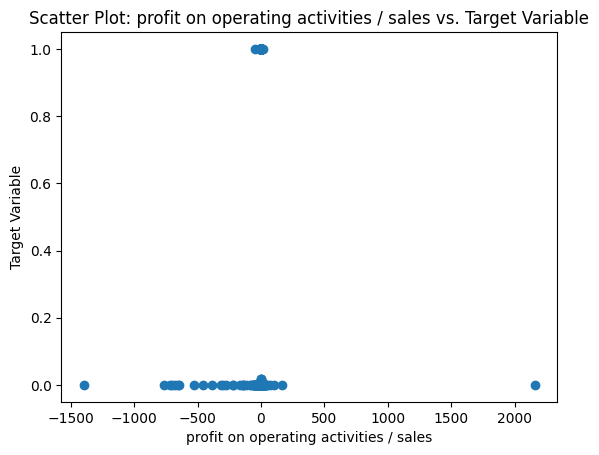

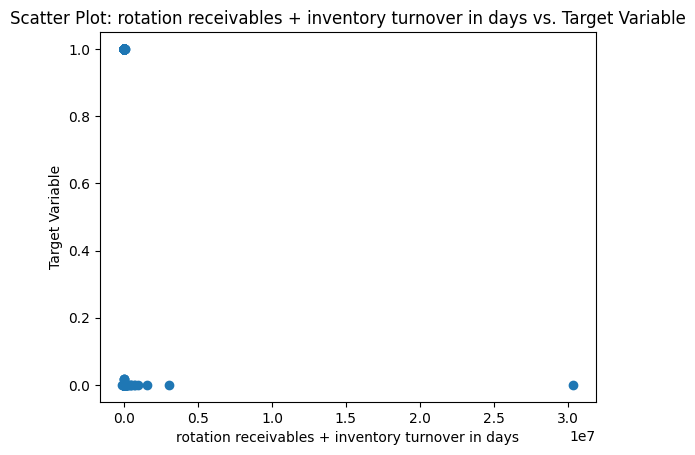

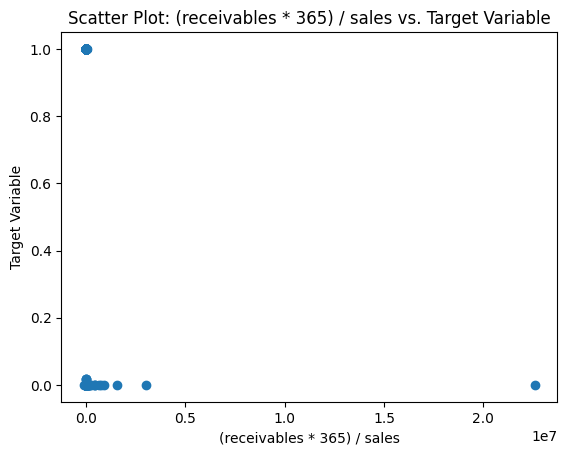

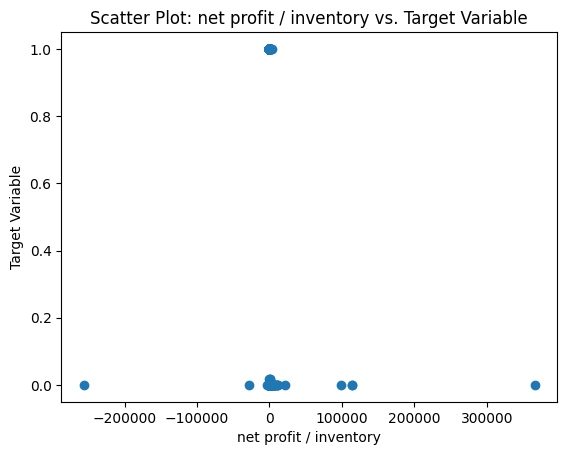

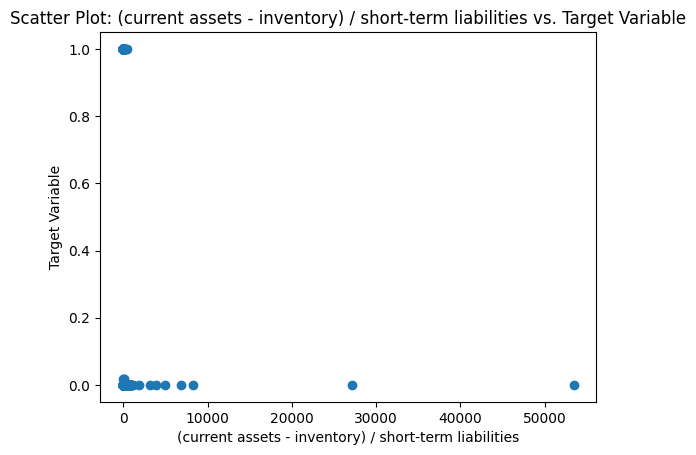

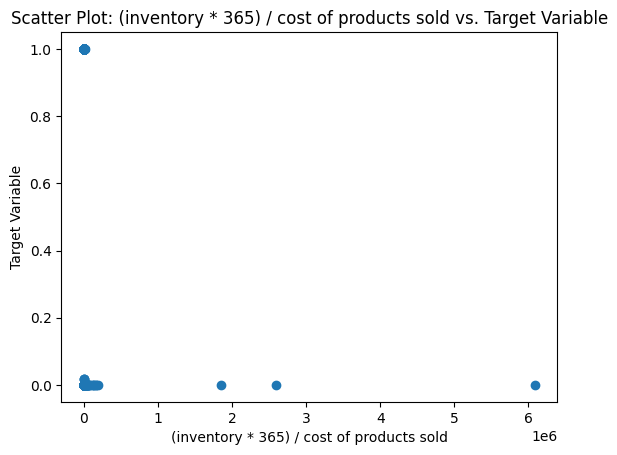

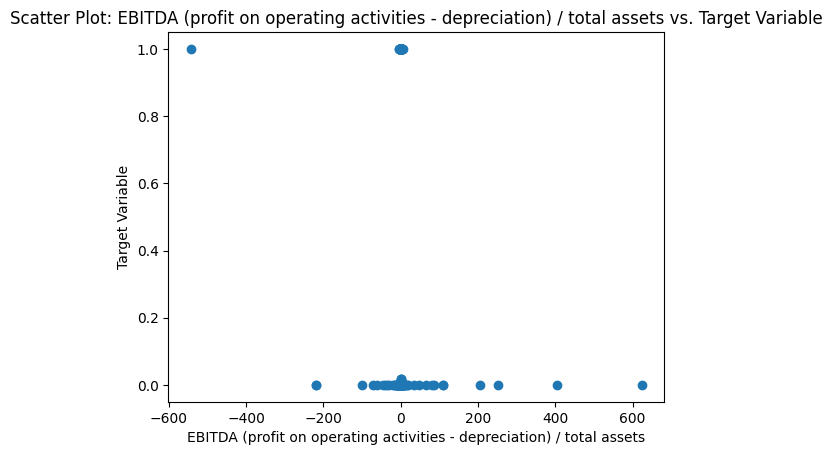

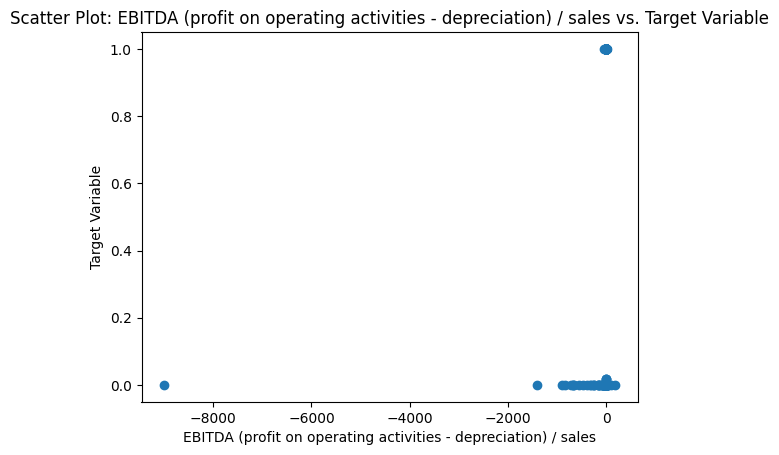

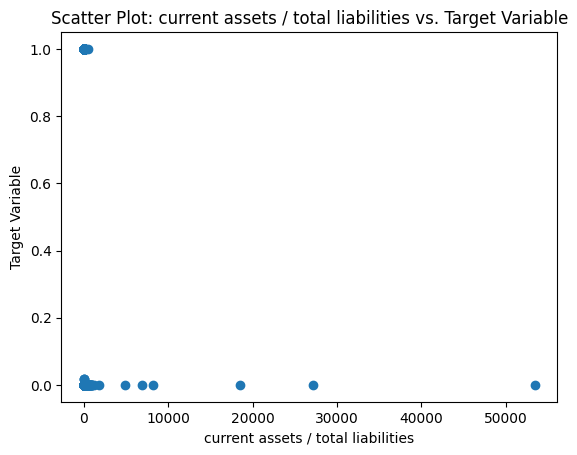

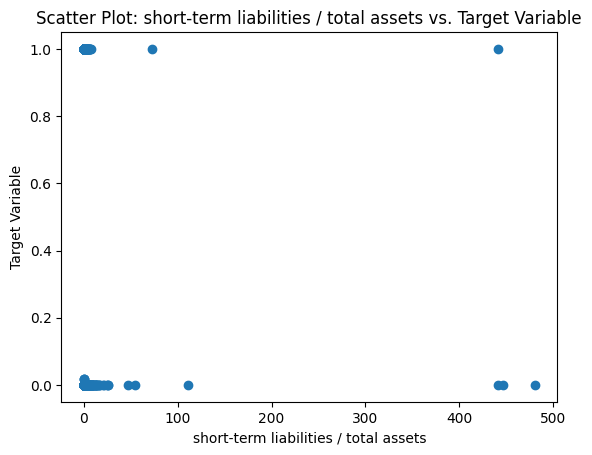

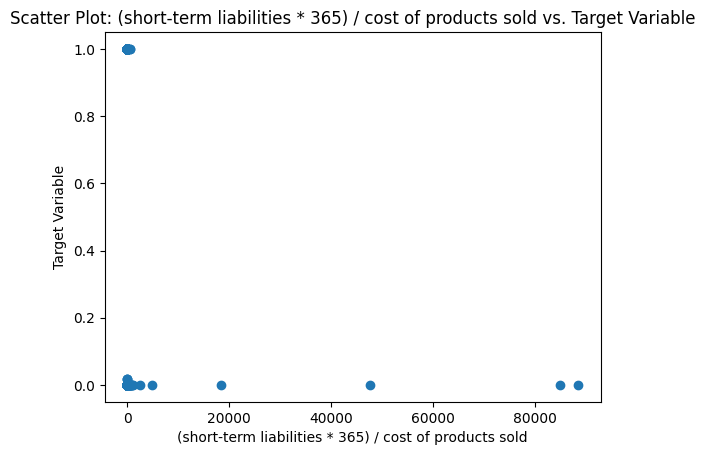

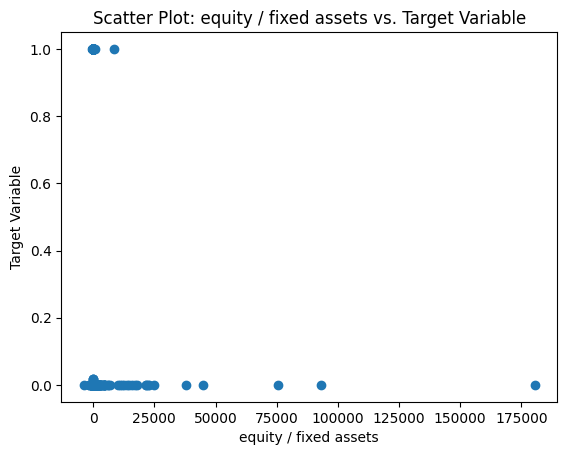

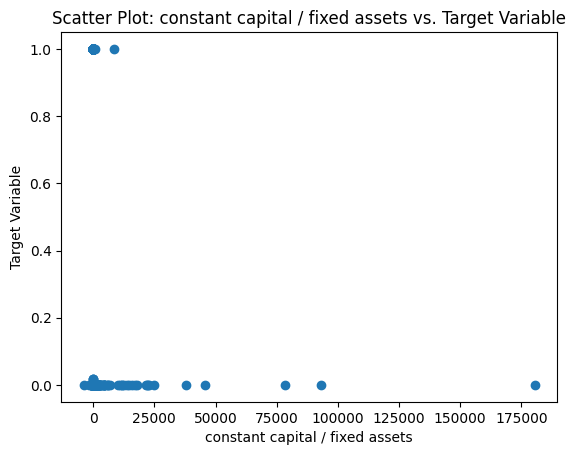

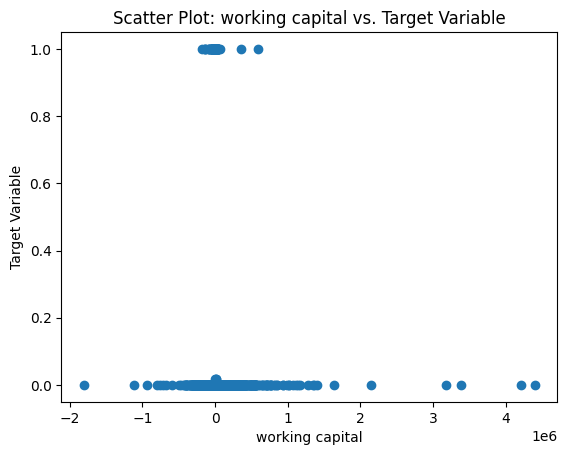

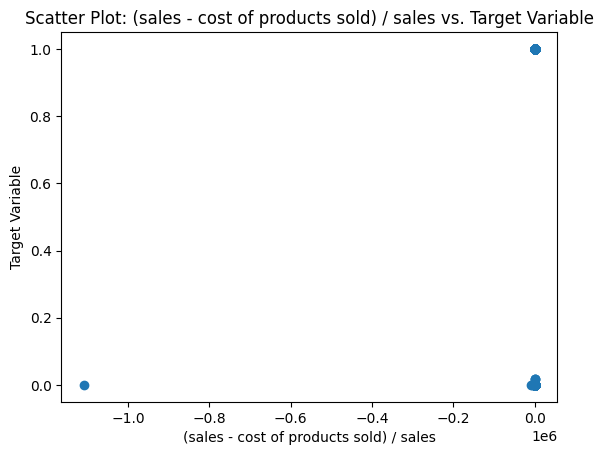

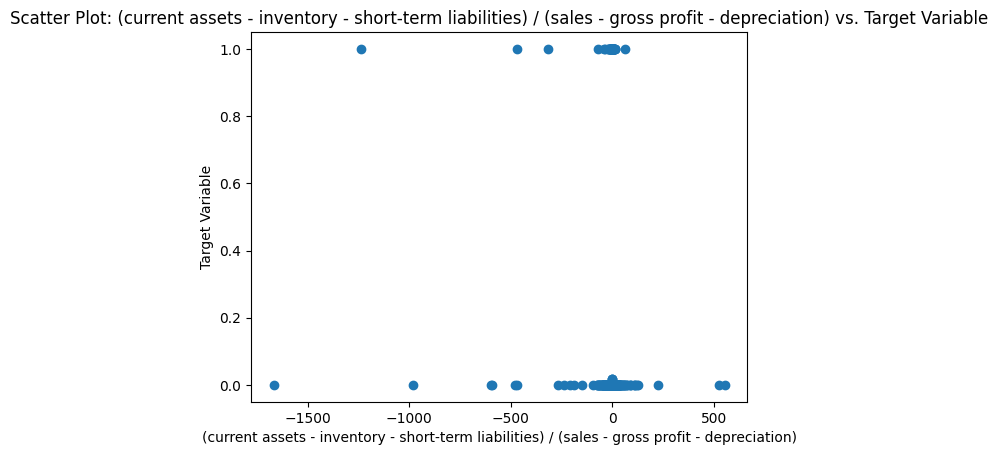

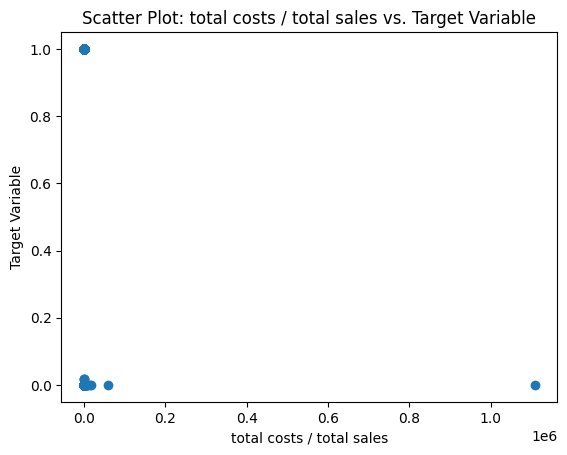

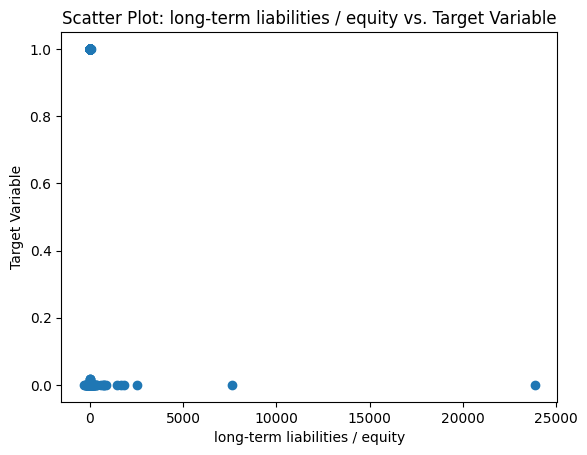

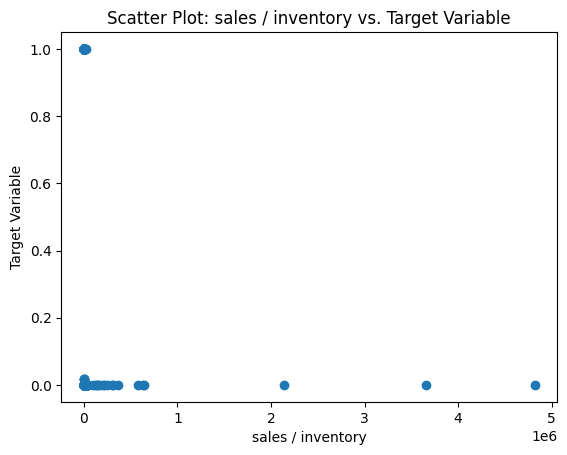

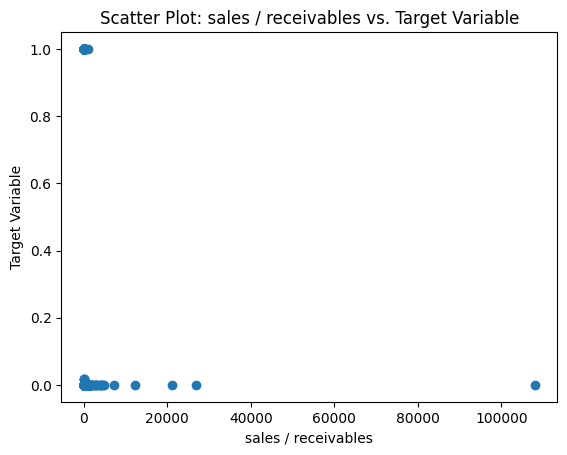

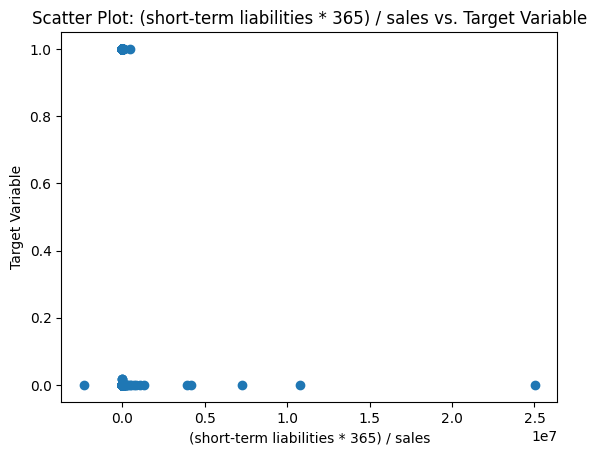

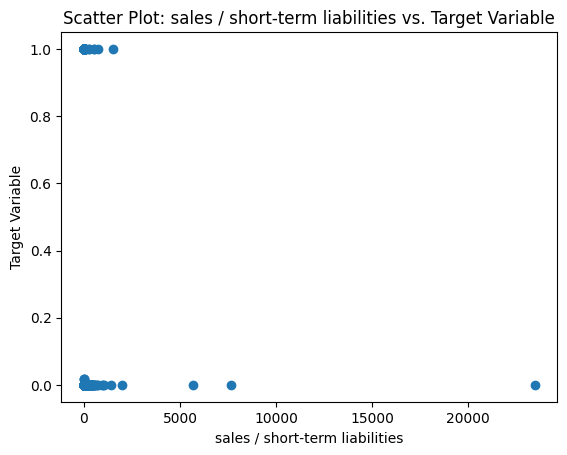

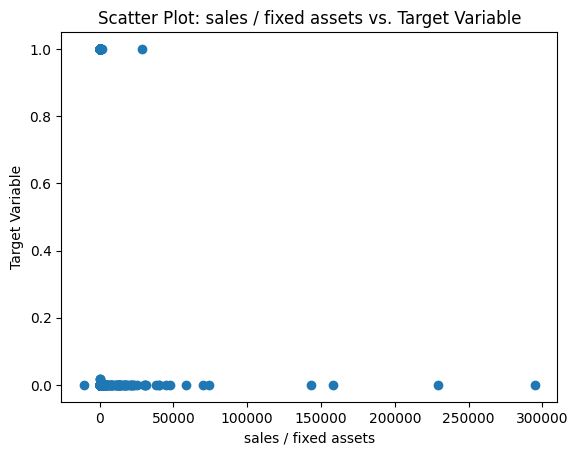

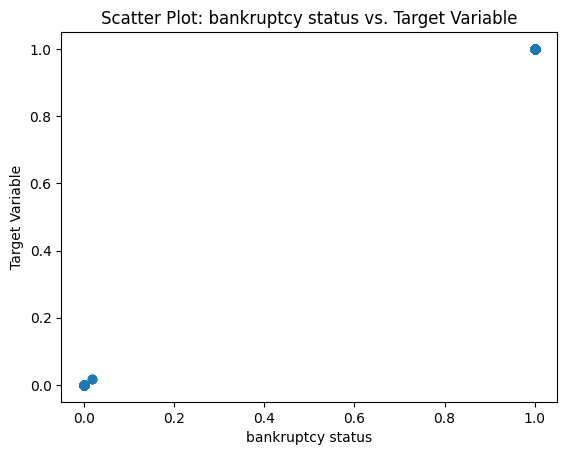

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [30]:
list(map(lambda col: scatterplo(all_data_reset, col), formula))

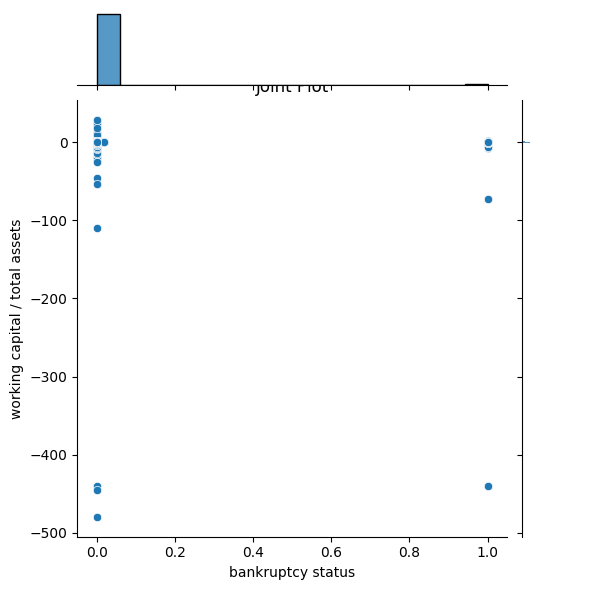

In [32]:
sns.jointplot(x="bankruptcy status", y= 'working capital / total assets', data=all_data_reset, kind='scatter')
plt.title('Joint Plot')
plt.show()

###Features selections


In [25]:
all_data_reset.columns

Index(['net profit / total assets', 'total liabilities / total assets',
       'working capital / total assets',
       'current assets / short-term liabilities',
       '(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365',
       'retained earnings / total assets', 'EBIT / total assets',
       'book value of equity / total liabilities', 'sales / total assets',
       'equity / total assets',
       '(gross profit + extraordinary items + financial expenses) / total assets',
       'gross profit / short-term liabilities',
       '(gross profit + depreciation) / sales',
       '(gross profit + interest) / total assets',
       '(total liabilities * 365) / (gross profit + depreciation)',
       '(gross profit + depreciation) / total liabilities',
       'total assets / total liabilities', 'gross profit / total assets',
       'gross profit / sales', '(inventory * 365) / sales',
       'sales (n) / sales (n-1)',
       'profit

In [26]:
X = all_data_reset.drop("bankruptcy status",axis=1)
y = all_data_reset["bankruptcy status"]

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ValueError: ignored

In [ ]:
print(model.feature_importances_)

In [ ]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

In [ ]:
X_train.corr()

In [ ]:
plt.figure(figsize=(100,100))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

In [ ]:
corr_features

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

In [ ]:
data_type_counts = all_data_reset.dtypes.value_counts()

# Create a pie chart
plt.figure(figsize=(4, 5))
plt.pie(data_type_counts, labels=data_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Distribution of Data Types for Features")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

###Information Gain


In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info=mutual_info_classif(X,y)

In [ ]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

In [ ]:

def correlatio2(dataset,min_threseloed, max_thresloed):
                     corr_matrix = dataset.corr()
                     mask = (corr_matrix < max_thresloed) & (corr_matrix >min_threseloed)
                     high_corr_values = corr_matrix[mask]
                     printed_pairs = set()

                     for col1, col2 in high_corr_values.stack().index:
                          correlation = high_corr_values.loc[col1, col2]
                          # Check if the reverse pair has already been printed
                          if (col2, col1) not in printed_pairs:
                              printed_pairs.add((col1, col2))
                              print(f"Columns: {col1} and {col2}, Correlation: {correlation:.4f}")

In [ ]:
correlatio2(all_data_reset,0.85,1)

In [ ]:
correlatio2(all_data_reset,-1,-0.9)

In [ ]:
plt.figure(figsize=(100,100))
sns.heatmap(all_data_reset.corr(),cmap=plt.cm.Reds,annot=True)
